In [1]:
# behavior stats results
from locale import normalize
from operator import inv
import numpy as np
from plot_ult import * 
from scipy import stats 
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import os
import pandas as pd
import numpy as np
from cmaes import CMA
import copy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np
import torch
import heapq
from torch.distributions.multivariate_normal import MultivariateNormal
from matplotlib import pyplot as plt
import time
from stable_baselines3 import TD3
torch.manual_seed(0)
from numpy import linspace, pi
from InverseFuncs import *
from monkey_functions import *
from firefly_task import ffacc_real
from env_config import Config
# from cma_mpi_helper import run
# import ray
from pathlib import Path
arg = Config()
import os
from timeit import default_timer as timer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
env=ffacc_real.FireFlyPaper(arg)
env.debug=True
env.noise_scale=1
env.terminal_vel=0.2
agent_=TD3.load('trained_agent/paper.zip')
agent=agent_.actor.mu.cpu()

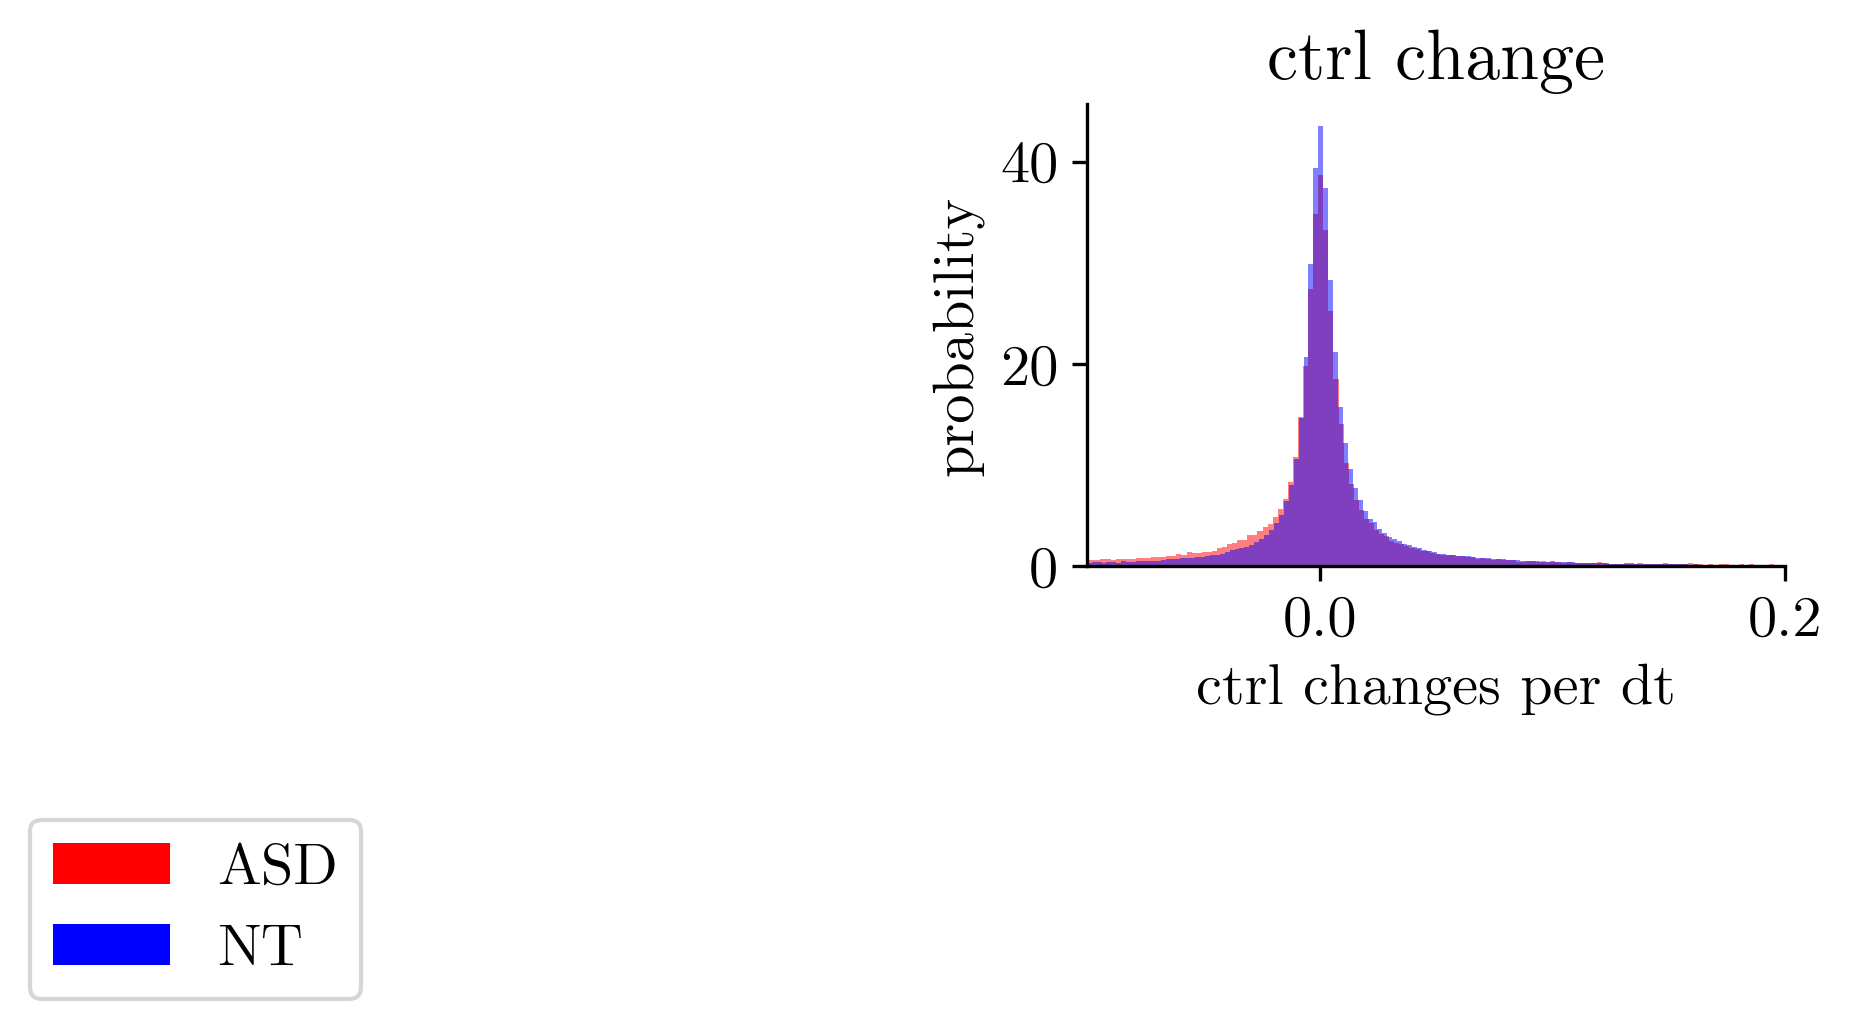

In [3]:
# frequency of action changes ------------------------------
with open(datapath/'human/woagroup','rb') as f:
    _,aactions,_=pickle.load(f)
with open(datapath/'human/wohgroup','rb') as f:
    _,hactions,_=pickle.load(f)

atmp=[ np.diff( np.linalg.norm(np.array(a), axis=1) ) for a in aactions]
achanges=[]
for trial in atmp:
    for d in trial:
        # if d>0:
            achanges.append(d)

htmp=[ np.diff( np.linalg.norm(np.array(a), axis=1) ) for a in hactions]
hchanges=[]
for trial in htmp:
    for d in trial:
        # if d>0:
            hchanges.append(d)

with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    ax.hist(achanges, density=True, bins=999,alpha=0.5, color='r', label='ASD')
    ax.hist(hchanges, density=True, bins=999, alpha=0.5, color='b', label='NT')
    ax.set_title('ctrl change')
    ax.set_xlabel('ctrl changes per dt')
    ax.set_ylabel('probability')
    plt.xlim(-0.1,0.2)
    quickspine(ax)
    quickleg(ax)
    # quicksave('dev action cost compared')


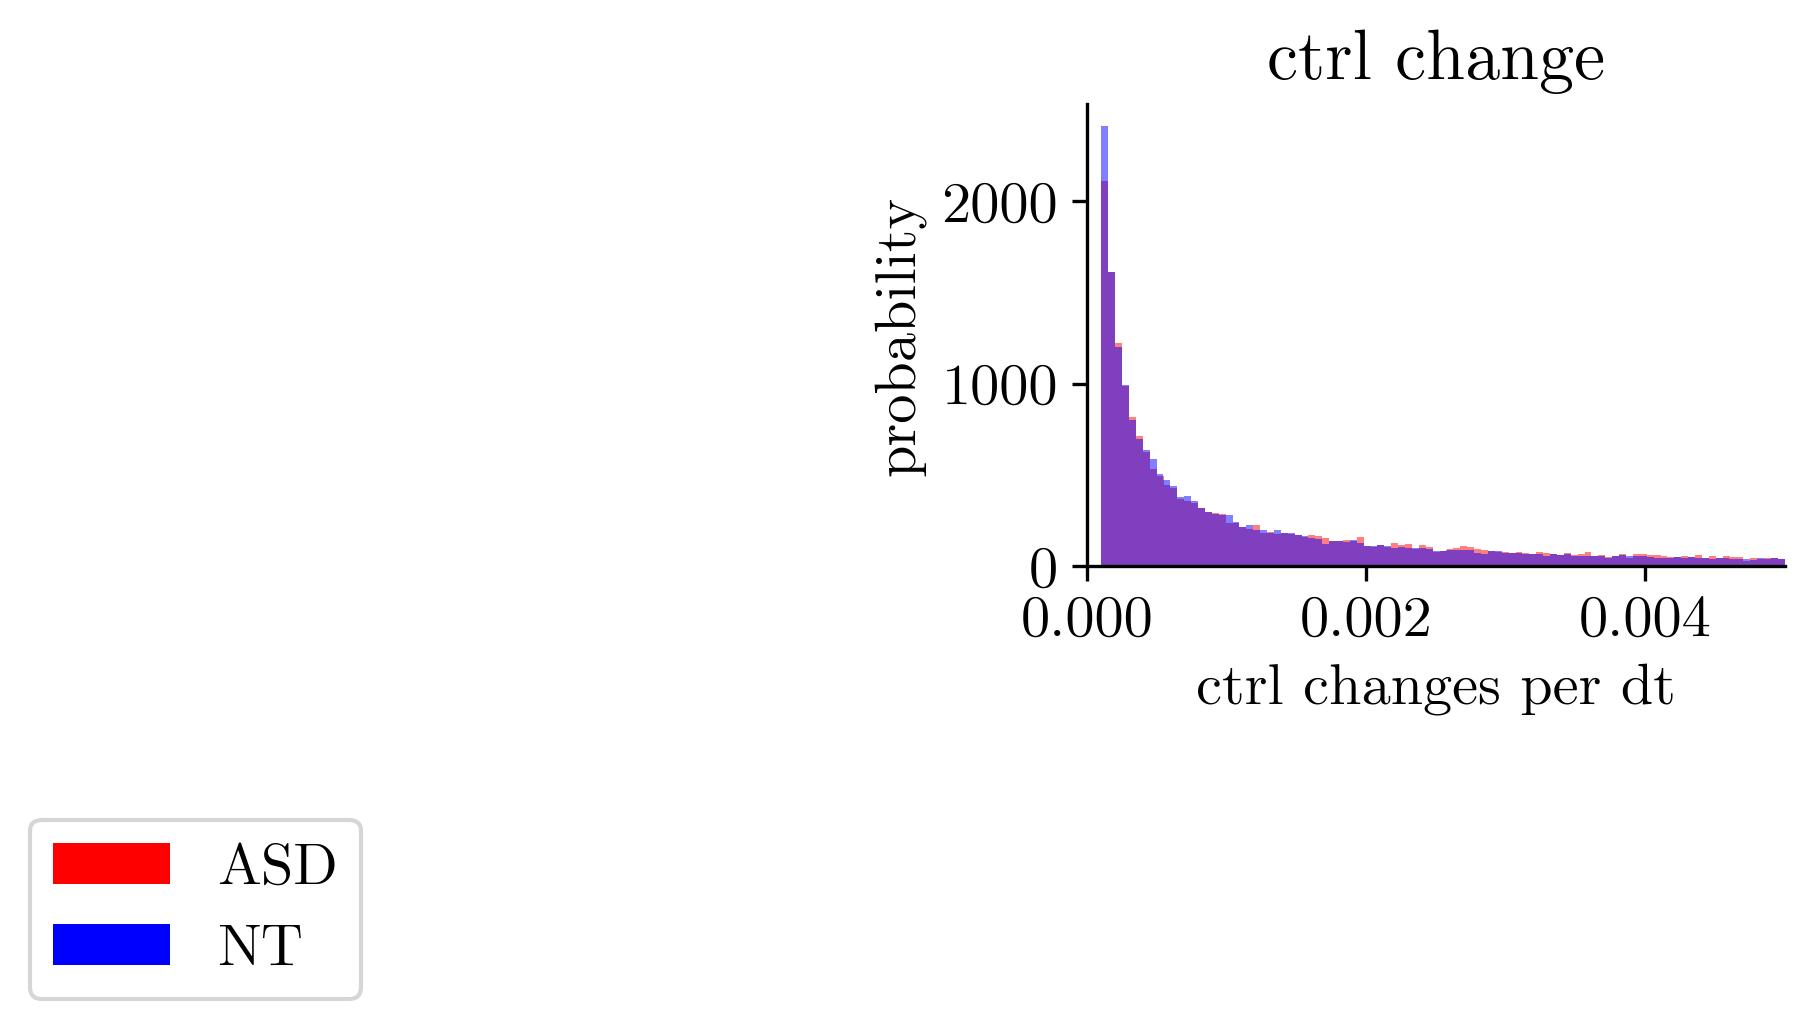

In [4]:
# frequency of action changes, angular only ------------------------------
with open(datapath/'human/woagroup','rb') as f:
    _,aactions,_=pickle.load(f)
with open(datapath/'human/wohgroup','rb') as f:
    _,hactions,_=pickle.load(f)

atmp=[ (np.power(relu(np.diff(np.array(a)[:,1], axis=0)),2)) for a in aactions]
achanges=[]
for trial in atmp:
    for d in trial:
        if d>1e-4:
            achanges.append(d)

htmp=[ (np.power(relu(np.diff(np.array(a)[:,1], axis=0)),2)) for a in hactions]
hchanges=[]
for trial in htmp:
    for d in trial:
        if d>1e-4:
            hchanges.append(d)

achanges,hchanges = np.array(achanges),np.array(hchanges)
with initiate_plot(3,2, 300) as f:
    xrange=[0,0.005]
    ax=f.add_subplot(111)
    ax.hist(achanges[achanges<xrange[1]], density=True, bins=99,alpha=0.5, color='r', label='ASD')
    ax.hist(hchanges[hchanges<xrange[1]], density=True, bins=99, alpha=0.5, color='b', label='NT')
    ax.set_title('ctrl change')
    ax.set_xlabel('ctrl changes per dt')
    ax.set_ylabel('probability')
    plt.xlim(xrange)
    quickspine(ax)
    quickleg(ax)
    # quicksave('dev action cost compared')


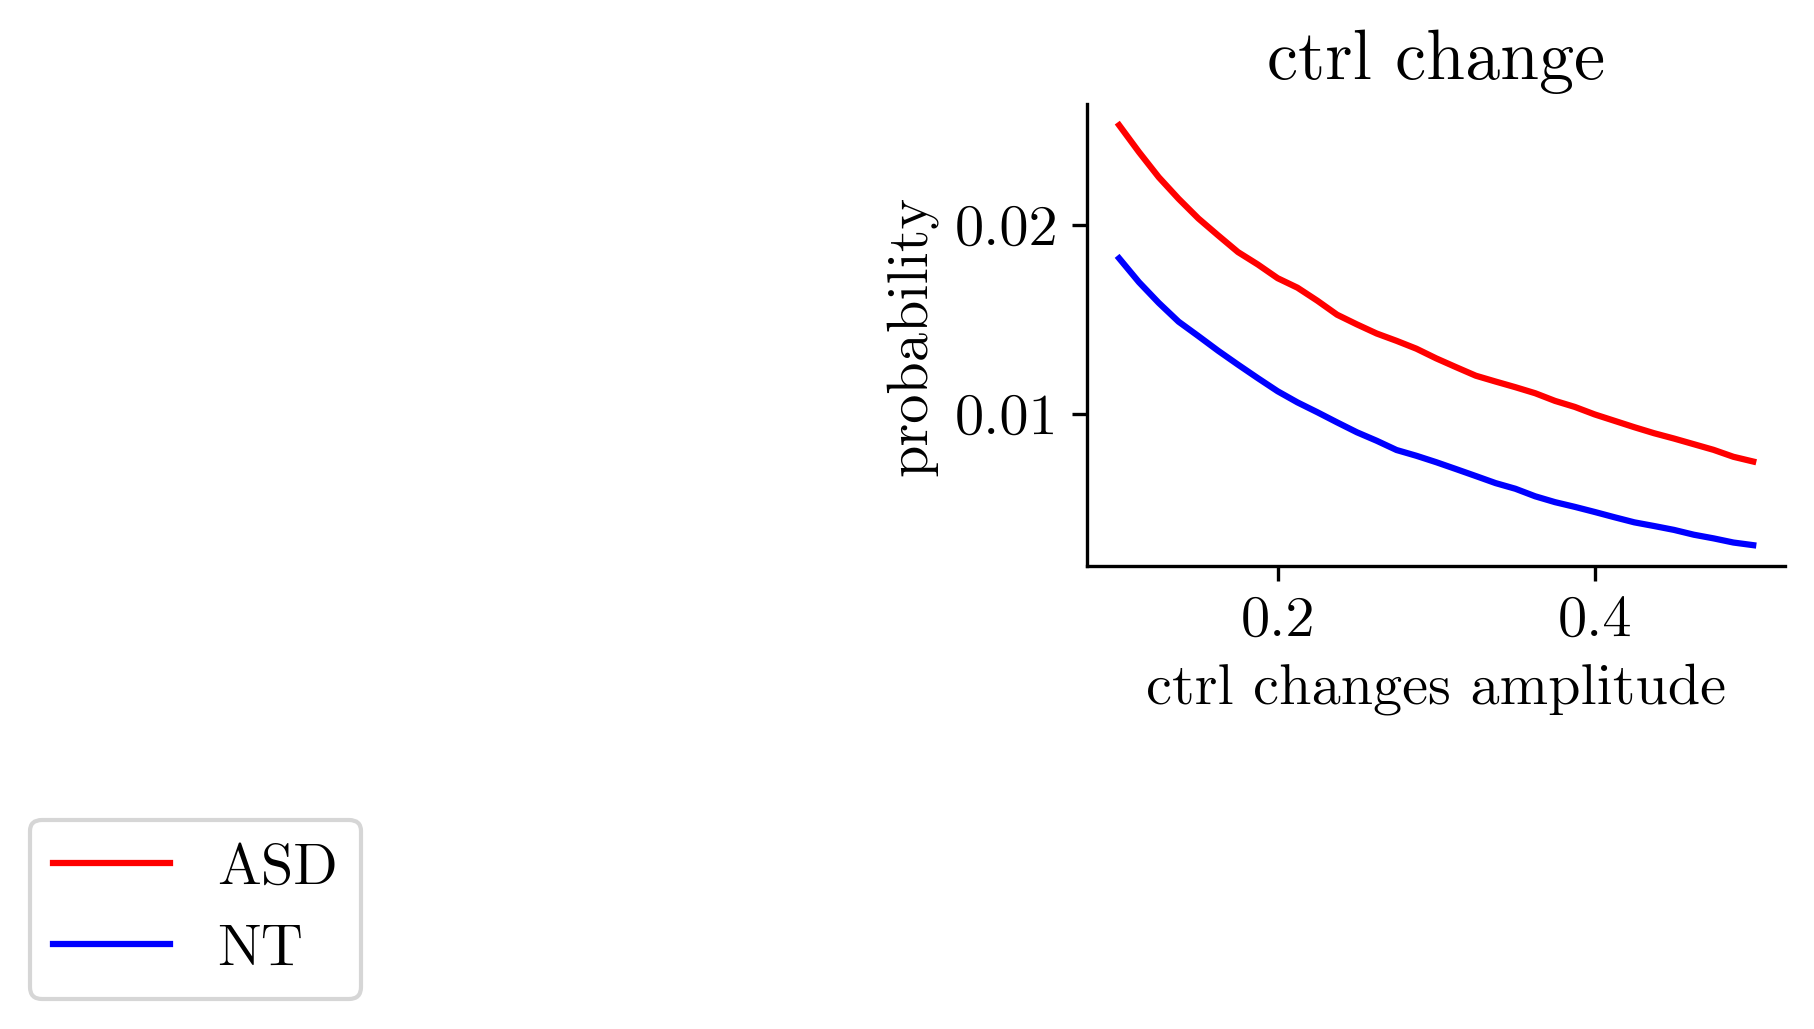

In [5]:
# focuos on larger changes -------------------------------
thresholds=np.linspace(0.1,0.5,33)
acounts=[]
for th in thresholds:
    acounts.append(sum([ len(np.where( (np.power(relu(np.diff(np.linalg.norm(np.array(a), axis=1), axis=0)),2)) >th)[0]) for a in aactions]))
hcounts=[]
for th in thresholds:
    hcounts.append(sum([ len(np.where( (np.power(relu(np.diff(np.linalg.norm(np.array(a), axis=1), axis=0)),2)) >th)[0]) for a in hactions]))


with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    ax.plot(thresholds,np.array(acounts)/sum([len(a) for a in aactions]),color='r', label='ASD')
    ax.plot(thresholds,np.array(hcounts)/sum([len(a) for a in hactions]), color='b', label='NT')
    ax.set_title('ctrl change')
    ax.set_xlabel('ctrl changes amplitude')
    ax.set_ylabel('probability')
    quickspine(ax)
    quickleg(ax)
    # quicksave('dev action cost compared')


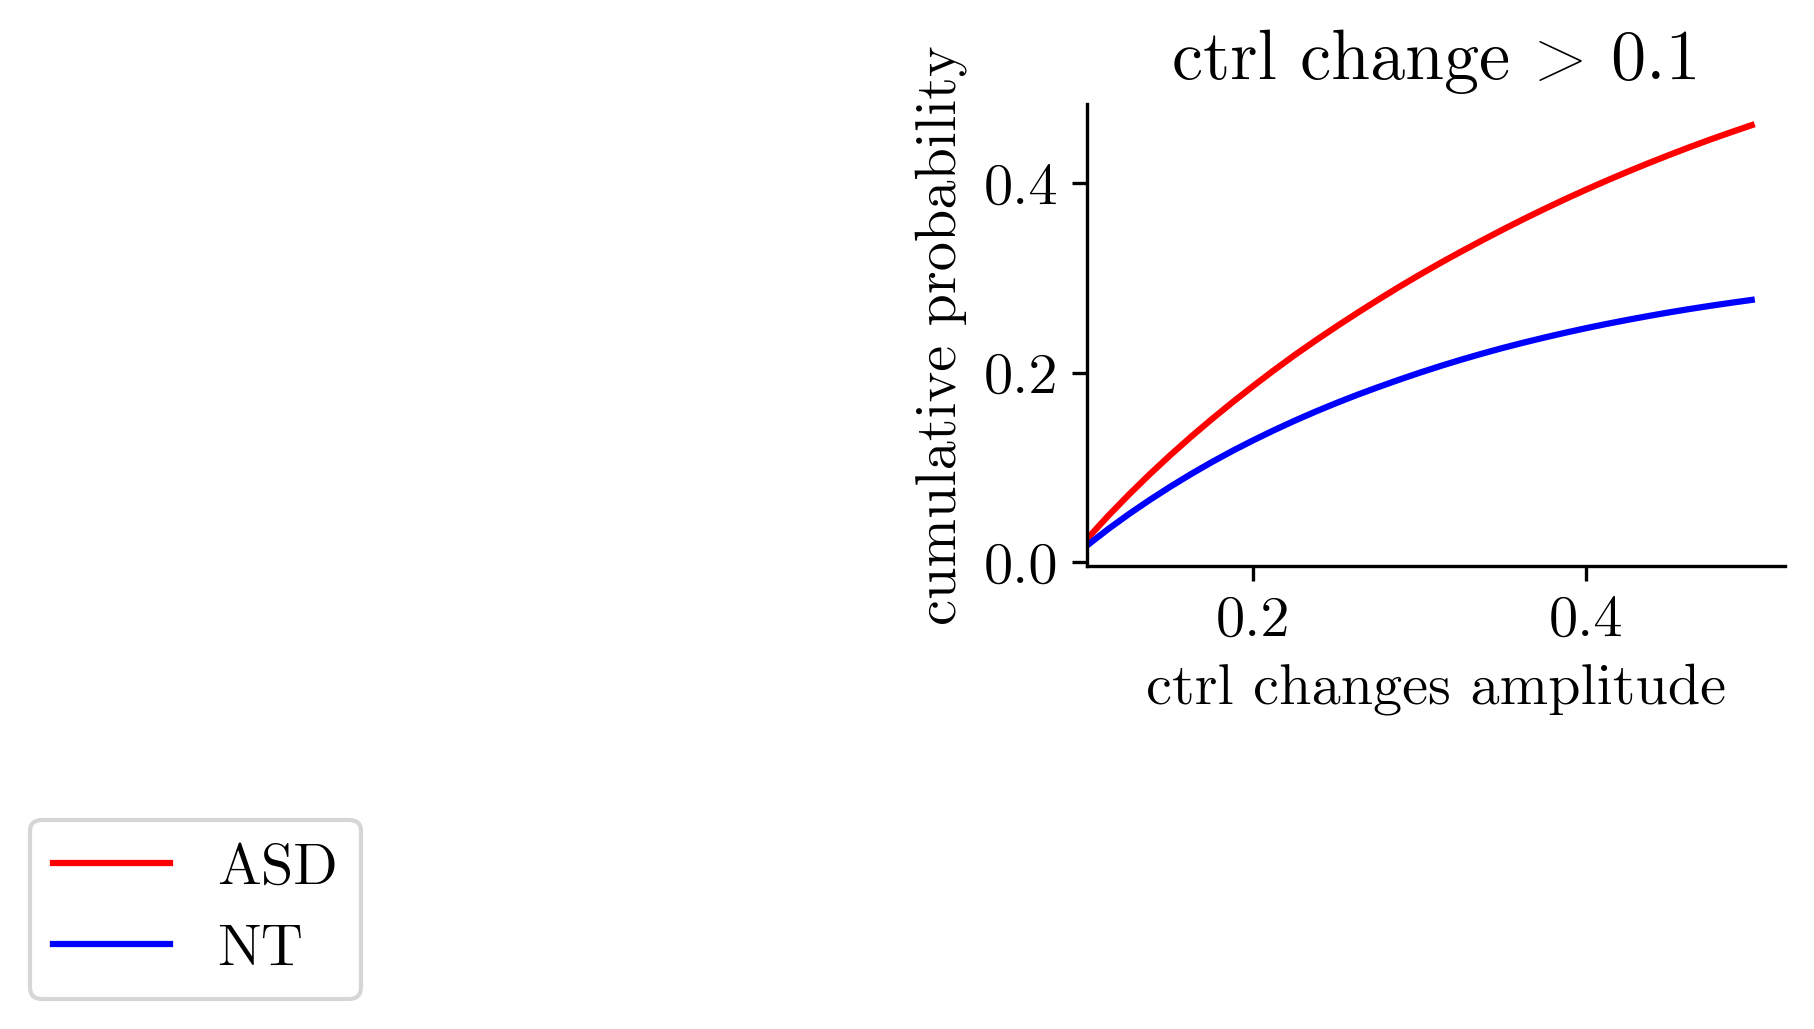

In [6]:
# cumulative probability plot
with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    ax.plot(thresholds,np.cumsum(np.array(acounts)/sum([len(a) for a in aactions])),color='r', label='ASD')
    ax.plot(thresholds,np.cumsum(np.array(hcounts)/sum([len(a) for a in hactions])), color='b', label='NT')
    ax.set_xlim(0.1,None)
    ax.set_title('ctrl change > 0.1')
    ax.set_xlabel('ctrl changes amplitude')
    ax.set_ylabel('cumulative probability')
    quickspine(ax)
    quickleg(ax)
    # quicksave('cumulative prob for control change > 0.1 v2')



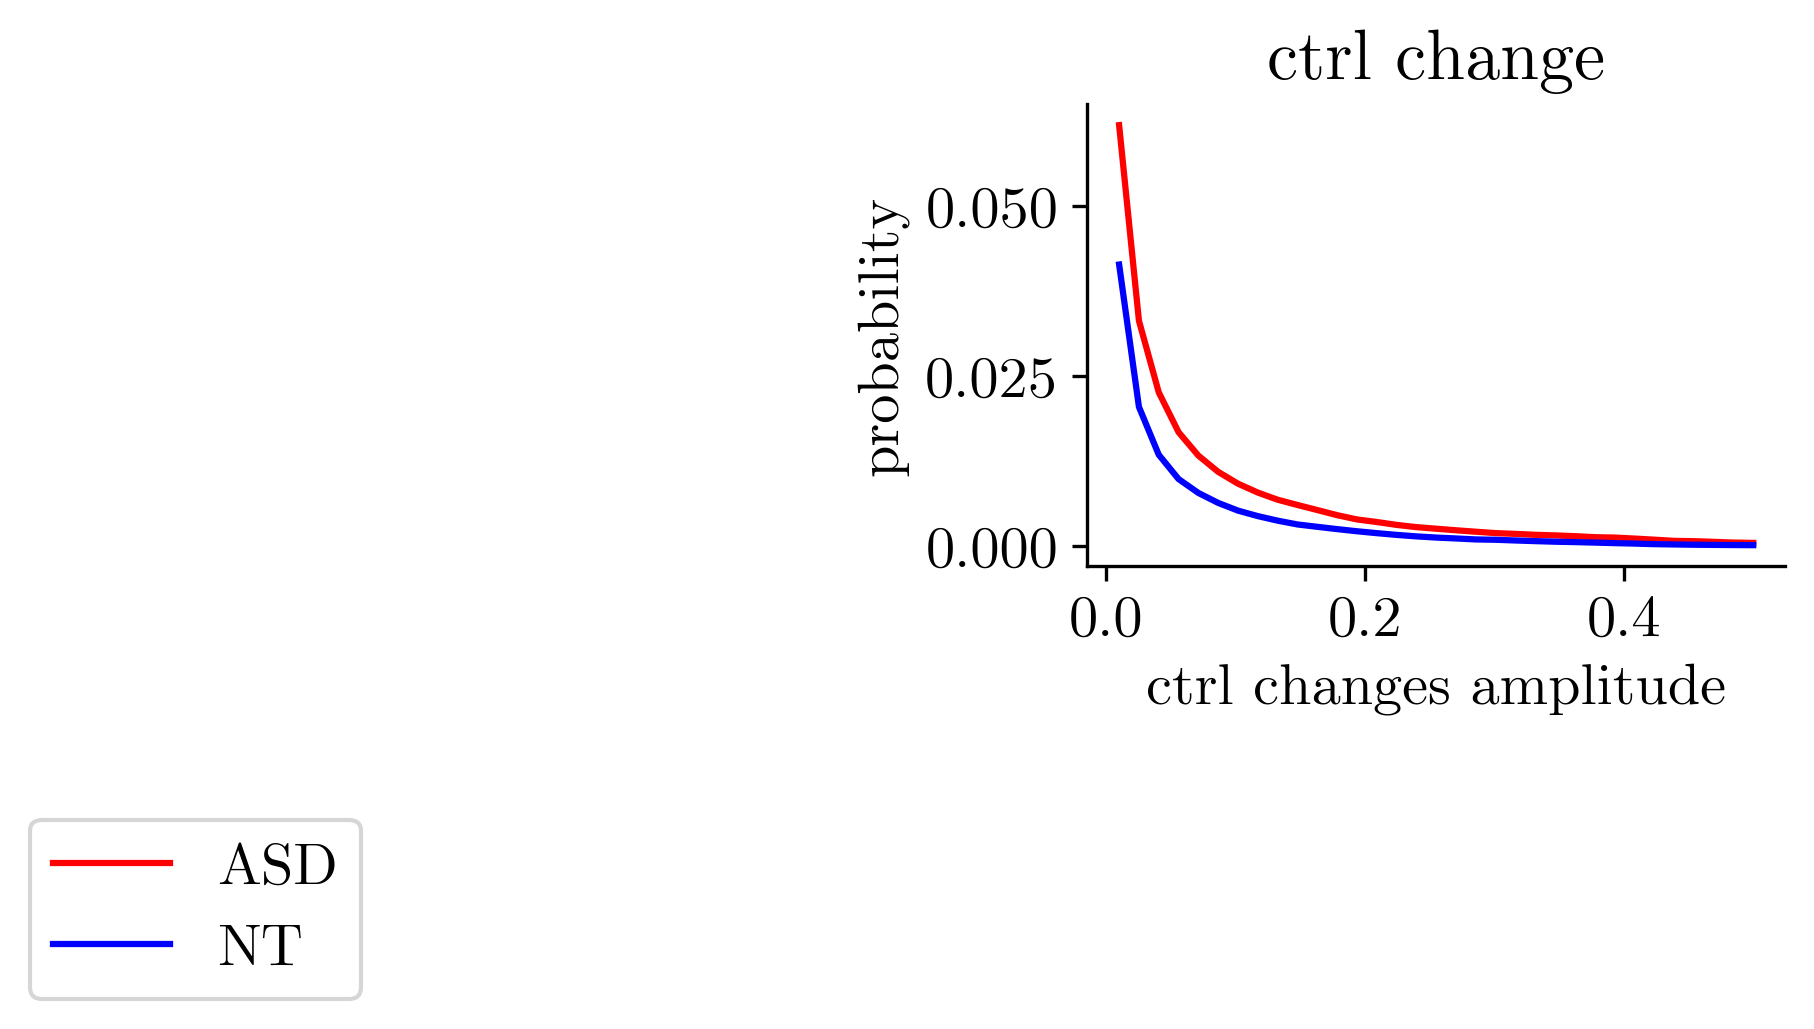

0.020494367111307893

In [7]:
# larger changes, angular only ----------------
thresholds=np.linspace(0.01,0.5,33)
acounts=[]
for th in thresholds:
    acounts.append(sum([ len(np.where( (np.power(relu(np.diff(np.array(a)[:,1], axis=0)),2)) >th)[0]) for a in aactions]))
hcounts=[]
for th in thresholds:
    hcounts.append(sum([ len(np.where( (np.power(relu(np.diff(np.array(a)[:,1], axis=0)),2)) >th)[0]) for a in hactions]))

with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    ax.plot(thresholds,np.array(acounts)/sum([len(a) for a in aactions]),color='r', label='ASD')
    ax.plot(thresholds,np.array(hcounts)/sum([len(a) for a in hactions]), color='b', label='NT')
    ax.set_title('ctrl change')
    ax.set_xlabel('ctrl changes amplitude')
    ax.set_ylabel('probability')
    quickspine(ax)
    quickleg(ax)
    # quicksave('dev action cost compared')
max(np.array(acounts)/sum([len(a) for a in aactions])-np.array(hcounts)/sum([len(a) for a in hactions]))


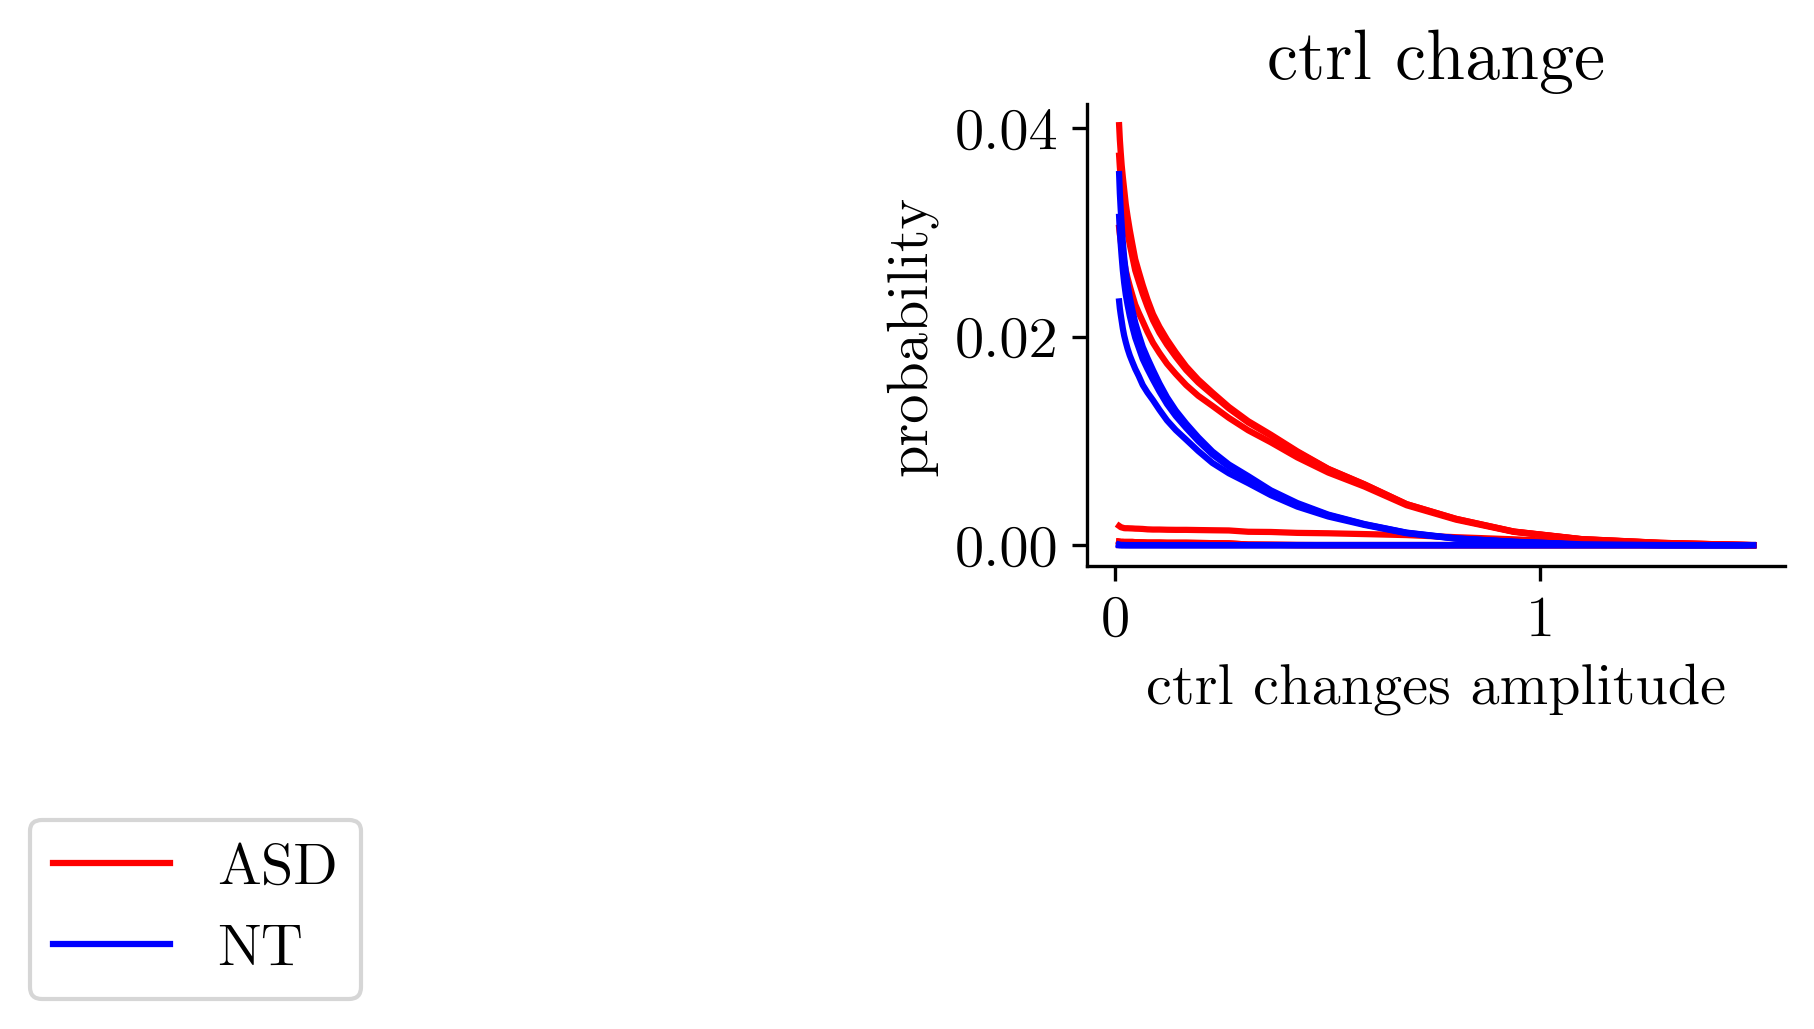

In [8]:
# larger changes at begining-------------------------------
with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    for t in range(1,20,3):
        # thresholds=np.linspace(0.001,0.5,33)
        xs=np.linspace(np.log(0.01),np.log(1.5),33)
        thresholds=np.exp(xs)
        acounts=[]
        for th in thresholds:
            acounts.append(sum([ len(np.where( (np.power(relu(np.diff(np.linalg.norm(np.array(a)[:t], axis=1), axis=0)),2)) >th)[0]) for a in aactions]))
        hcounts=[]
        for th in thresholds:
            hcounts.append(sum([ len(np.where( (np.power(relu(np.diff(np.linalg.norm(np.array(a)[:t], axis=1), axis=0)),2)) >th)[0]) for a in hactions]))

        ax.plot(thresholds,np.array(acounts)/sum([len(a) for a in aactions]),color='r', label='ASD')
        ax.plot(thresholds,np.array(hcounts)/sum([len(a) for a in hactions]), color='b', label='NT')
    ax.set_title('ctrl change')
    ax.set_xlabel('ctrl changes amplitude')
    ax.set_ylabel('probability')
    quickspine(ax)
    quickleg(ax)
    # quicksave('dev action cost compared')


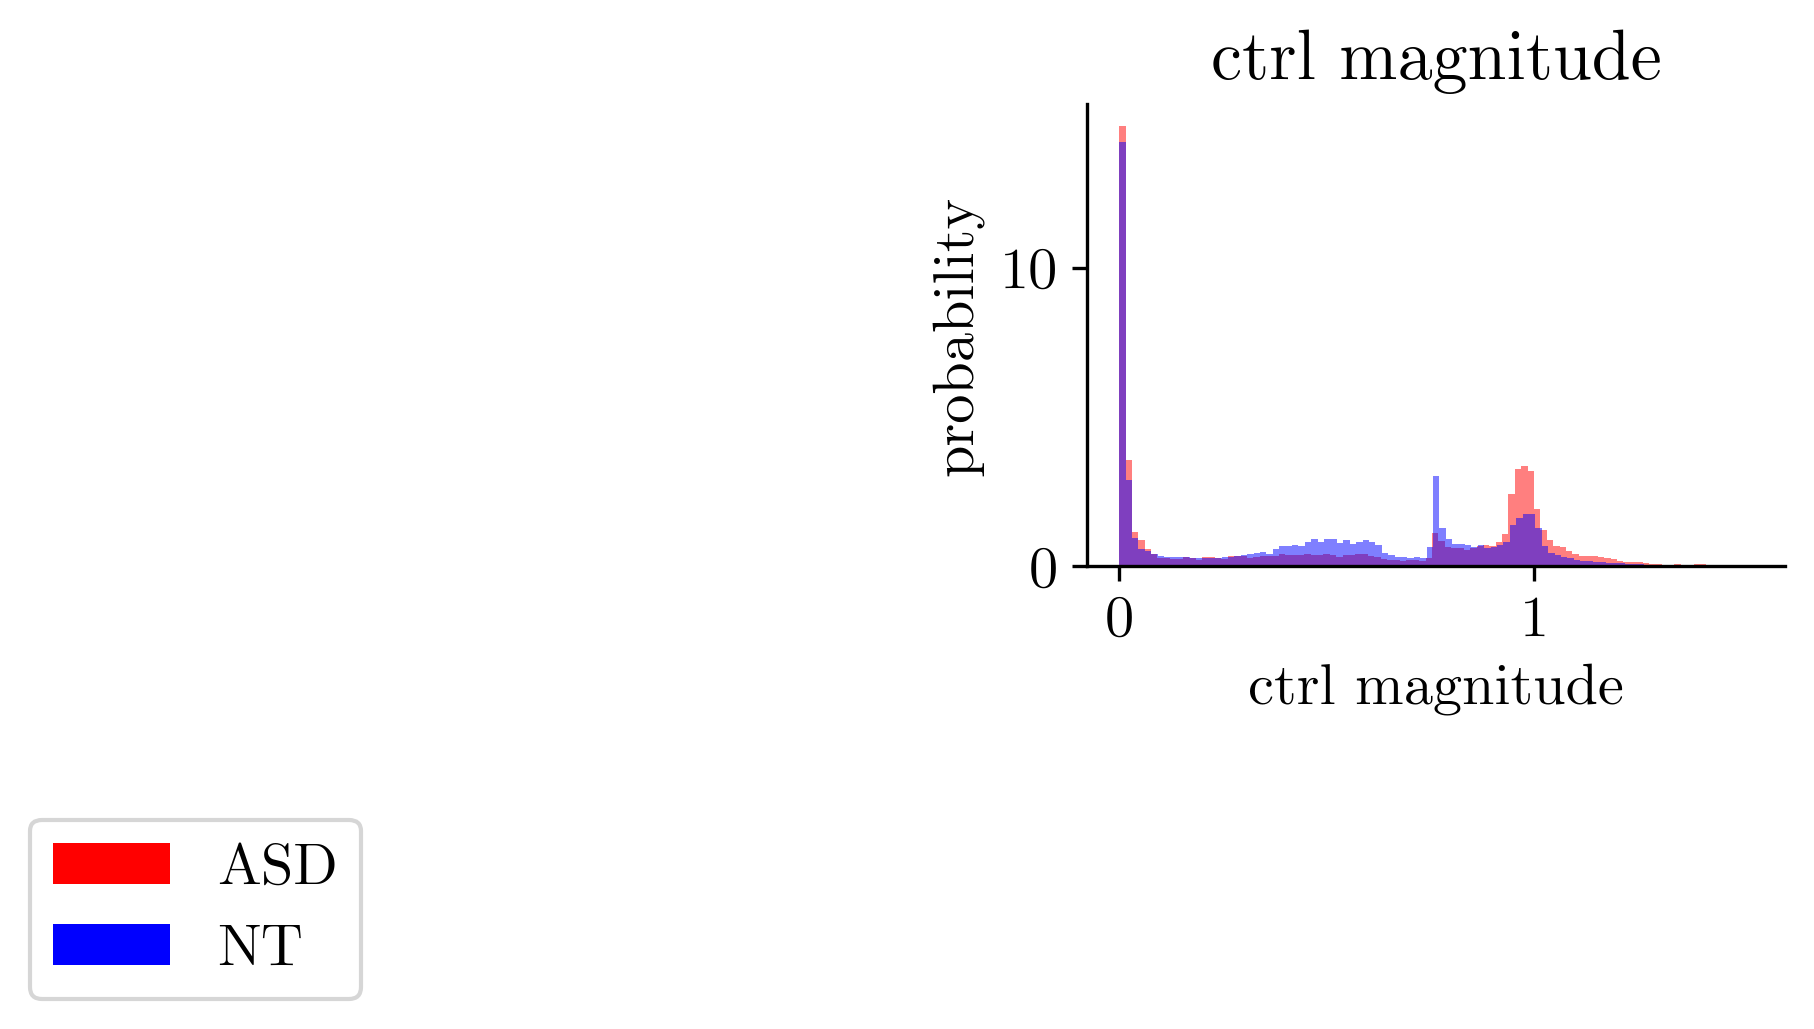

In [9]:
# magnitude of actions ------------------------------
atmp=[ ( np.linalg.norm(np.array(a), axis=1) ) for a in aactions]
achanges=[]
for trial in atmp:
    for d in trial:
        if d>0:
            achanges.append(d)

htmp=[ ( np.linalg.norm(np.array(a), axis=1) ) for a in hactions]
hchanges=[]
for trial in htmp:
    for d in trial:
        if d>0:
            hchanges.append(d)
with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    ax.hist(achanges, density=True, bins=99,alpha=0.5, color='r', label='ASD')
    ax.hist(hchanges, density=True, bins=99, alpha=0.5, color='b', label='NT')
    ax.set_title('ctrl magnitude')
    ax.set_xlabel('ctrl magnitude')
    ax.set_ylabel('probability')
    quickspine(ax)
    quickleg(ax)
    # quicksave('mag action cost compared')


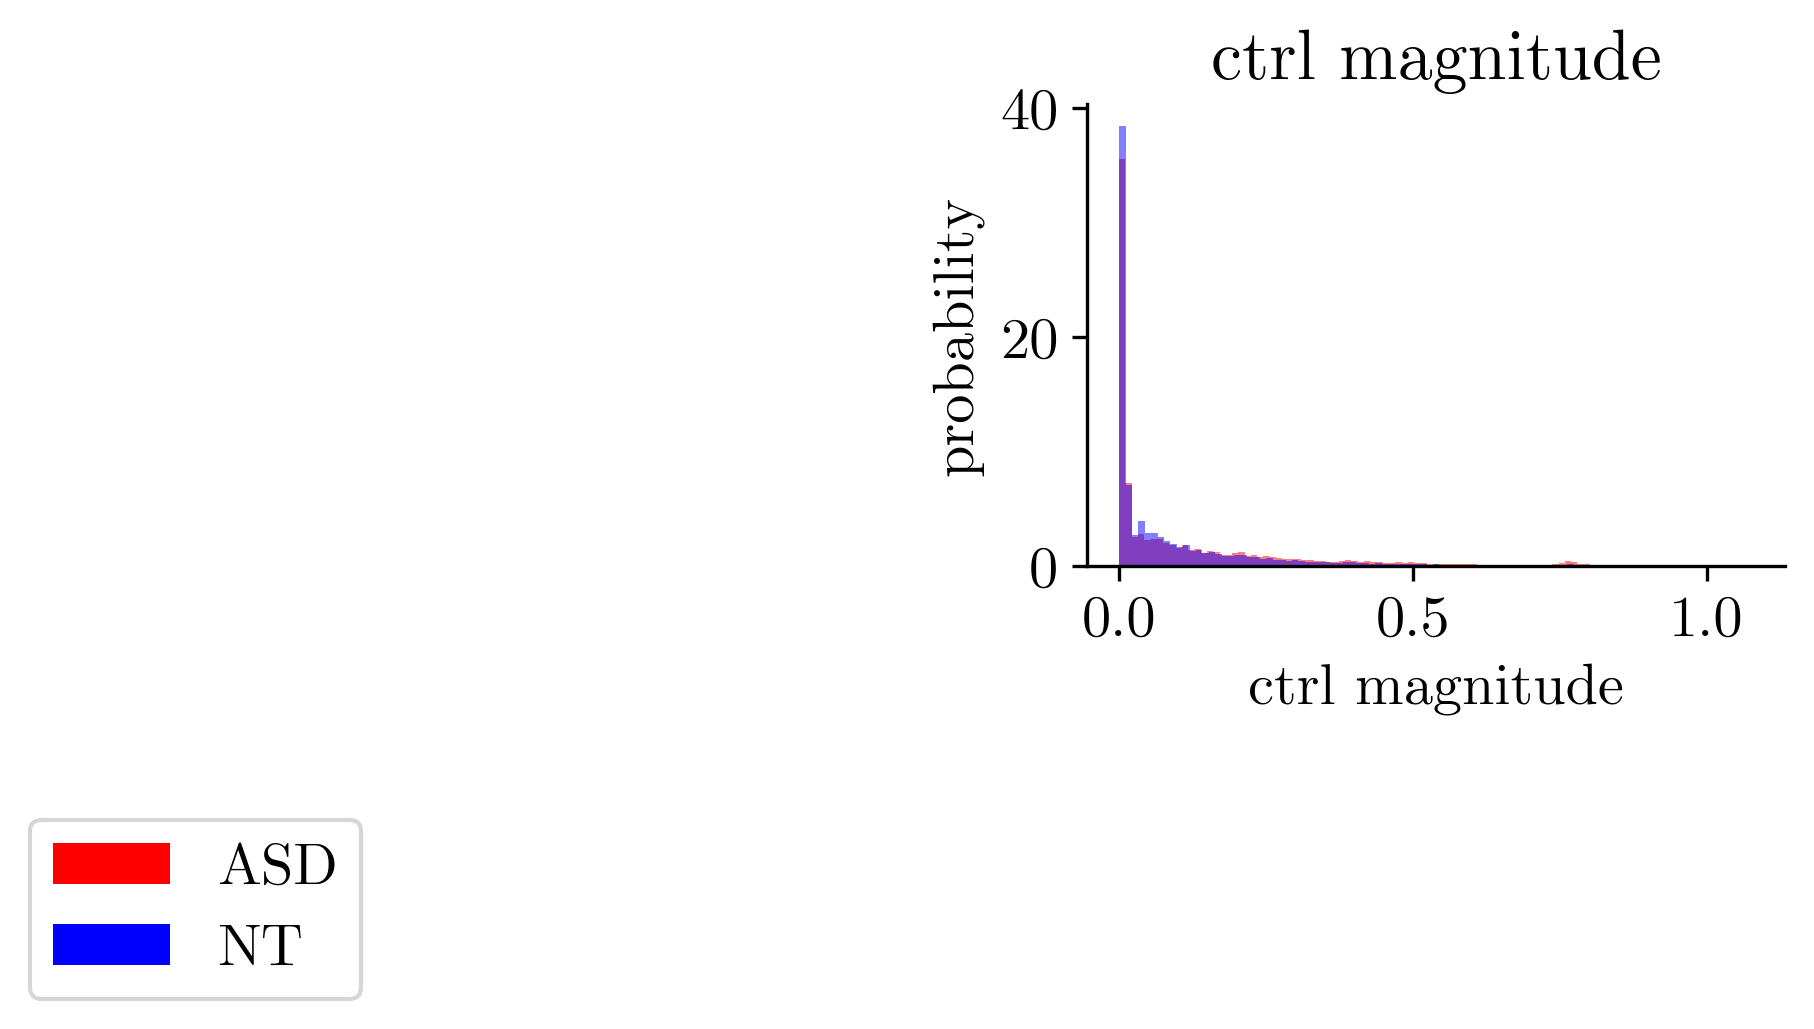

In [10]:
# magnitude of actions, angular ------------------------------
atmp=[ (np.array(a)[:,1] ) for a in aactions]
achanges=[]
for trial in atmp:
    for d in trial:
        if d>0:
            achanges.append(d)

htmp=[ ( np.array(a)[:,1]) for a in hactions]
hchanges=[]
for trial in htmp:
    for d in trial:
        if d>0:
            hchanges.append(d)
with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    ax.hist(achanges, density=True, bins=99,alpha=0.5, color='r', label='ASD')
    ax.hist(hchanges, density=True, bins=99, alpha=0.5, color='b', label='NT')
    ax.set_title('ctrl magnitude')
    ax.set_xlabel('ctrl magnitude')
    ax.set_ylabel('probability')
    quickspine(ax)
    quickleg(ax)
    # quicksave('mag action cost compared')


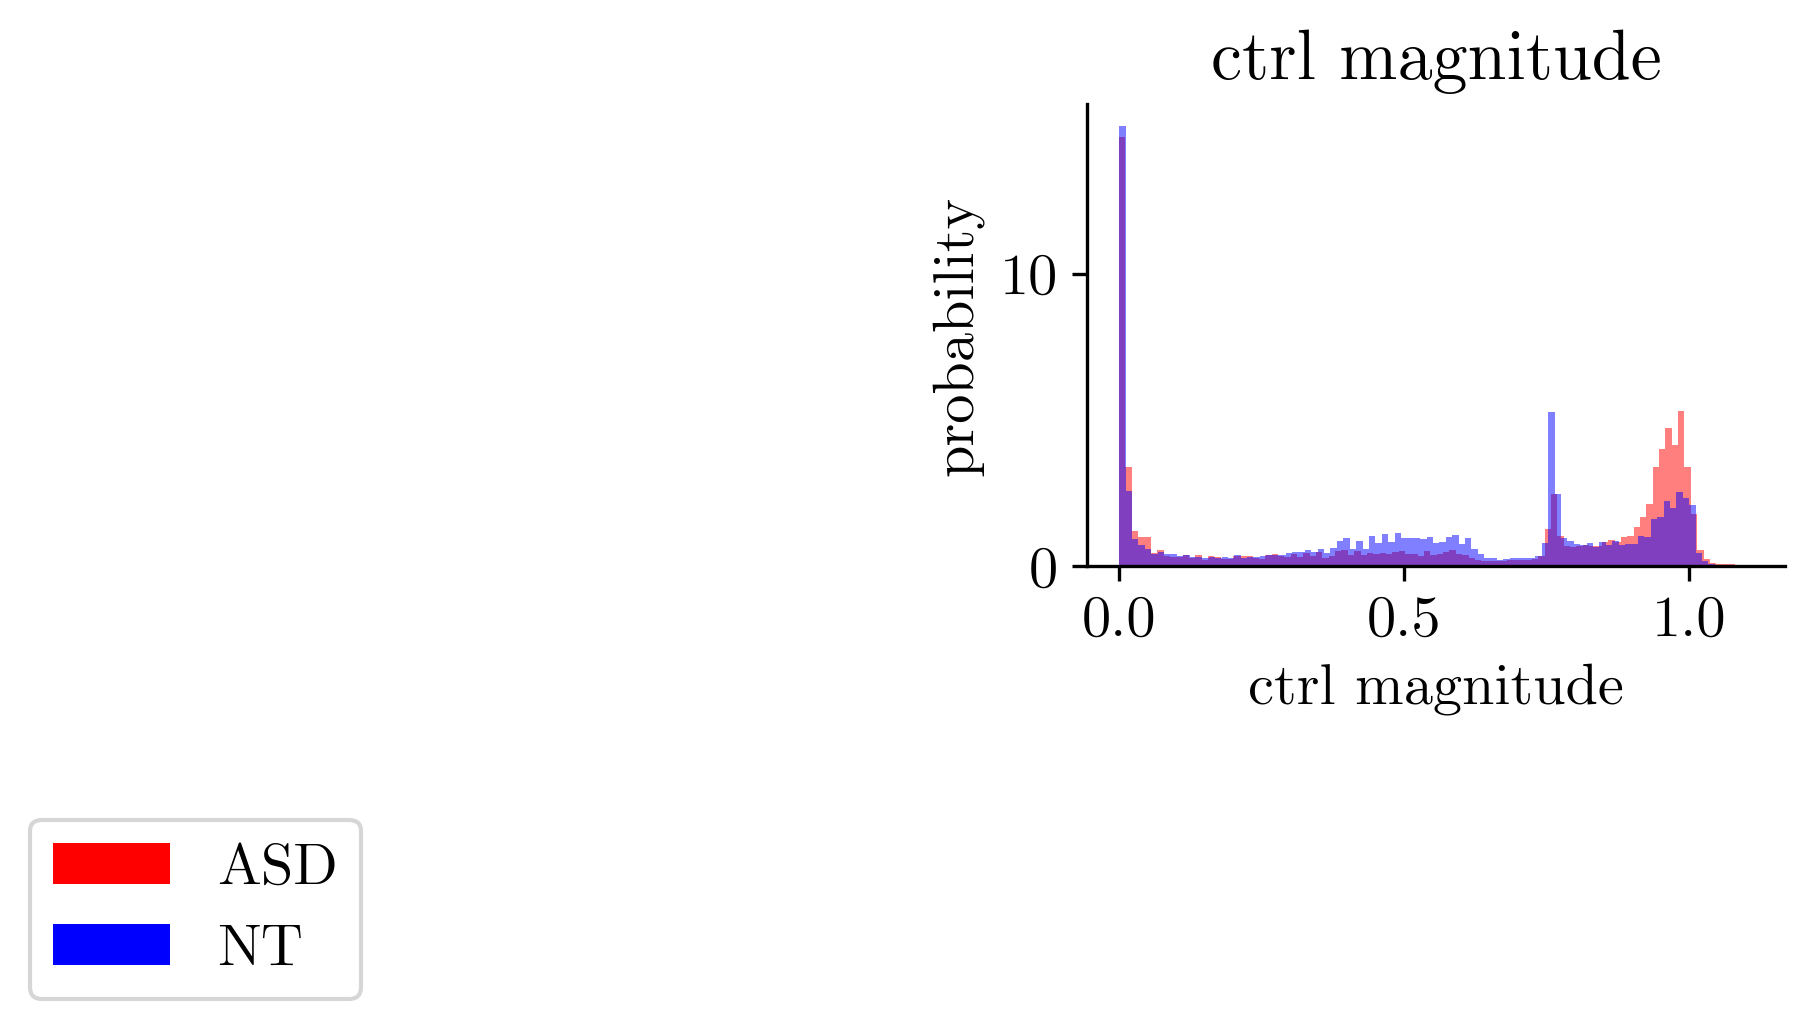

In [11]:
# magnitude of actions, forward ------------------------------
atmp=[ (np.array(a)[:,0] ) for a in aactions]
achanges=[]
for trial in atmp:
    for d in trial:
        if d>0:
            achanges.append(d)

htmp=[ ( np.array(a)[:,0]) for a in hactions]
hchanges=[]
for trial in htmp:
    for d in trial:
        if d>0:
            hchanges.append(d)
with initiate_plot(3,2, 300) as f:
    ax=f.add_subplot(111)
    ax.hist(achanges, density=True, bins=99,alpha=0.5, color='r', label='ASD')
    ax.hist(hchanges, density=True, bins=99, alpha=0.5, color='b', label='NT')
    ax.set_title('ctrl magnitude')
    ax.set_xlabel('ctrl magnitude')
    ax.set_ylabel('probability')
    quickspine(ax)
    quickleg(ax)
    # quicksave('mag action cost compared')

In [12]:
# individual action cost and control onset -----------------------------------
asd_data_set={}
numhsub,numasub=25,14
fulltrainfolder='persub1cont'
parttrainfolder='persub3of5dp'
for invtag in ['h','a']:
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        evalname=Path(datapath/"human/{}/evaltrain_inv{}sub{}".format(parttrainfolder,invtag,str(isub)))
        fullinverseres=Path(datapath/"human/{}".format(fulltrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        partinverseres=Path(datapath/"human/{}".format(parttrainfolder))/"inv{}sub{}".format(invtag,str(isub))
        # load inv res
        if fullinverseres.is_file():
            asd_data_set['res'+thesub]=process_inv(fullinverseres, usingbest=True, removegr=True)
        # load data
        if Path(datapath/'human/{}'.format(thesub)).is_file():
            with open(datapath/'human/{}'.format(thesub), 'rb') as f:
                states, actions, tasks = pickle.load(f)
            print(len(states))
            asd_data_set['data'+thesub]=states, actions, tasks



/Users/yc/Documents/lab_data/human/persub1cont/invhsub0
using ind:  85 final logll :  10.98047685623169
148
/Users/yc/Documents/lab_data/human/persub1cont/invhsub1
using ind:  47 final logll :  9.29283959524972
147
/Users/yc/Documents/lab_data/human/persub1cont/invhsub2
using ind:  83 final logll :  4.200698069163731
146
/Users/yc/Documents/lab_data/human/persub1cont/invhsub3
using ind:  48 final logll :  10.158493995666504
145
/Users/yc/Documents/lab_data/human/persub1cont/invhsub4
using ind:  53 final logll :  7.978296484266009
147
/Users/yc/Documents/lab_data/human/persub1cont/invhsub5
using ind:  57 final logll :  4.561488900865827
146
/Users/yc/Documents/lab_data/human/persub1cont/invhsub6
using ind:  58 final logll :  7.864906413214547
148
/Users/yc/Documents/lab_data/human/persub1cont/invhsub7
using ind:  56 final logll :  7.848775114331927
145
/Users/yc/Documents/lab_data/human/persub1cont/invhsub8
using ind:  57 final logll :  7.107513700212751
145
/Users/yc/Documents/lab_data

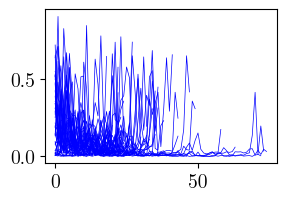

In [13]:
# version 1, cost vs time
ind=np.random.randint(low=0, high=len(tasks))
thetask=tasks[ind]

ax=plt.subplot()
invtag='h'
ax1,ax2=None, None
for isub in range(numhsub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costs=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]
        indls=similar_trials2this(tasks, thetask, ntrial=2)
        subactions=[actions[i] for i in indls]
        subtasks=tasks[indls]
        costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
        for c in costs:
            ax.plot(c,'b',linewidth=0.5)
#         ax1,ax2=plotctrlasd(subactions,ax1=ax1,ax2=ax2)
# ax1.get_figure()

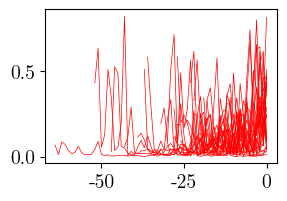

In [14]:
ax=plt.subplot()
invtag='a'
ax1,ax2=None, None
for isub in range(numhsub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costs=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]
        indls=similar_trials2this(tasks, thetask, ntrial=2)
        subactions=[actions[i] for i in indls]
        subtasks=tasks[indls]
        costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
        for c in costs:
            x=np.arange(0,-len(c),-1)
            ax.plot(x,c,'r',linewidth=0.5)
#         ax1,ax2=plotctrlasd(subactions,ax1=ax1,ax2=ax2)
# ax1.get_figure()

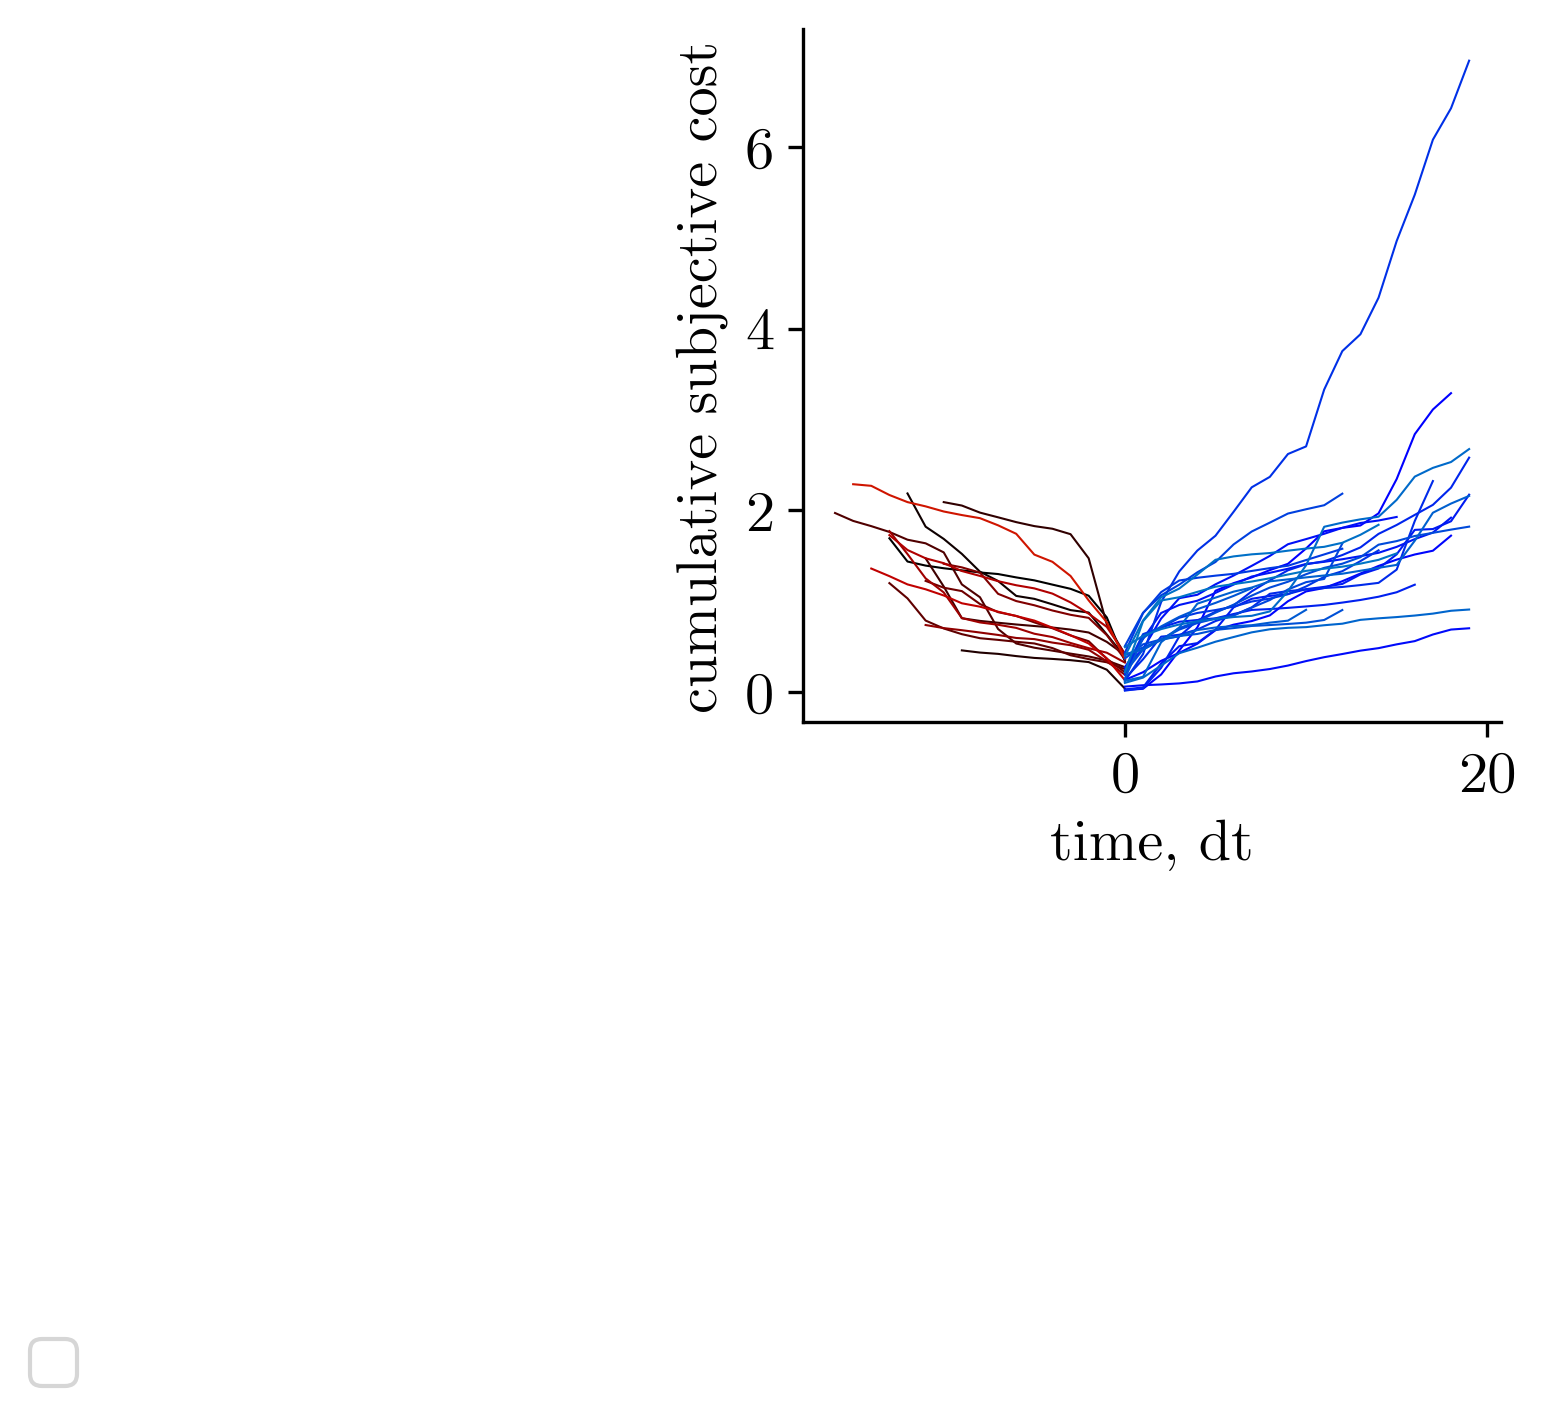

In [15]:

# version2, cumsum, two side
ind=np.random.randint(low=0, high=len(tasks))
thetask=tasks[ind]
# subjective cost, cost*param
with initiate_plot(3,3,300) as f:
    ntrial=3
    dtlim=20
    ax=f.add_subplot(111)
    cm_subsection = linspace(0,1, 25) 
    colors = [ cm.gist_heat(x) for x in cm_subsection ]
    invtag='a'
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            x=np.arange(0,-len(costsmu[:dtlim]),-1)
            ax.plot(x,np.cumsum(costsmu[:dtlim]),color=colors[isub],linewidth=0.5)
    invtag='h'
    cm_subsection = linspace(0, 0.5, 25) 
    colors = [ cm.winter(x) for x in cm_subsection ]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            ax.plot(np.cumsum(costsmu[:dtlim]),color=colors[isub],linewidth=0.5)
    quickleg(ax)
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('cumulative subjective cost')
    # quicksave('cumsum subjective cost asd vs nt for particular target ind={}'.format(ind))

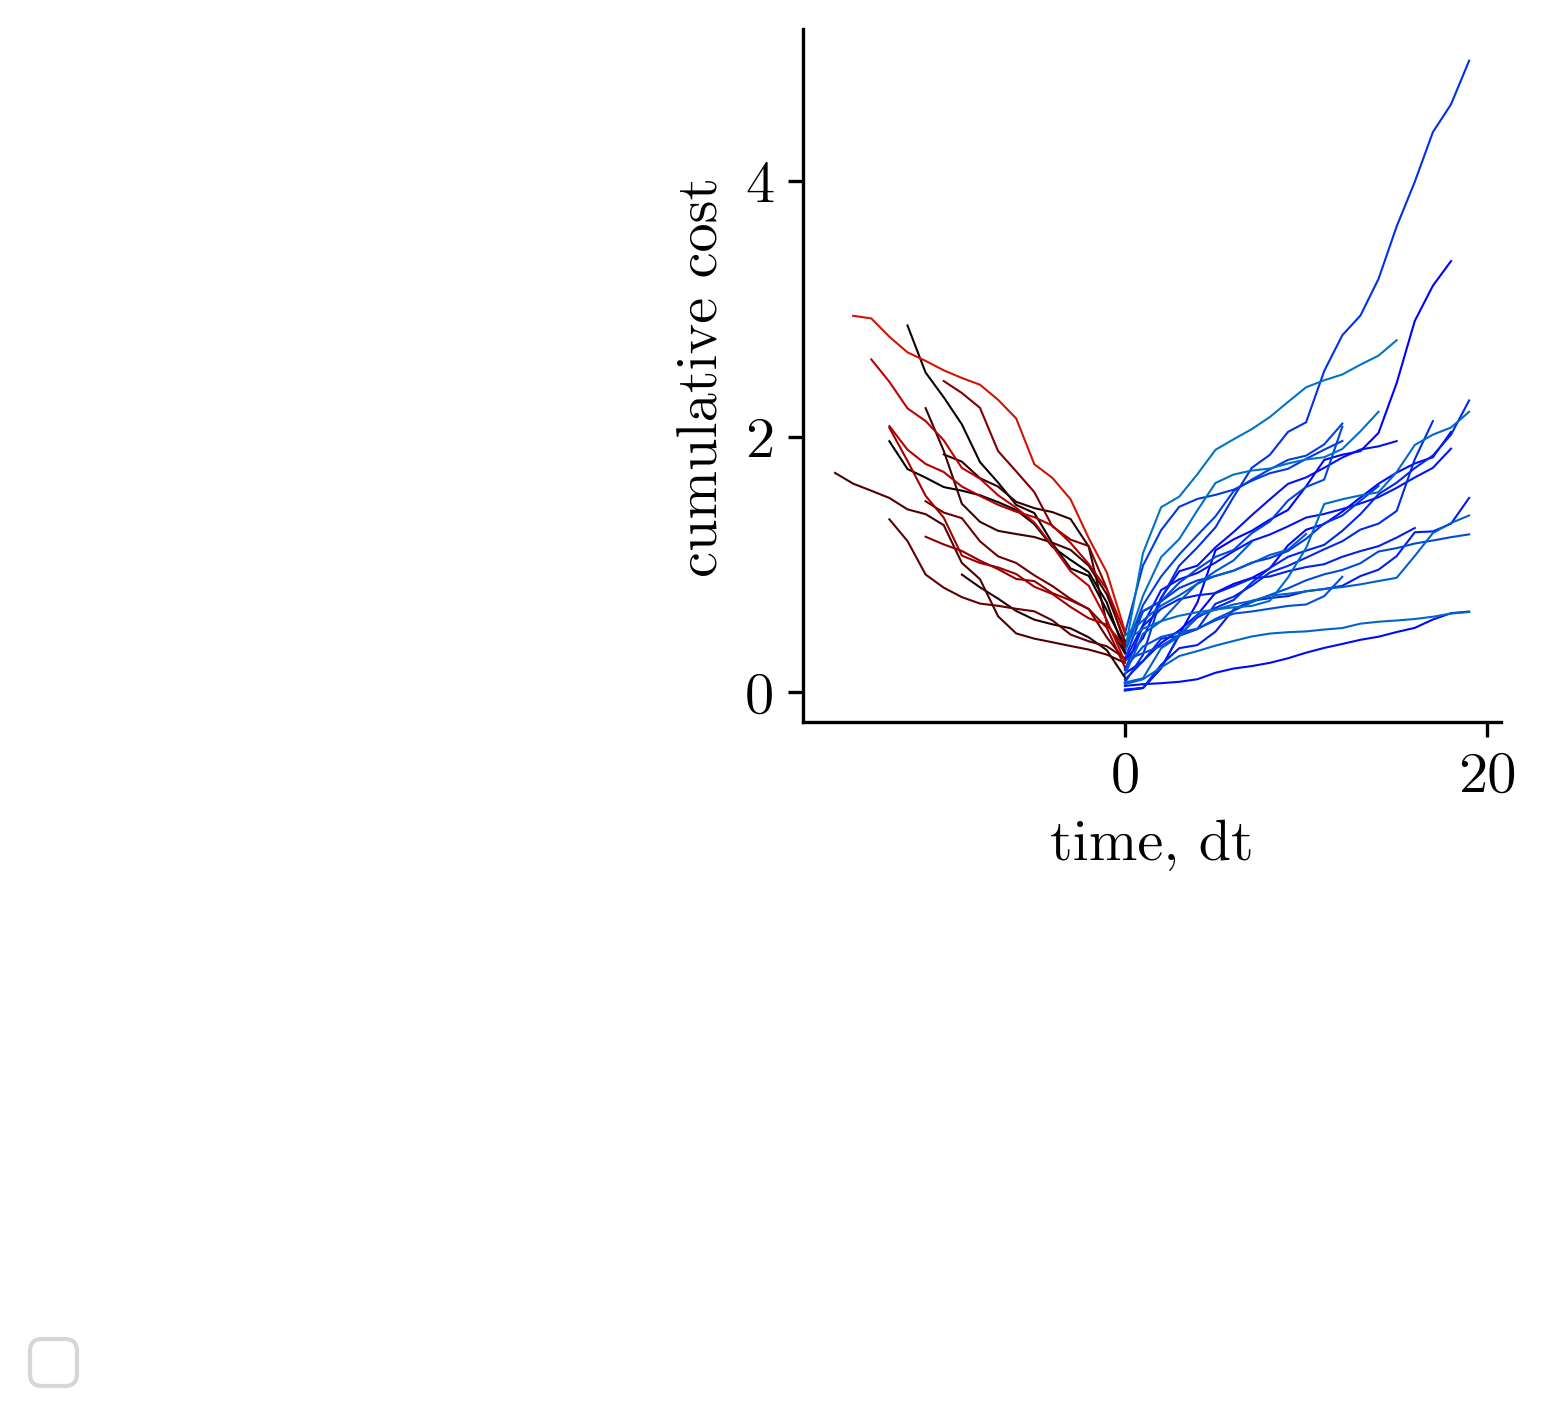

In [16]:

# objective cost, no cost param
with initiate_plot(3,3,300) as f:
    ntrial=3
    dtlim=20
    ax=f.add_subplot(111)
    invtag='h'
    cm_subsection = linspace(0, 0.5, 25) 
    colors = [ cm.winter(x) for x in cm_subsection ]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            x=np.arange(0,len(costsmu[:dtlim]),1)
            ax.plot(x,np.cumsum(costsmu[:dtlim]),color=colors[isub],linewidth=0.5)

    cm_subsection = linspace(0,1, 25) 
    colors = [ cm.gist_heat(x) for x in cm_subsection ]
    invtag='a'
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            x=np.arange(0,-len(costsmu[:dtlim]),-1)
            ax.plot(x,np.cumsum(costsmu[:dtlim]),color=colors[isub],linewidth=0.5)
    quickleg(ax)
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('cumulative cost')
    # quicksave('cumsum cost asd vs nt for particular target ind={}'.format(ind))


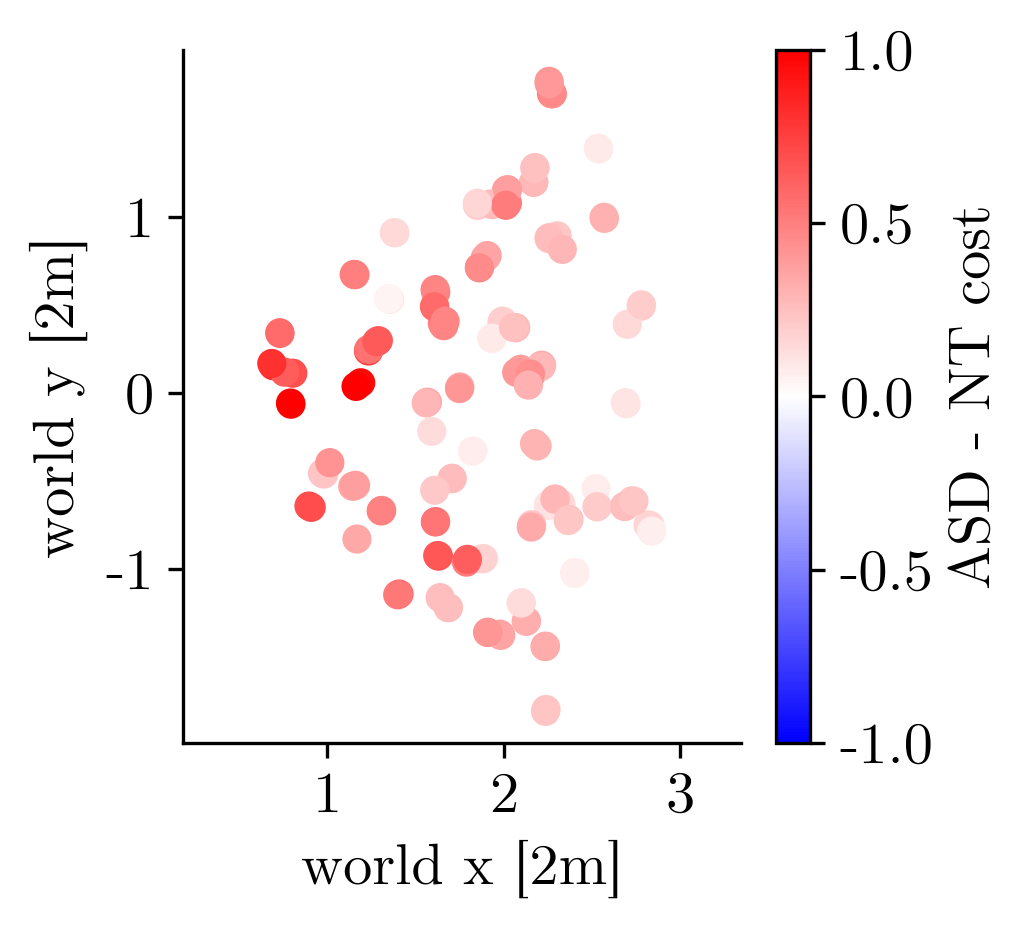

In [17]:

# version 3, asd-nt cost overhead
thetasks=tasks
costdiffs=[]
for thetask in thetasks:
    thiscostdiff=0
    invtag='a'
    for isub in range(numasub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costs=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=2)
            subactions=[actions[i] for i in indls]
            subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            thiscostdiff+=np.mean([np.mean(c) for c in costs])/numasub
    invtag='h'
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costs=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=2)
            subactions=[actions[i] for i in indls]
            subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            thiscostdiff-=np.mean([np.mean(c) for c in costs])/numhsub
    costdiffs.append(thiscostdiff)

normedcostdiffs=normalizematrix(costdiffs)
# normedcostdiffs=np.linspace(0,10,len(thetasks))

with initiate_plot(3,3,300) as f:
    ax=f.add_subplot(111)
    im=ax.scatter(thetasks[:,0], thetasks[:,1], c=normedcostdiffs, cmap='bwr', vmin=-1, vmax=1)
    f.colorbar(im,ax=ax, label='ASD - NT cost')
    quickspine(ax)
    ax.axis('equal')
    ax.set_xlabel('world x [2m]')
    ax.set_ylabel('world y [2m]')
    # quicksave('asd-nt cost overhead')

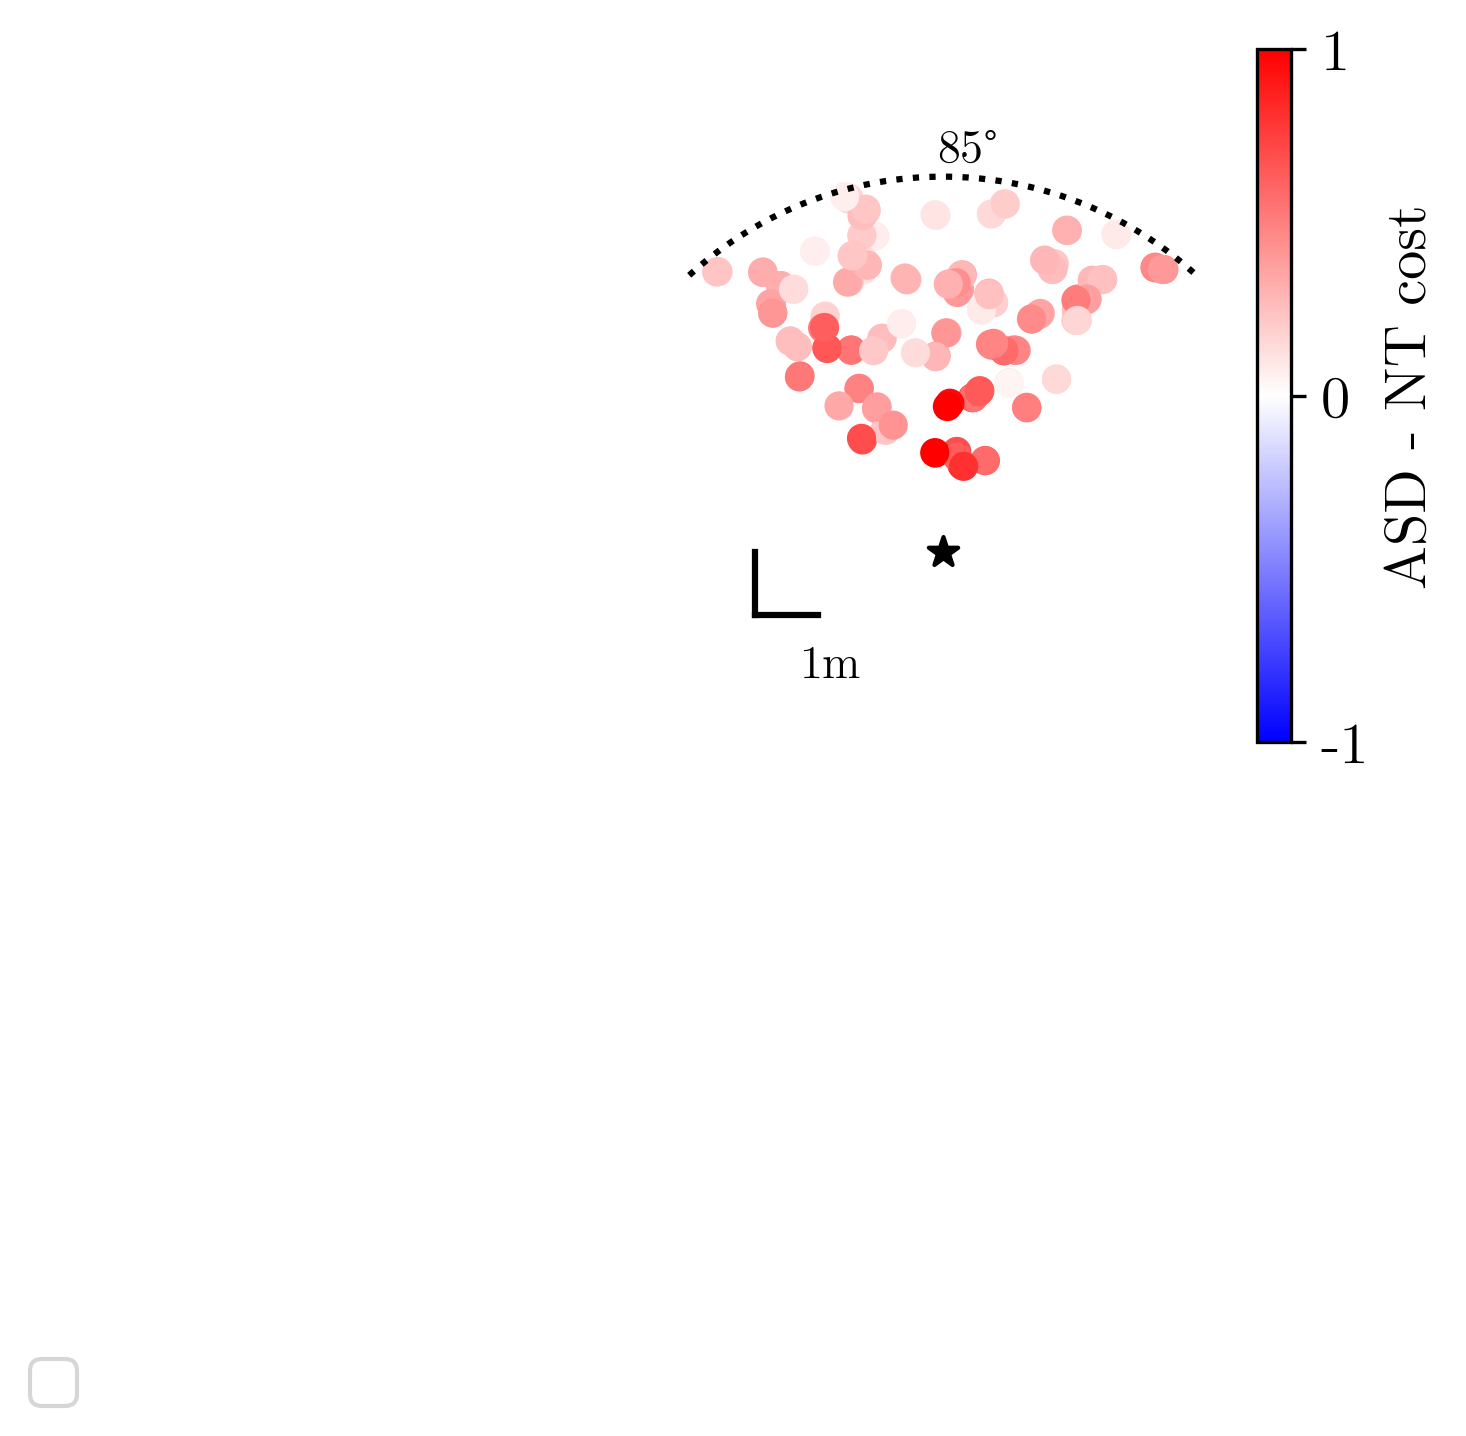

In [18]:
fontsize=11
with initiate_plot(3,3, 300) as fig:
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    im=ax.scatter(thetasks[:,1]*200, thetasks[:,0]*200, c=normedcostdiffs, cmap='bwr', vmin=-1, vmax=1)
    f.colorbar(im,ax=ax, label='ASD - NT cost', ticks=[-1,0,1])

    ax.axis('equal')
    quickleg(ax)
    quickallspine(ax)
    quicksave('asd-nt cost overhead v2')

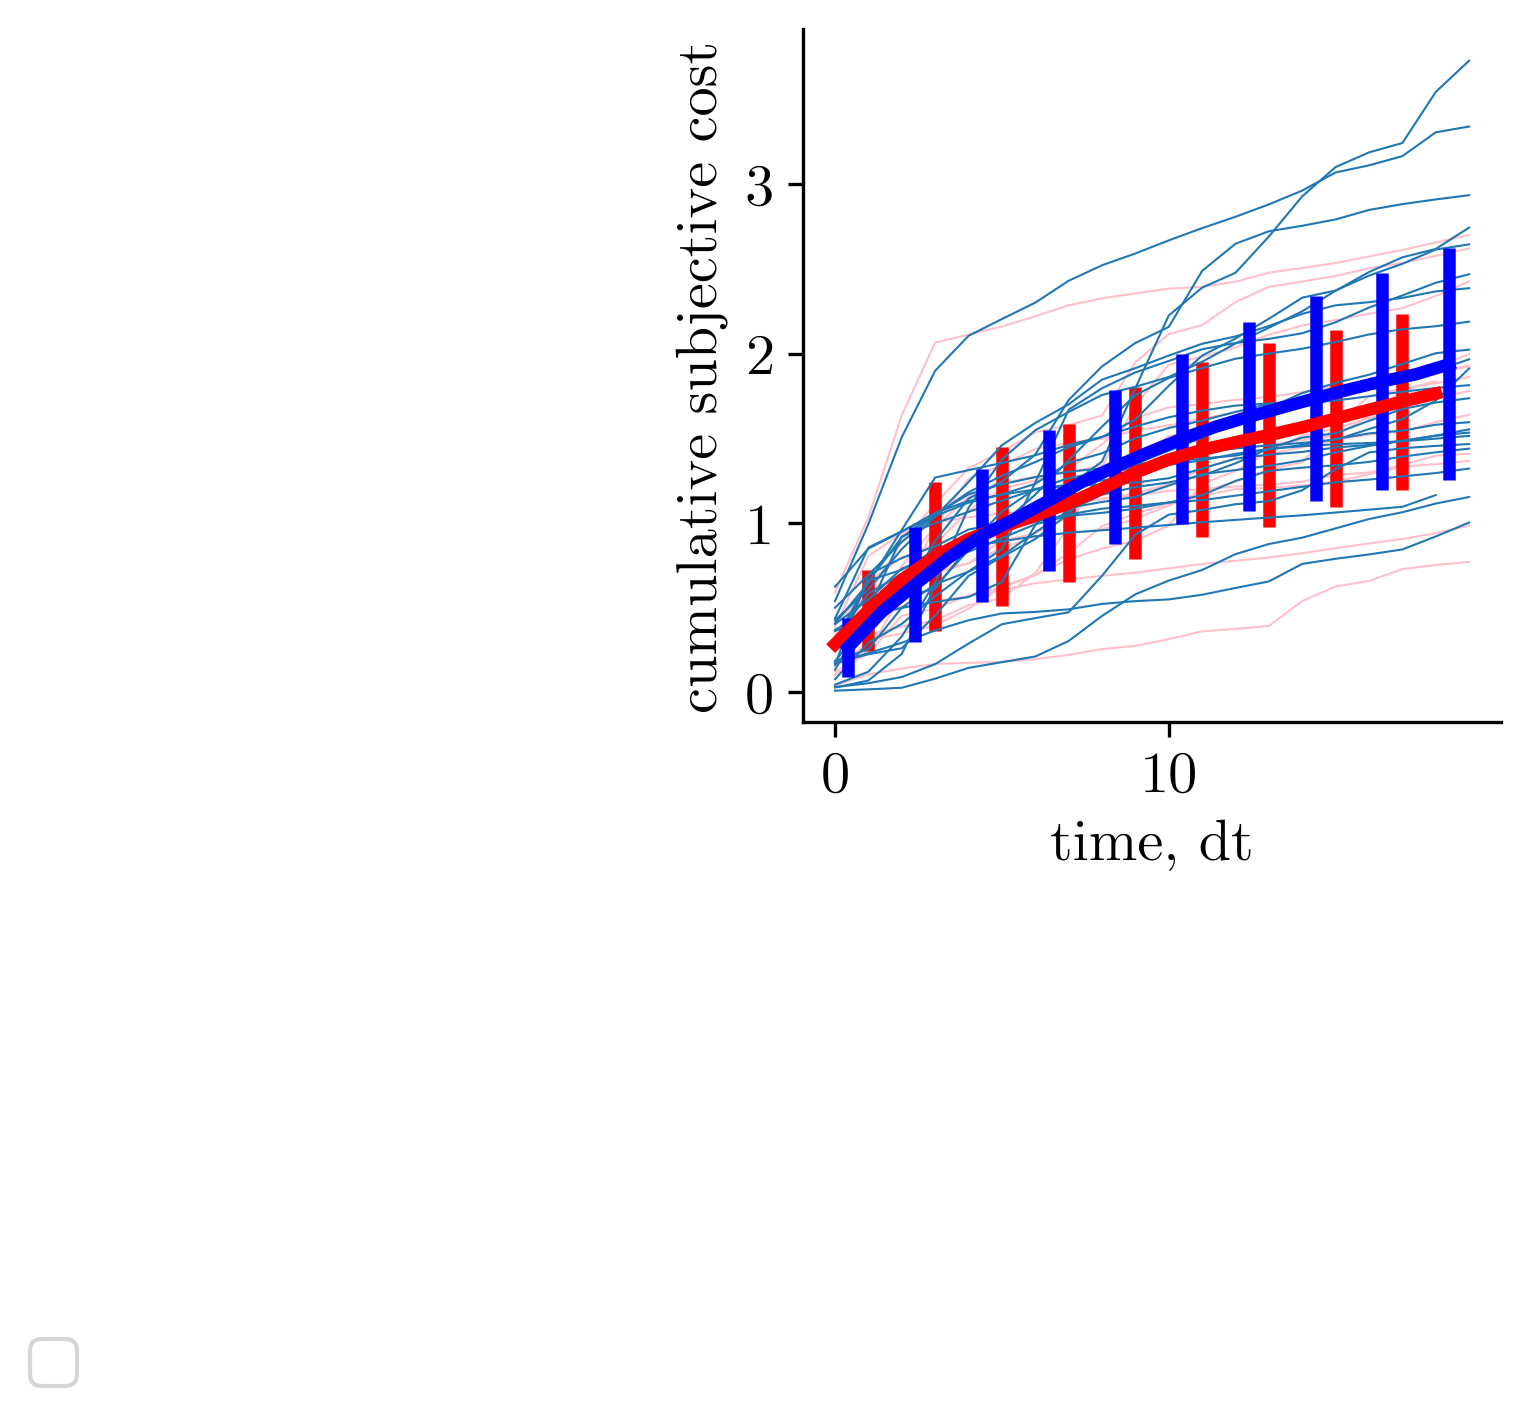

In [19]:

# version4, cumsum same side, solid mean and fade individual
ind=np.random.randint(low=0, high=len(tasks))
thetask=tasks[ind]
# subjective cost, cost*param
with initiate_plot(3,3,300) as f:
    ntrial=3
    dtlim=20
    ax=f.add_subplot(111)
    cm_subsection = linspace(0,1, 25) 
    colors = [ cm.gist_heat(x) for x in cm_subsection ]
    invtag='a'
    allsubdata=[]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            x=np.arange(len(costsmu[:dtlim]))
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(x,np.cumsum(costsmu[:dtlim]),color='pink',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2==0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen),np.mean(allsubdata,axis=0),yerr=yerr,color='r',linewidth=3)

    invtag='h'
    allsubdata=[]
    cm_subsection = linspace(0, 0.5, 25) 
    colors = [ cm.winter(x) for x in cm_subsection ]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(np.cumsum(costsmu[:dtlim]),color='tab:blue',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2!=0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen)+0.4,np.mean(allsubdata,axis=0),yerr=yerr,color='b',linewidth=3)

    quickleg(ax)
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('cumulative subjective cost')
    # quicksave('cumsum subjective cost asd vs nt for particular target ind={}'.format(ind))


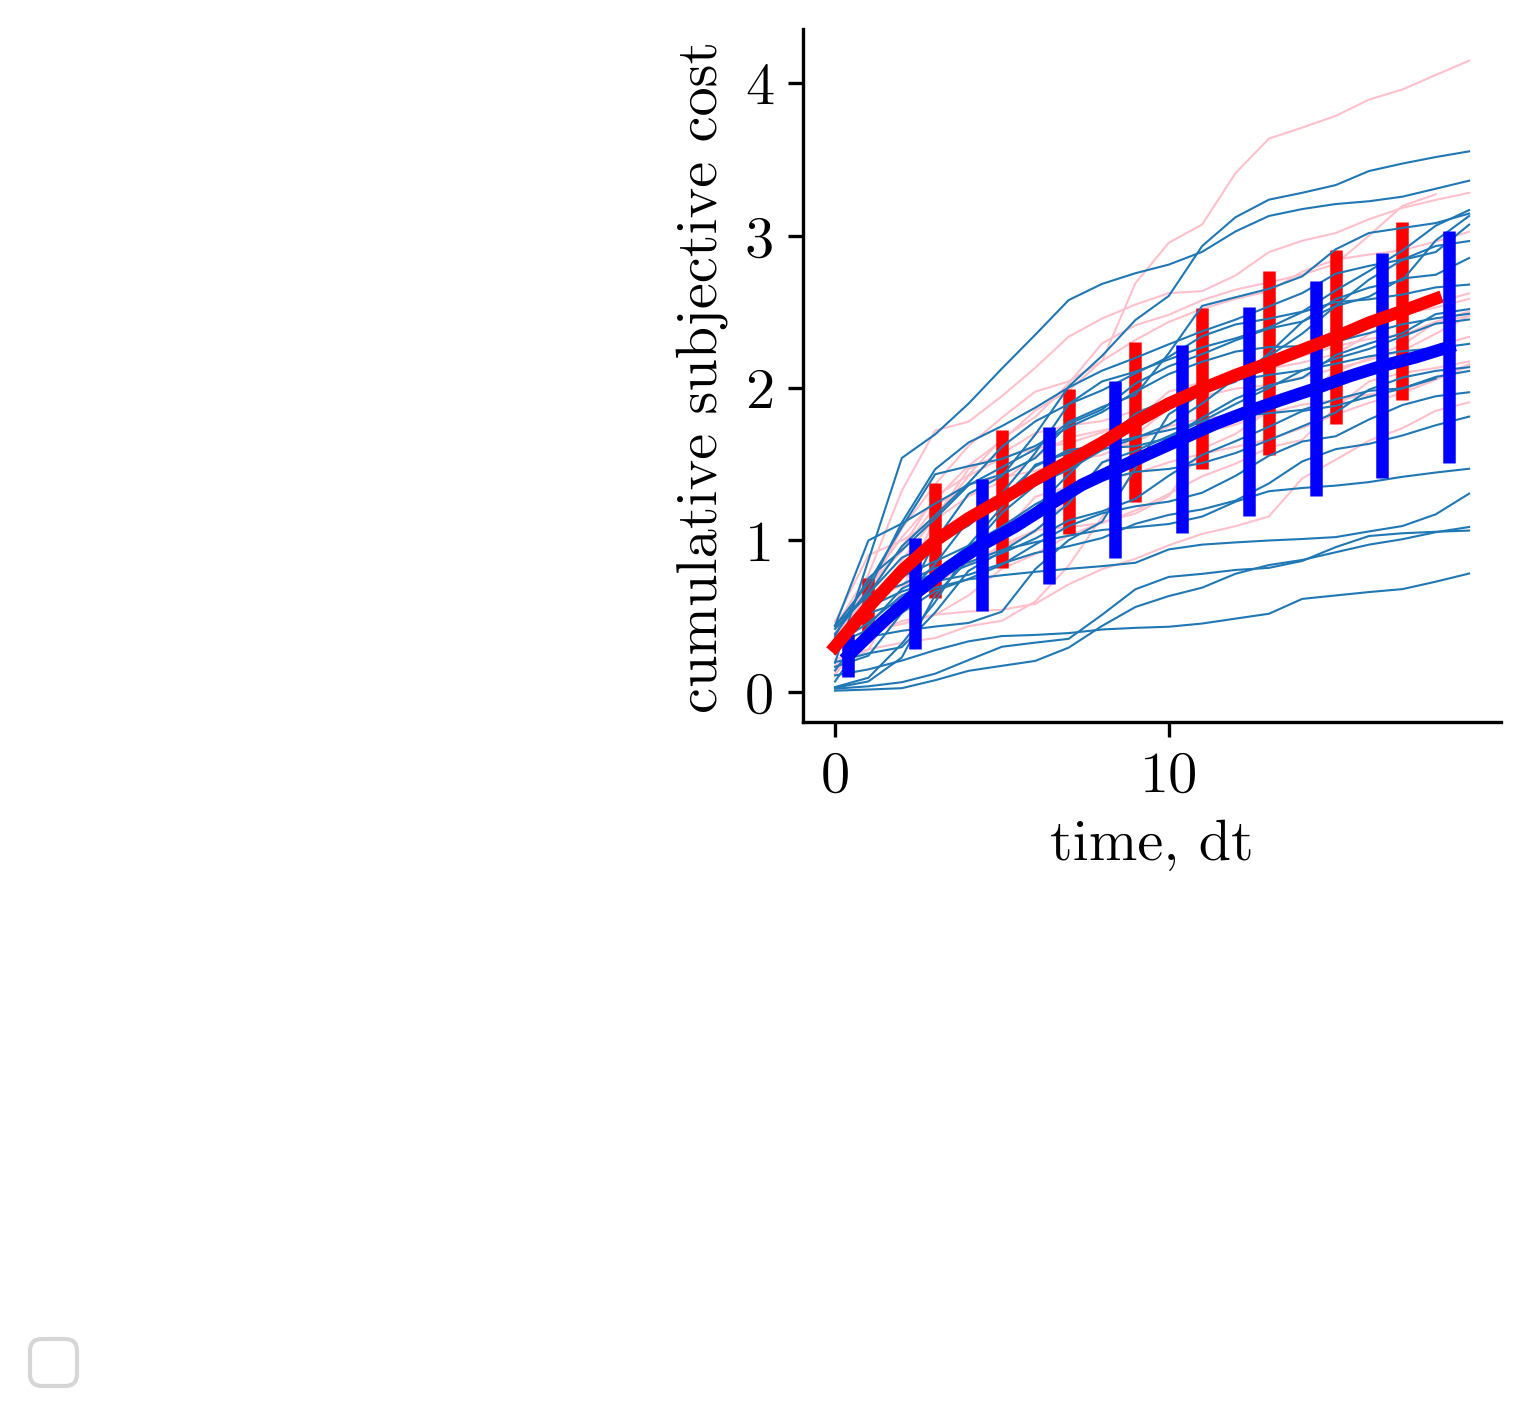

In [20]:

# objective cost, no cost param
with initiate_plot(3,3,300) as f:
    ntrial=3
    dtlim=20
    ax=f.add_subplot(111)
    cm_subsection = linspace(0,1, 25) 
    colors = [ cm.gist_heat(x) for x in cm_subsection ]
    invtag='a'
    allsubdata=[]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            x=np.arange(len(costsmu[:dtlim]))
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(x,np.cumsum(costsmu[:dtlim]),color='pink',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2==0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen),np.mean(allsubdata,axis=0),yerr=yerr,color='r',linewidth=3)

    invtag='h'
    allsubdata=[]
    cm_subsection = linspace(0, 0.5, 25) 
    colors = [ cm.winter(x) for x in cm_subsection ]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(np.cumsum(costsmu[:dtlim]),color='tab:blue',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2!=0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen)+0.4,np.mean(allsubdata,axis=0),yerr=yerr,color='b',linewidth=3)

    quickleg(ax)
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('cumulative subjective cost')
    # quicksave('cumsum cost asd vs nt for particular target ind={}'.format(ind))


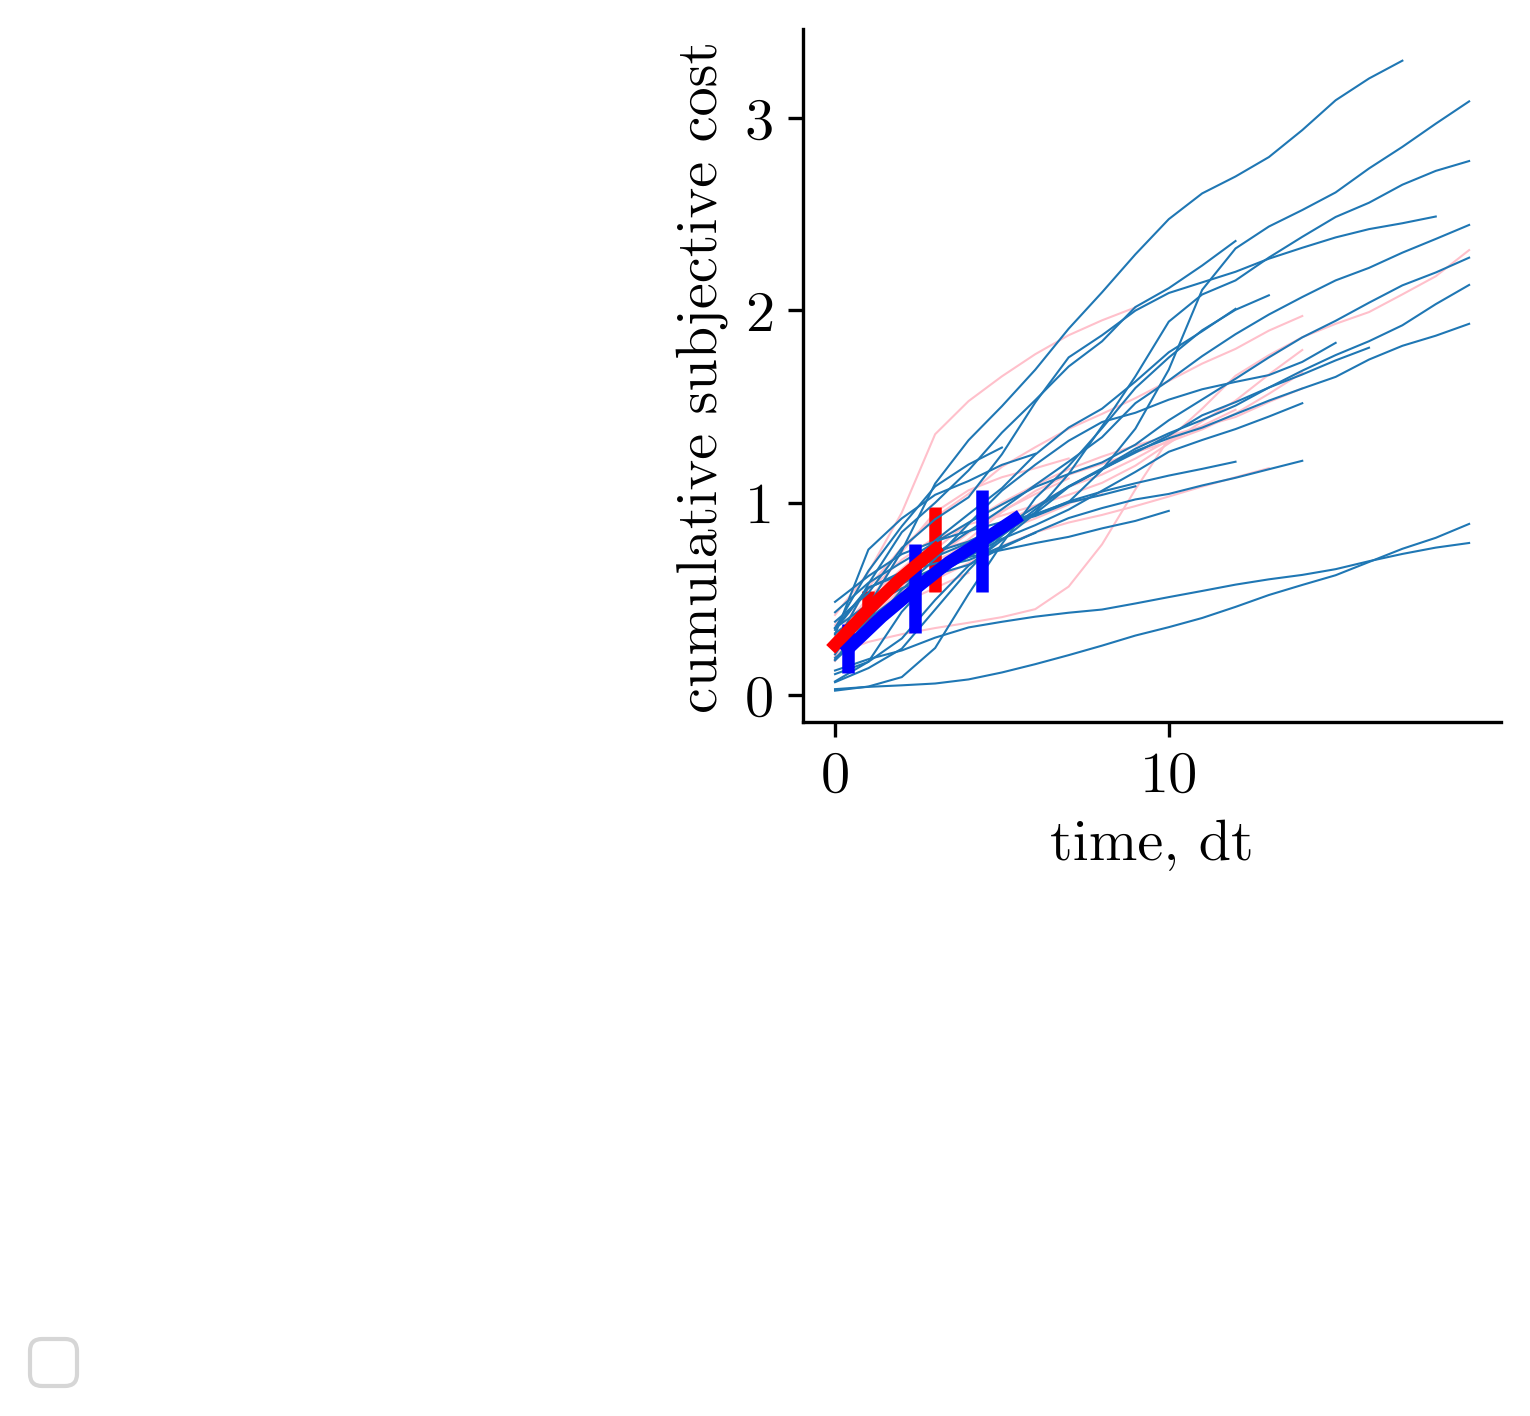

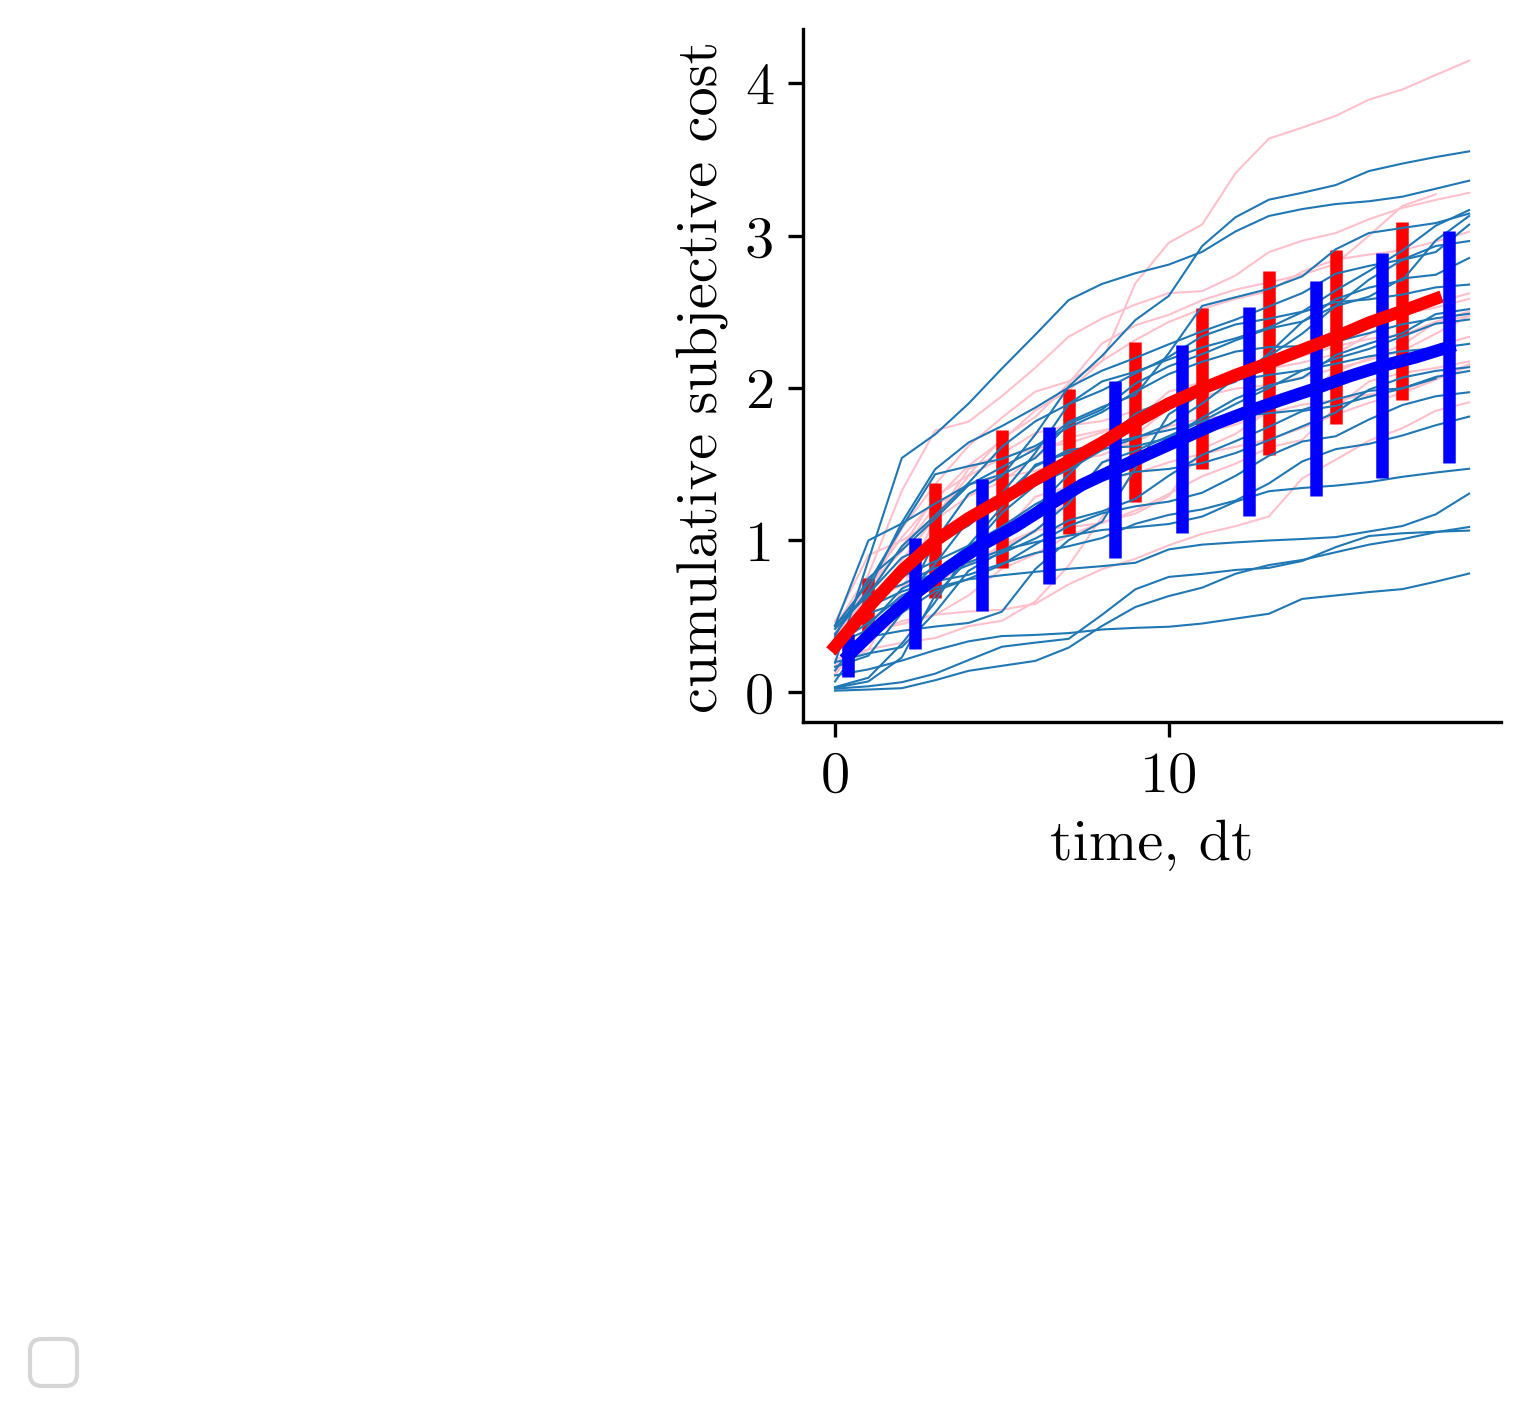

In [21]:

# version 5, same as 4 but use all side trials instead of similar trials
degree=30 # only use trials that has angle > this
# subjective cost, cost*param
with initiate_plot(3,3,300) as f:
    ntrial=3
    dtlim=20
    ax=f.add_subplot(111)
    cm_subsection = linspace(0,1, 25) 
    colors = [ cm.gist_heat(x) for x in cm_subsection ]
    invtag='a'
    allsubdata=[]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]

            # select the side trials
            # indls=[]
            d,a=xy2pol(tasks.T, rotation=False)
            indls=np.argwhere((a<=-pi/180*degree) | (a>=pi/180*degree))
            # if a<=-pi/180*degree or a>=pi/180*degree:
                # indls.append(ind)

            subactions=[actions[i] for i in indls.reshape(-1)]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            x=np.arange(len(costsmu[:dtlim]))
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(x,np.cumsum(costsmu[:dtlim]),color='pink',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2==0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen),np.mean(allsubdata,axis=0),yerr=yerr,color='r',linewidth=3)

    invtag='h'
    allsubdata=[]
    cm_subsection = linspace(0, 0.5, 25) 
    colors = [ cm.winter(x) for x in cm_subsection ]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]

            # select the side trials
            d,a=xy2pol(tasks.T, rotation=False)
            indls=np.argwhere((a<=-pi/180*degree) | (a>=pi/180*degree))

            subactions=[actions[i] for i in indls.reshape(-1)]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(np.cumsum(costsmu[:dtlim]),color='tab:blue',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2!=0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen)+0.4,np.mean(allsubdata,axis=0),yerr=yerr,color='b',linewidth=3)

    quickleg(ax)
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('cumulative subjective cost')
    # quicksave('cumsum subjective cost asd vs nt for particular target ind={}'.format(ind))

# objective cost, no cost param
with initiate_plot(3,3,300) as f:
    ntrial=3
    dtlim=20
    ax=f.add_subplot(111)
    cm_subsection = linspace(0,1, 25) 
    colors = [ cm.gist_heat(x) for x in cm_subsection ]
    invtag='a'
    allsubdata=[]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            x=np.arange(len(costsmu[:dtlim]))
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(x,np.cumsum(costsmu[:dtlim]),color='pink',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2==0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen),np.mean(allsubdata,axis=0),yerr=yerr,color='r',linewidth=3)

    invtag='h'
    allsubdata=[]
    cm_subsection = linspace(0, 0.5, 25) 
    colors = [ cm.winter(x) for x in cm_subsection ]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costparams=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=ntrial)
            subactions=[actions[i] for i in indls]
            # subtasks=tasks[indls]
            costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
            minlen=min([len(a) for a in costs])
            costsmu=np.mean(np.stack([a[:minlen] for a in costs]), axis=0)
            allsubdata.append(np.cumsum(costsmu[:dtlim]))
            ax.plot(np.cumsum(costsmu[:dtlim]),color='tab:blue',linewidth=0.5)
    minlen=min([len(a) for a in allsubdata])
    allsubdata=[a[:minlen] for a in allsubdata]
    allsubdata=np.array(allsubdata)
    yerr=np.std(allsubdata,axis=0)
    for ii in range(minlen):
        if ii%2!=0:
            yerr[ii]=0
    ax.errorbar(np.arange(minlen)+0.4,np.mean(allsubdata,axis=0),yerr=yerr,color='b',linewidth=3)

    quickleg(ax)
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('cumulative subjective cost')
    # quicksave('cumsum cost asd vs nt for particular target ind={}'.format(ind))


TtestResult(statistic=4.868231334511852, pvalue=1.4136791663917709e-06, df=653.0)

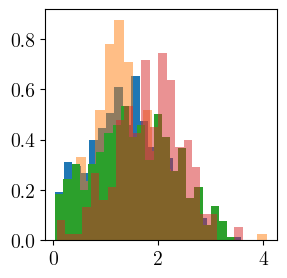

In [22]:

# stats of subjective and objective costs -------------------
degree=35
# subjective
acost, hcost=[],[]
minlen=10
invtag='h'
for isub in range(numhsub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costparams=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]
        d,a=xy2pol(tasks.T, rotation=False)
        indls=np.argwhere((a<=-pi/180*degree) | (a>=pi/180*degree))
        subactions=[actions[i] for i in indls.reshape(-1)]
        costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in  subactions]
        # minlen=min([len(a) for a in costs])
        sumcost=([sum(c[:minlen]) for c in costs]) 
        # sumcost=([sum(c) for c in costs]) 
        hcost+=sumcost
invtag='a'
for isub in range(numasub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costparams=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]
        d,a=xy2pol(tasks.T, rotation=False)
        indls=np.argwhere((a<=-pi/180*degree) | (a>=pi/180*degree))
        subactions=[actions[i] for i in indls.reshape(-1)]
        costs=[np.linalg.norm(np.diff(a,axis=0)*np.array(costparams).reshape(-1),axis=1)  for a in  subactions]        
        # minlen=min([len(a) for a in costs])
        sumcost=([sum(c[:minlen]) for c in costs]) 
        # sumcost=([sum(c) for c in costs]) 
        acost+=sumcost

plt.hist(hcost, density=True, bins=22)
plt.hist(acost, density=True, bins=22, alpha=0.5)
stats.ttest_ind(acost, hcost)


# objective
acost, hcost=[],[]
invtag='h'
for isub in range(numhsub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costparams=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]

        d,a=xy2pol(tasks.T, rotation=False)
        indls=np.argwhere((a<=-pi/180*degree) | (a>=pi/180*degree))
        subactions=[actions[i] for i in indls.reshape(-1)]
        costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]
        # minlen=min([len(a) for a in costs])
        sumcost=([sum(c[:minlen]) for c in costs]) 
        # sumcost=([sum(c) for c in costs]) 
        hcost+=sumcost
invtag='a'
for isub in range(numasub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costparams=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]
        d,a=xy2pol(tasks.T, rotation=False)
        indls=np.argwhere((a<=-pi/180*degree) | (a>=pi/180*degree))
        subactions=[actions[i] for i in indls.reshape(-1)]
        costs=[np.linalg.norm(np.diff(a,axis=0),axis=1)  for a in subactions]        
        # minlen=min([len(a) for a in costs])
        sumcost=([sum(c[:minlen]) for c in costs]) 
        # sumcost=([sum(c) for c in costs]) 
        acost+=sumcost

plt.hist(hcost, density=True, bins=22)
plt.hist(acost, density=True, bins=22, alpha=0.5)
stats.ttest_ind(acost, hcost)




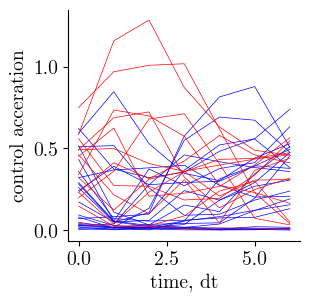

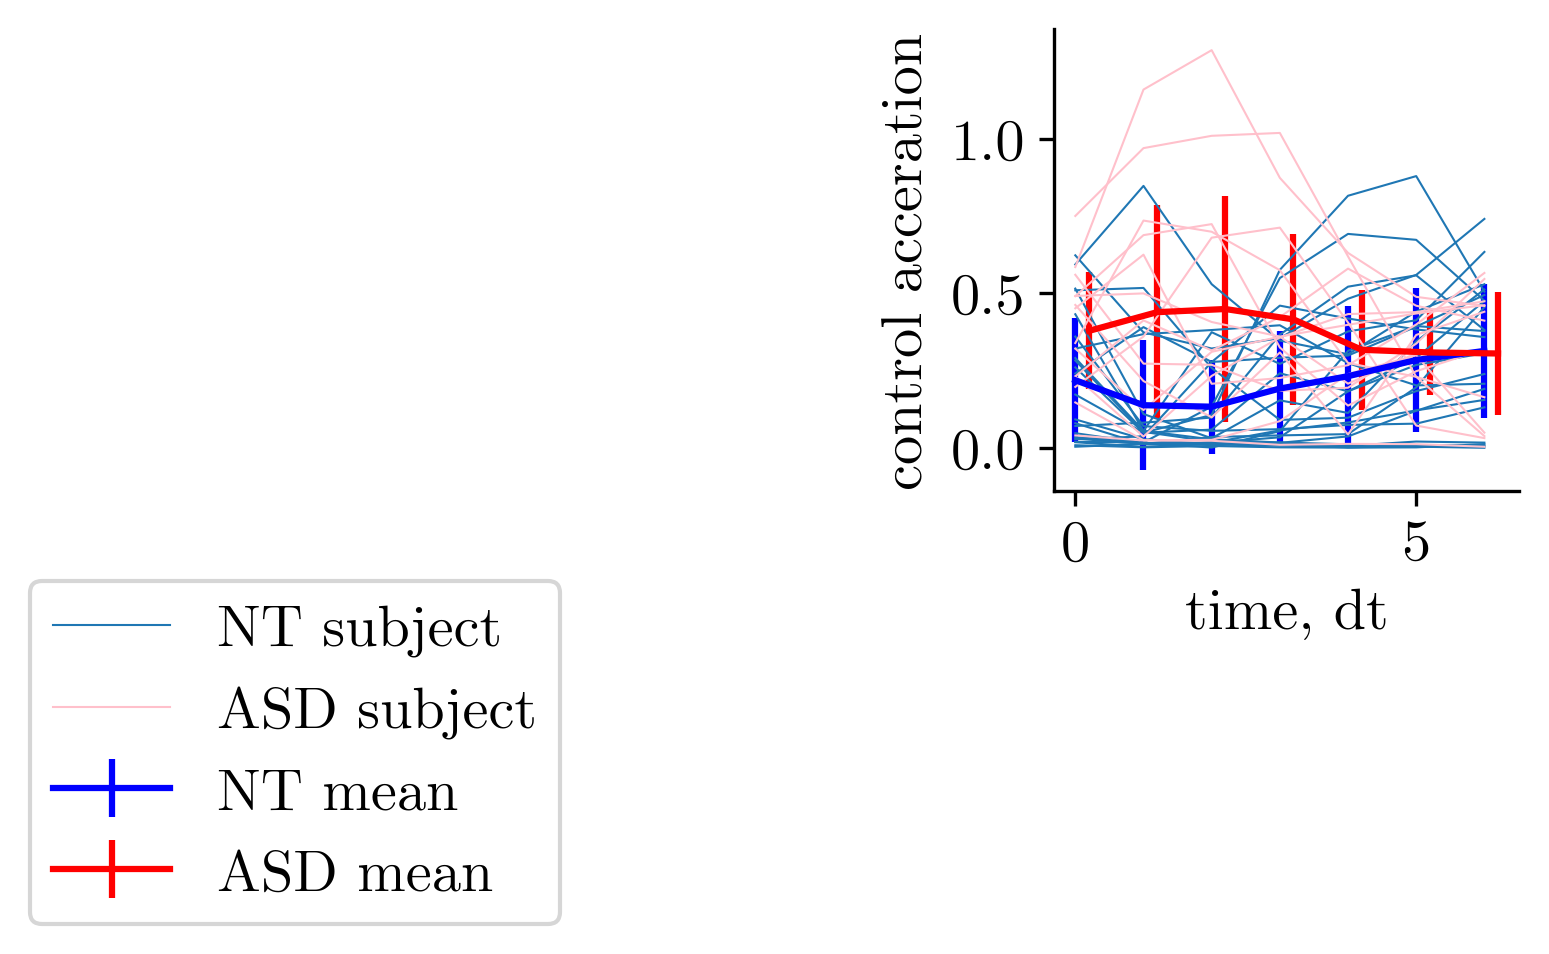

In [23]:


# control onset ----------------------------
ind=np.random.randint(low=0, high=len(tasks))
thetask=tasks[ind]

ax=plt.subplot()
invtag='h'
ax1,ax2=None, None
hgroupa=[]
for isub in range(numhsub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costs=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]
        indls=similar_trials2this(tasks, thetask, ntrial=2)
        subactions=[actions[i] for i in indls]
        subtasks=tasks[indls]
        # meana=np.mean(np.array([np.diff(a[:7,0]) for a in subactions]), axis=0)
        # meana=np.mean(np.array([np.diff(a[:7,1]) for a in subactions]), axis=0)
        meana=np.mean(np.array([np.linalg.norm(np.diff(a[:7]),axis=1) for a in subactions]), axis=0)
        ax.plot(meana,'b',linewidth=0.5)
        hgroupa.append(meana)
invtag='a'
ax1,ax2=None, None
agroupa=[]
for isub in range(numhsub):
    thesub="{}sub{}".format(invtag,str(isub))
    k='res'+thesub
    if k in asd_data_set:
        theta=asd_data_set[k][0]
        costs=theta[-4:-2]
        k='data'+thesub
        _,actions,tasks=asd_data_set[k]
        indls=similar_trials2this(tasks, thetask, ntrial=2)
        subactions=[actions[i] for i in indls]
        subtasks=tasks[indls]
        # meana=np.mean(np.array([np.diff(a[:7,0]) for a in subactions]), axis=0)
        # meana=np.mean(np.array([np.diff(a[:7,1]) for a in subactions]), axis=0)
        meana=np.mean(np.array([np.linalg.norm(np.diff(a[:7]),axis=1) for a in subactions]), axis=0)
        ax.plot(meana,'r',linewidth=0.5)
        agroupa.append(meana)
quickspine(ax)
# quickleg(ax)
ax.set_xlabel('time, dt')
ax.set_ylabel('control acceration')


with initiate_plot(2,2,300) as fig:
    ax=fig.add_subplot(111)
    ax.errorbar(np.arange(len(hgroupa[0])),np.mean(np.array(hgroupa), axis=0),yerr=np.std(np.array(hgroupa), axis=0), color='b', label='NT mean')
    ax.errorbar(np.arange(len(agroupa[0]))+0.2,np.mean(np.array(agroupa), axis=0),yerr=np.std(np.array(agroupa), axis=0), color='r', label='ASD mean')
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('control acceration')
    invtag='h'
    ax1,ax2=None, None
    hgroupa=[]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costs=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=2)
            subactions=[actions[i] for i in indls]
            subtasks=tasks[indls]
            # meana=np.mean(np.array([np.diff(a[:7,0]) for a in subactions]), axis=0)
            # meana=np.mean(np.array([np.diff(a[:7,1]) for a in subactions]), axis=0)
            meana=np.mean(np.array([np.linalg.norm(np.diff(a[:7]),axis=1) for a in subactions]), axis=0)
            ax.plot(meana,'tab:blue',linewidth=0.5, label='NT subject')
            hgroupa.append(meana)
    invtag='a'
    ax1,ax2=None, None
    agroupa=[]
    for isub in range(numhsub):
        thesub="{}sub{}".format(invtag,str(isub))
        k='res'+thesub
        if k in asd_data_set:
            theta=asd_data_set[k][0]
            costs=theta[-4:-2]
            k='data'+thesub
            _,actions,tasks=asd_data_set[k]
            indls=similar_trials2this(tasks, thetask, ntrial=2)
            subactions=[actions[i] for i in indls]
            subtasks=tasks[indls]
            # meana=np.mean(np.array([np.diff(a[:7,0]) for a in subactions]), axis=0)
            # meana=np.mean(np.array([np.diff(a[:7,1]) for a in subactions]), axis=0)
            meana=np.mean(np.array([np.linalg.norm(np.diff(a[:7]),axis=1) for a in subactions]), axis=0)
            ax.plot(meana,'pink',linewidth=0.5, label='ASD subject')
            agroupa.append(meana)
    quickleg(ax)
    # quicksave('asd accerate control faster v2')




In [24]:
# three together. high.low cost, no adjust 0516 --------------------
thetask=[2.5,1.5]
ntrial=5
pertstart=10
phi=torch.tensor([[1],   
                [pi/2],   
                [0.0],   
                [0.0],   
                [0.0],   
                [0.0],   
                [0.13],   
                [0.5],   
                [0.5],   
                [0.5],   
                [0.5]])
# given_obs=torch.vstack([torch.ones(size=(pertstart,2))*1.9, -0.1*torch.ones(size=(95,2))])
given_obs=torch.hstack(
    [torch.ones(size=(99,1))*0.,
    torch.vstack([torch.ones(size=(5,1))*0., -1.6*torch.ones(size=(10,1)) ,0.*torch.ones(size=(99-5*3,1))])])

# given_obs=torch.normal(torch.zeros(100,2),0.3)

basetheta=torch.tensor([[1],   
                        [pi/2],   
                        [0.5],   
                        [0.5],   
                        [0.0],   
                        [0.0],   
                        [0.13],   
                        [0.1],   
                        [0.01],   
                        [0.01],   
                        [0.01]])
# low cost
theta1=basetheta.clone()
theta1[8]=0.01
states1,actions1, beliefs1, covs1=run_trials(agent=agent, env=env, phi=phi, theta=theta1,task=thetask,ntrials=ntrial,given_obs=given_obs,return_belief=True)
# high cost
theta2=basetheta.clone()
theta2[8]=0.9
states2,actions2, beliefs2, covs2=run_trials(agent=agent, env=env, phi=phi, theta=theta2,task=thetask,ntrials=ntrial,given_obs=given_obs,return_belief=True)
# no adj
states3,actions3, beliefs3, covs3=run_trials(agent=agent, env=env, phi=phi, theta=theta2,task=thetask,ntrials=ntrial,pert=None,given_obs=None,return_belief=True)

mintimebuffer=10
mintime=min([len(s) for s in states1]+[len(s) for s in states2]+[len(s) for s in states3])+mintimebuffer
states1=[s[:mintime] for s in states1]
actions1=[s[:mintime] for s in actions1]
states2=[s[:mintime] for s in states2]
actions2=[s[:mintime] for s in actions2]
states3=[s[:mintime] for s in states3]
actions3=[s[:mintime] for s in actions3]


In [31]:
states1,actions1, beliefs1, covs1=run_trials(agent=agent, env=env, phi=phi, theta=theta1,task=thetask,ntrials=ntrial,given_obs=given_obs,return_belief=True)
agent, env, phi, theta1, thetask,ntrial,given_obs[0]

RuntimeError: "ge_cpu" not implemented for 'ComplexFloat'

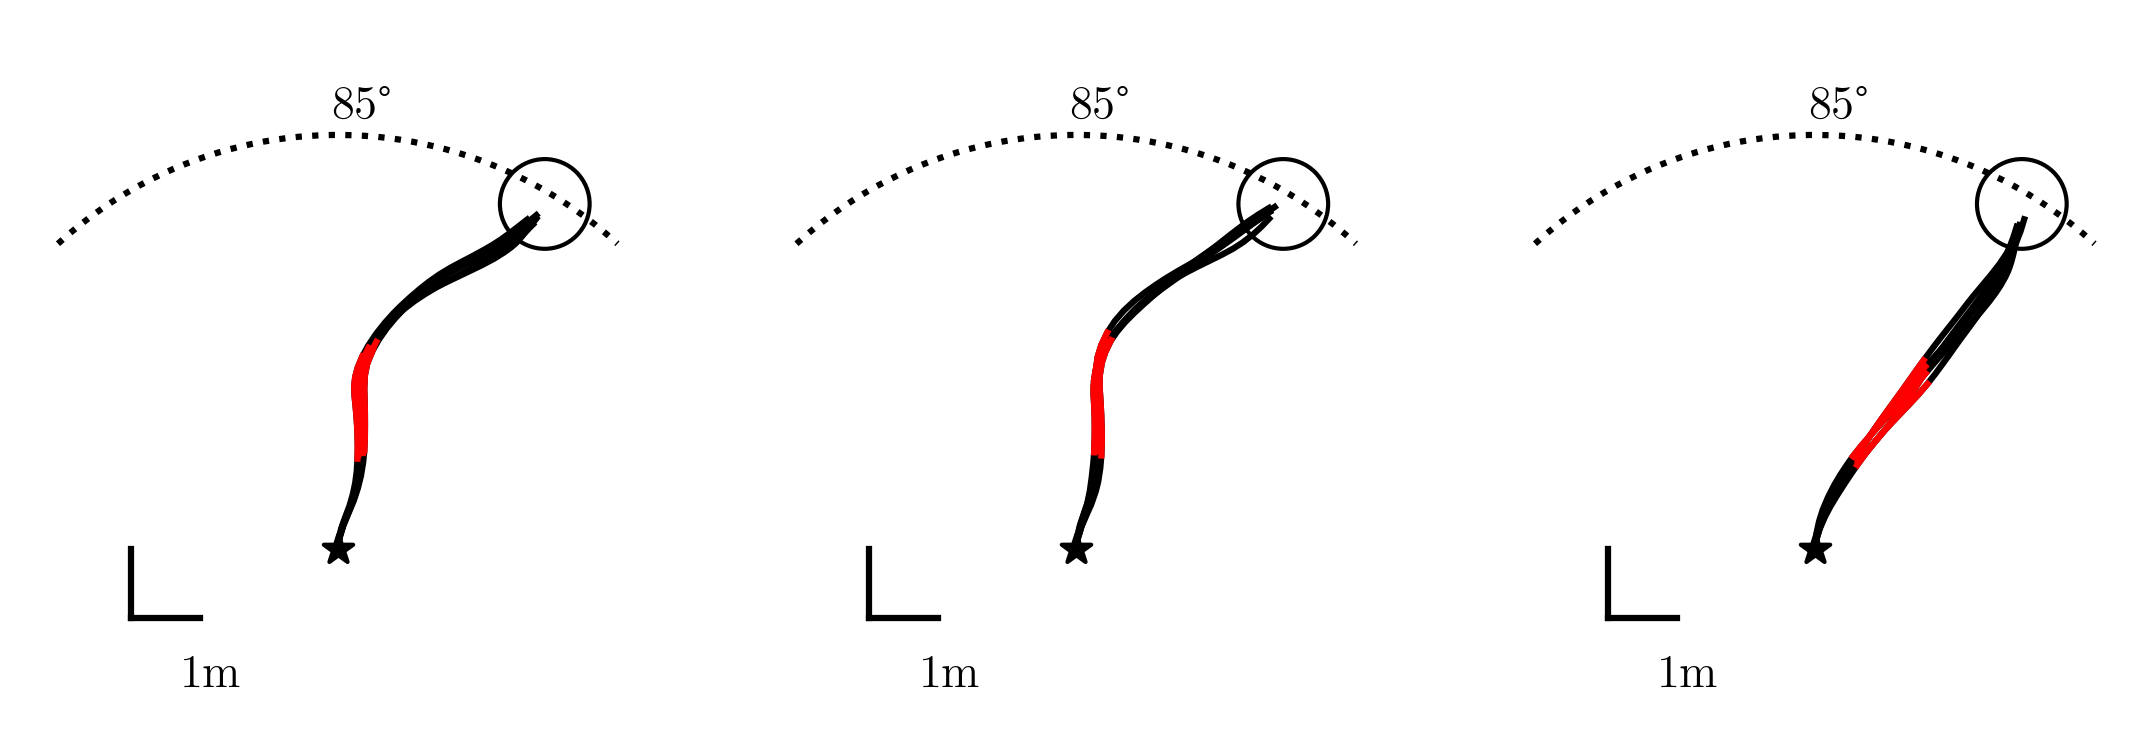

In [25]:

# overhead
with initiate_plot(9,3, 300) as fig:
    ax = fig.add_subplot(131)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 
    for s in beliefs1:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    for s in beliefs1:
        ax.plot(s[pertstart:pertstart+10,1]*200, s[pertstart:pertstart+10,0]*200, color='r')

    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    quickallspine(ax)

    ax = fig.add_subplot(132)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    for s in beliefs2:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    for s in beliefs2:
        ax.plot(s[pertstart:pertstart+10,1]*200, s[pertstart:pertstart+10,0]*200, color='r')

    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    quickallspine(ax)

    ax = fig.add_subplot(133)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    for s in beliefs3:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    for s in beliefs3:
        ax.plot(s[pertstart:pertstart+10,1]*200, s[pertstart:pertstart+10,0]*200, color='r')
    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    quickallspine(ax)

    # quicksave('model low cost overhead')
# quicksave('3 case cost vs adjustment overhead2', fig=ax.get_figure())


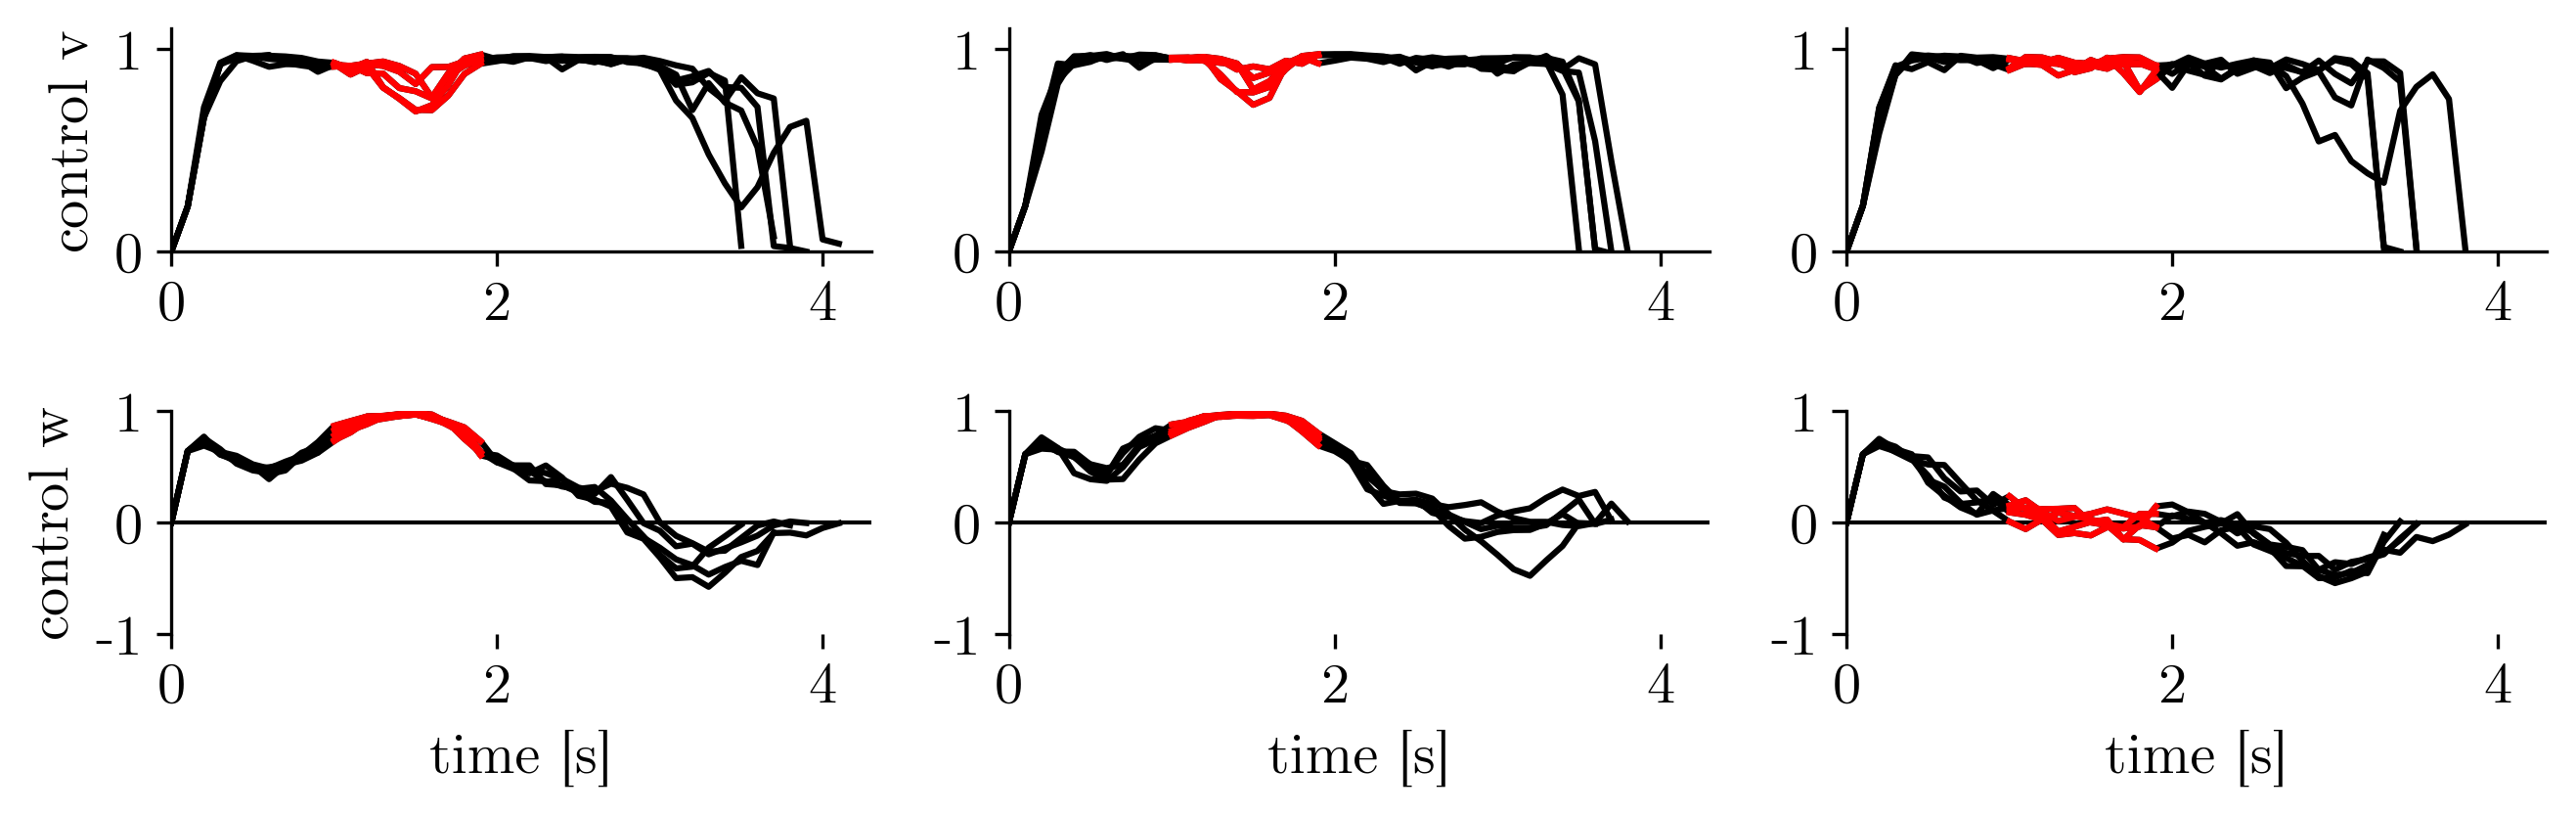

In [26]:

# v and w control curve
labels=[r'$v$',r'$w$']
num_trials=len(actions1)
with initiate_plot(9,3, 300) as fig, warnings.catch_warnings():
    # low cost
    ax= fig.add_subplot(231)
    ax.set_ylabel(r'control $v$')
    quickspine(ax)
    # ax.spines['bottom'].set_visible(False)
    plt.xlim(0,mintime/10)
    plt.ylim(0,1.1)
    plt.yticks([0,1])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][:,0])/10,0.1),actions1[trial_i][:,0],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][pertstart:pertstart+10,0])/10,0.1)+pertstart/10,actions1[trial_i][pertstart:pertstart+10,0],color='r', label=labels[0])

    
    ax= fig.add_subplot(234)
    ax.set_ylabel(r'control $w$')
    ax.set_xlabel('time [s]')
    quickspine(ax)
    ax.spines['bottom'].set_visible(False)
    plt.plot([0,mintime/10],[0,0],'k', linewidth=1)
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][:,0])/10,0.1),actions1[trial_i][:,1],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][pertstart:pertstart+10,1])/10,0.1)+pertstart/10,actions1[trial_i][pertstart:pertstart+10,1],color='r', label=labels[0])
    plt.xlim(0,mintime/10)
    plt.ylim(-1,1)
    plt.yticks([-1,0,1])

    # high cost
    ax= fig.add_subplot(232)
    # ax.set_ylabel(r'control $v$')
    quickspine(ax)
    # ax.spines['bottom'].set_visible(False)
    plt.xlim(0,mintime/10)
    plt.ylim(0,1.1)
    plt.yticks([0,1])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][:,0])/10,0.1),actions2[trial_i][:,0],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][pertstart:pertstart+10,0])/10,0.1)+pertstart/10,actions2[trial_i][pertstart:pertstart+10,0],color='r', label=labels[0])
   
    ax= fig.add_subplot(235)
    # ax.set_ylabel(r'control $w$')
    ax.set_xlabel('time [s]')
    quickspine(ax)
    ax.spines['bottom'].set_visible(False)
    plt.plot([0,mintime/10],[0,0],'k', linewidth=1)
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][:,1])/10,0.1),actions2[trial_i][:,1],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][pertstart:pertstart+10,1])/10,0.1)+pertstart/10,actions2[trial_i][pertstart:pertstart+10,1],color='r', label=labels[0])
    plt.xlim(0,mintime/10)
    plt.ylim(-1,1)
    plt.yticks([-1,0,1])

    # no adj
    ax= fig.add_subplot(233)
    # ax.set_ylabel(r'control $v$')
    quickspine(ax)
    # ax.spines['bottom'].set_visible(False)
    plt.xlim(0,mintime/10)
    plt.ylim(0,1.1)
    plt.yticks([0,1])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][:,0])/10,0.1),actions3[trial_i][:,0],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][pertstart:pertstart+10,0])/10,0.1)+pertstart/10,actions3[trial_i][pertstart:pertstart+10,0],color='r', label=labels[0])
    ax= fig.add_subplot(236)
    # ax.set_ylabel(r'control $w$')
    ax.set_xlabel('time [s]')
    quickspine(ax)
    ax.spines['bottom'].set_visible(False)
    plt.plot([0,mintime/10],[0,0],'k', linewidth=1)
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][:,0])/10,0.1),actions3[trial_i][:,1],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][pertstart:pertstart+10,1])/10,0.1)+pertstart/10,actions3[trial_i][pertstart:pertstart+10,1],color='r', label=labels[0])
    plt.xlim(0,mintime/10)
    plt.ylim(-1,1)
    plt.yticks([-1,0,1])


    plt.tight_layout()
# quicksave('3 case cost vs adjustment ctrl curve2', fig=ax.get_figure())


In [ ]:

# cost
mintime-=mintimebuffer
# angular cost
with initiate_plot(9,1,300) as fig:
    ax=fig.add_subplot(131)
    costs,costsmu,costserr= calculate_costw([a[:,1].view(-1,1) for a in actions1],mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    quickspine(ax)
    ax.set_ylabel('objective cost')
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,None)
    ax.set_ylim(0,0.05)
    ax.set_xlim(pertstart/10,mintime/10)
    plt.title(sum(costsmu[pertstart:]))
    # plt.title(sum(costsmu))


    ax=fig.add_subplot(132, sharey=ax)
    costs,costsmu,costserr= calculate_costw([a[:,1].view(-1,1) for a in actions2],mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    quickspine(ax)
    ax.set_xlabel('time [s]')
    ax.set_xlim(pertstart/10,mintime/10)
    plt.title(sum(costsmu[pertstart:]))
    # plt.title(sum(costsmu))

    ax=fig.add_subplot(133, sharey=ax)
    costs,costsmu,costserr= calculate_costw([a[:,1].view(-1,1) for a in actions3],mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    quickspine(ax)
    ax.set_xlabel('time [s]')
    ax.set_xlim(pertstart/10,mintime/10)
    plt.title(sum(costsmu[pertstart:]))
    # plt.title(sum(costsmu))

    # quicksave('low cost adjustment cost')

# total cost
with initiate_plot(9,1,300) as fig:
    ax=fig.add_subplot(131)
    costs,costsmu,costserr= calculate_cost(actions1,mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1)[pertstart:pertstart+10], costsmu[pertstart:pertstart+10], yerr=costserr[pertstart:pertstart+10],color='r')
    quickspine(ax)
    ax.set_ylabel('objective cost')
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,None)
    ax.set_ylim(0,0.03)
    ax.set_xlim(0,mintime/10+1)
    plt.xticks([0,1,2,3])
    plt.title('total cost after pert: {:.2f}'.format(sum(costsmu[pertstart:])))
    # plt.title(sum(costsmu))


    ax=fig.add_subplot(132, sharey=ax)
    costs,costsmu,costserr= calculate_cost(actions2,mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1)[pertstart:pertstart+10], costsmu[pertstart:pertstart+10], yerr=costserr[pertstart:pertstart+10],color='r')
    quickspine(ax)
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,mintime/10+1)
    plt.xticks([0,1,2,3])
    plt.title('total cost after pert: {:.2f}'.format(sum(costsmu[pertstart:])))
    # plt.title(sum(costsmu))

    ax=fig.add_subplot(133, sharey=ax)
    costs,costsmu,costserr= calculate_cost(actions3,mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1)[pertstart:pertstart+10], costsmu[pertstart:pertstart+10], yerr=costserr[pertstart:pertstart+10],color='r')
    quickspine(ax)
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,mintime/10+1)
    plt.xticks([0,1,2,3])
    plt.title('total cost after pert: {:.2f}'.format(sum(costsmu[pertstart:])))
    # plt.title(sum(costsmu))

    plt.tight_layout()

# quicksave('3 case cost vs adjustment cost2', fig=ax.get_figure())


IndexError: index 35 is out of bounds for axis 0 with size 35

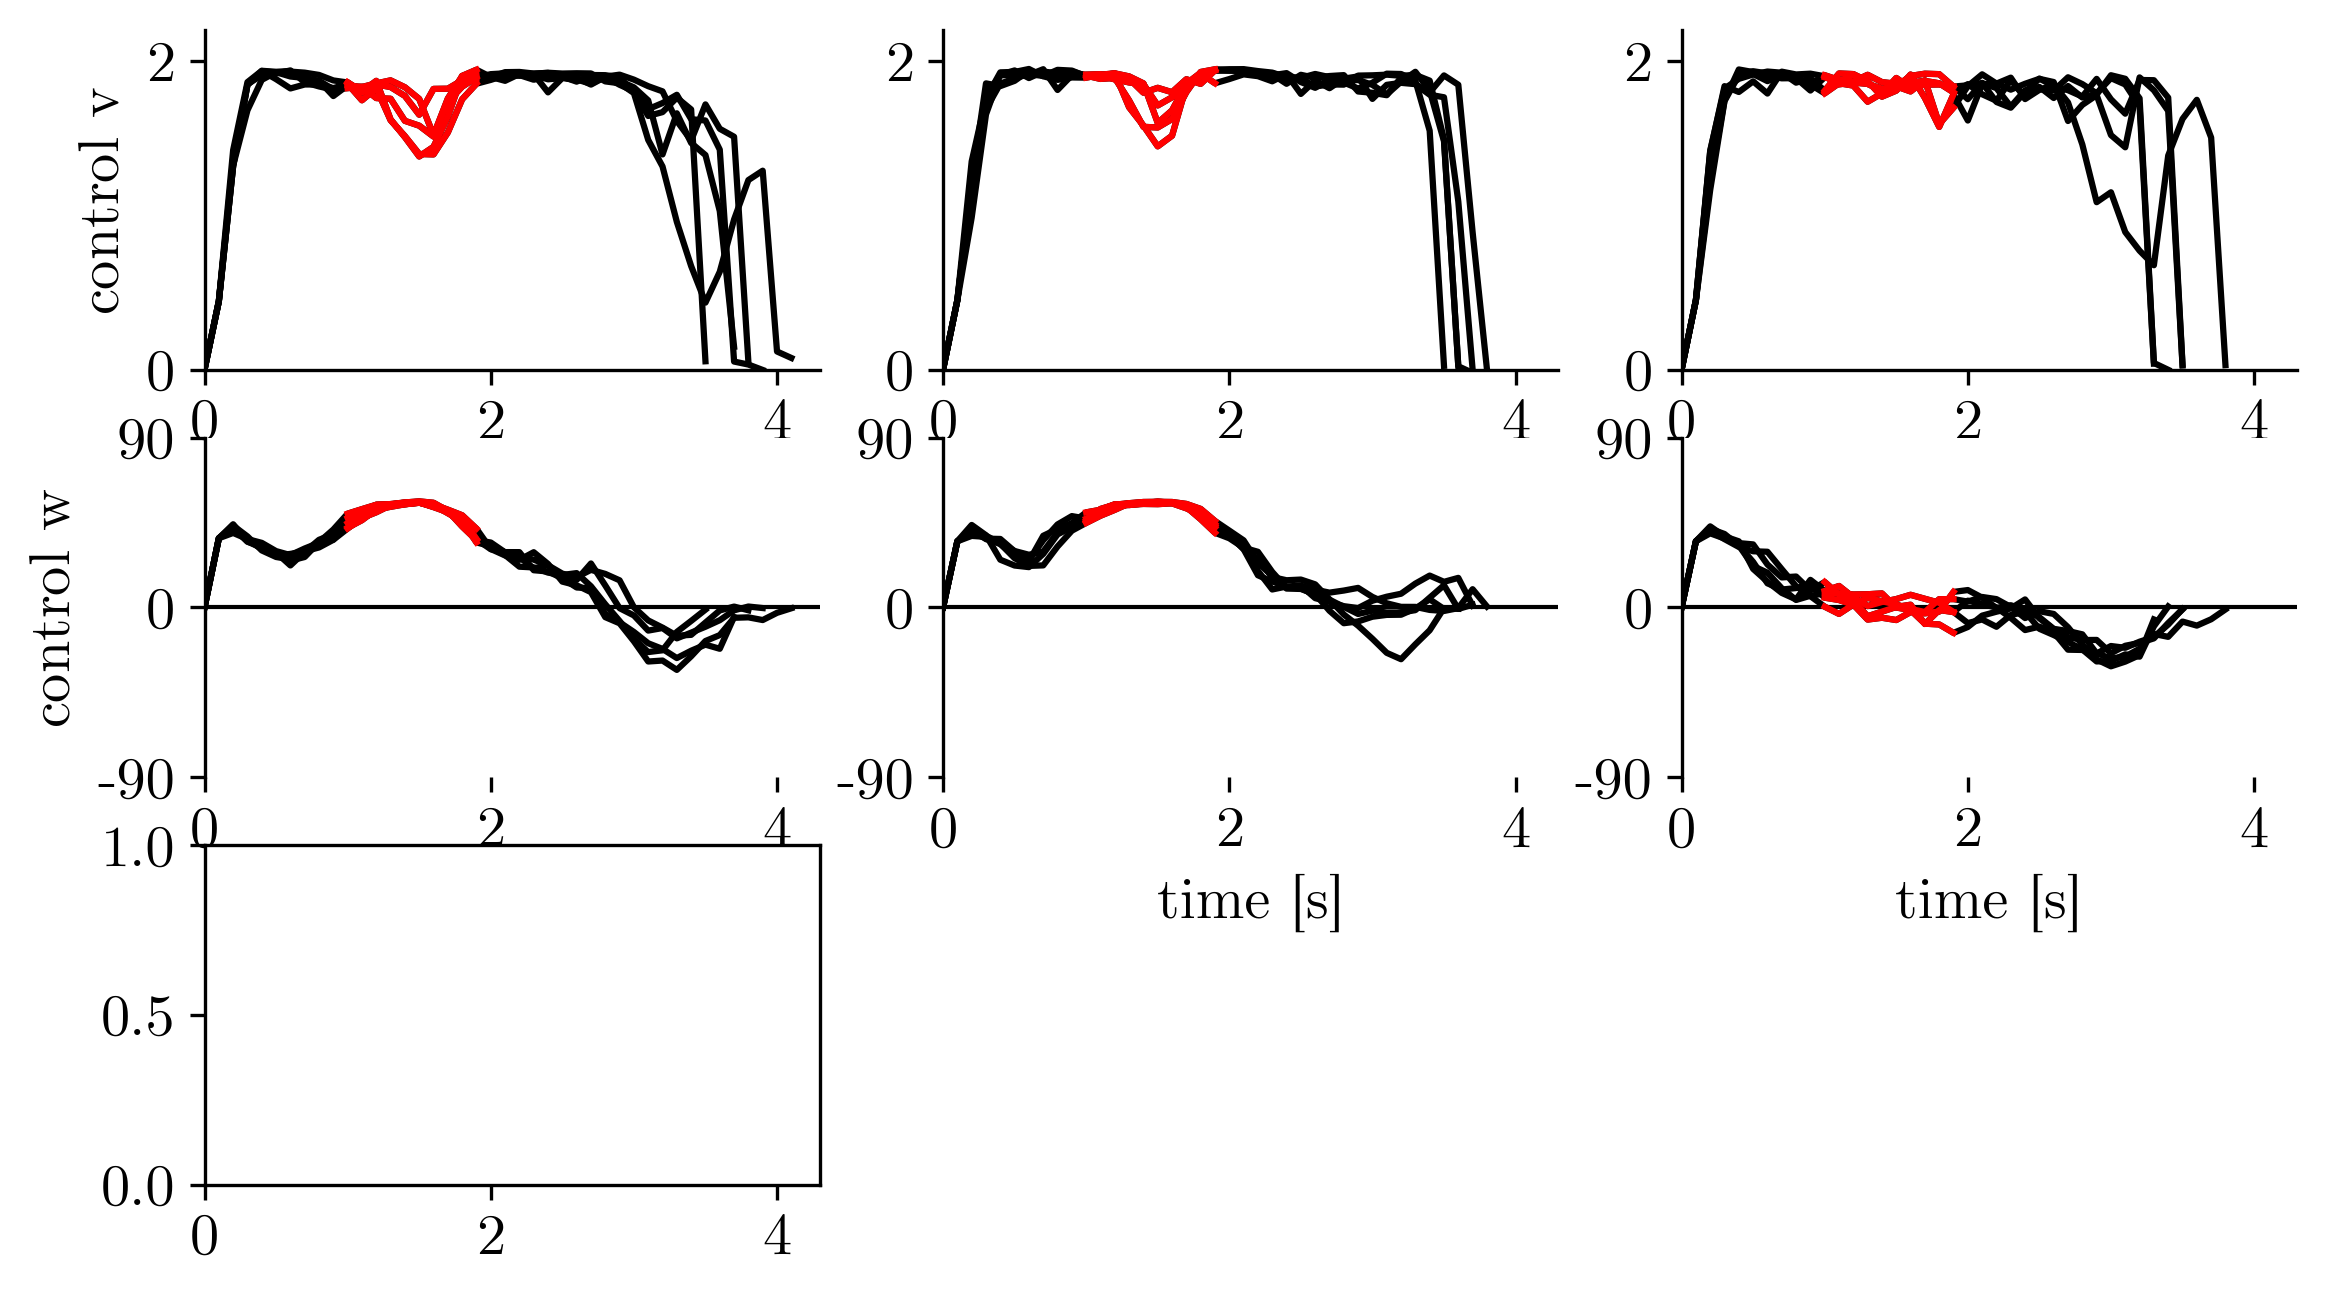

In [28]:

# v and w and cost all together
labels=[r'$v$',r'$w$']
num_trials=len(actions1)
with initiate_plot(9,5, 300) as fig, warnings.catch_warnings():
    # low cost
    ax= fig.add_subplot(331)
    ax.set_ylabel(r'control $v$')
    quickspine(ax)
    # ax.spines['bottom'].set_visible(False)
    plt.xlim(0,mintime/10)
    plt.ylim(0,1)
    plt.yticks([0,1])
    ax.set_yticklabels([0,2])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][:,0])/10,0.1),actions1[trial_i][:,0],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][pertstart:pertstart+10,0])/10,0.1)+pertstart/10,actions1[trial_i][pertstart:pertstart+10,0],color='r', label=labels[0])

    ax= fig.add_subplot(332, sharey=ax)
    # ax.set_ylabel(r'control $v$')
    quickspine(ax)
    # ax.spines['bottom'].set_visible(False)
    plt.xlim(0,mintime/10)
    plt.ylim(0,1.1)
    plt.yticks([0,1])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][:,0])/10,0.1),actions2[trial_i][:,0],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][pertstart:pertstart+10,0])/10,0.1)+pertstart/10,actions2[trial_i][pertstart:pertstart+10,0],color='r', label=labels[0])
   
    ax= fig.add_subplot(333, sharey=ax)
    # ax.set_ylabel(r'control $v$')
    quickspine(ax)
    # ax.spines['bottom'].set_visible(False)
    plt.xlim(0,mintime/10)
    plt.ylim(0,1.1)
    plt.yticks([0,1])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][:,0])/10,0.1),actions3[trial_i][:,0],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][pertstart:pertstart+10,0])/10,0.1)+pertstart/10,actions3[trial_i][pertstart:pertstart+10,0],color='r', label=labels[0])

    ax= fig.add_subplot(334)
    ax.set_ylabel(r'control $w$')
    ax.set_xlabel('time [s]')
    quickspine(ax)
    ax.spines['bottom'].set_visible(False)
    plt.plot([0,mintime/10],[0,0],'k', linewidth=1)
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][:,0])/10,0.1),actions1[trial_i][:,1],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions1[trial_i][pertstart:pertstart+10,1])/10,0.1)+pertstart/10,actions1[trial_i][pertstart:pertstart+10,1],color='r', label=labels[0])
    plt.xlim(0,mintime/10)
    plt.ylim(-pi/2,0,pi/2)
    plt.yticks([-pi/2,0,pi/2])
    ax.set_yticklabels([-90,0,90])

    ax= fig.add_subplot(335, sharey=ax)
    # ax.set_ylabel(r'control $w$')
    ax.set_xlabel('time [s]')
    quickspine(ax)
    ax.spines['bottom'].set_visible(False)
    plt.plot([0,mintime/10],[0,0],'k', linewidth=1)
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][:,1])/10,0.1),actions2[trial_i][:,1],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions2[trial_i][pertstart:pertstart+10,1])/10,0.1)+pertstart/10,actions2[trial_i][pertstart:pertstart+10,1],color='r', label=labels[0])
    plt.xlim(0,mintime/10)

    ax= fig.add_subplot(336, sharey=ax)
    # ax.set_ylabel(r'control $w$')
    ax.set_xlabel('time [s]')
    quickspine(ax)
    ax.spines['bottom'].set_visible(False)
    plt.plot([0,mintime/10],[0,0],'k', linewidth=1)
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][:,0])/10,0.1),actions3[trial_i][:,1],color='k', label=labels[0])
    for trial_i in range(num_trials):
        ax.plot(np.arange(0,len(actions3[trial_i][pertstart:pertstart+10,1])/10,0.1)+pertstart/10,actions3[trial_i][pertstart:pertstart+10,1],color='r', label=labels[0])
    plt.xlim(0,mintime/10)


    ax=fig.add_subplot(337, sharex=ax)
    costs,costsmu,costserr= calculate_cost(actions1,mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1)[pertstart:pertstart+10], costsmu[pertstart:pertstart+10], yerr=costserr[pertstart:pertstart+10],color='r')
    quickspine(ax)
    ax.set_ylabel('objective cost')
    ax.set_xlabel('time [s]')
    ax.set_ylim(0,0.03)
    plt.title('cost during pert: {:.2f}'.format(sum(costsmu[pertstart:pertstart+10])))

    ax=fig.add_subplot(338, sharey=ax, sharex=ax)
    costs,costsmu,costserr= calculate_cost(actions2,mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1)[pertstart:pertstart+10], costsmu[pertstart:pertstart+10], yerr=costserr[pertstart:pertstart+10],color='r')
    quickspine(ax)
    ax.set_xlabel('time [s]')

    plt.title('cost during pert: {:.2f}'.format(sum(costsmu[pertstart:pertstart+10])))
    # plt.title('cost during pert: {:.2f}'.format(sum(costsmu[pertstart:pertstart+10]))+'\n cost after pert: {:.2f}'.format(sum(costsmu[pertstart:]))+'\n total cost: {:.2f}'.format(sum(costsmu)))
    # plt.title('cost during pert: {:.2f}'.format(sum(costsmu[pertstart:pertstart+10]))+'\n cost after pert: {:.2f}'.format(sum(costsmu[pertstart:])))    # plt.title(sum(costsmu))

    ax=fig.add_subplot(339, sharey=ax, sharex=ax)
    costs,costsmu,costserr= calculate_cost(actions3,mintime)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr,color='k')
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1)[pertstart:pertstart+10], costsmu[pertstart:pertstart+10], yerr=costserr[pertstart:pertstart+10],color='r')
    quickspine(ax)
    ax.set_xlabel('time [s]')
    plt.title('cost during pert: {:.2f}'.format(sum(costsmu[pertstart:pertstart+10])))

    plt.tight_layout()

# quicksave('3 case cost vs adjustment ctrl and cost 2', fig=ax.get_figure())



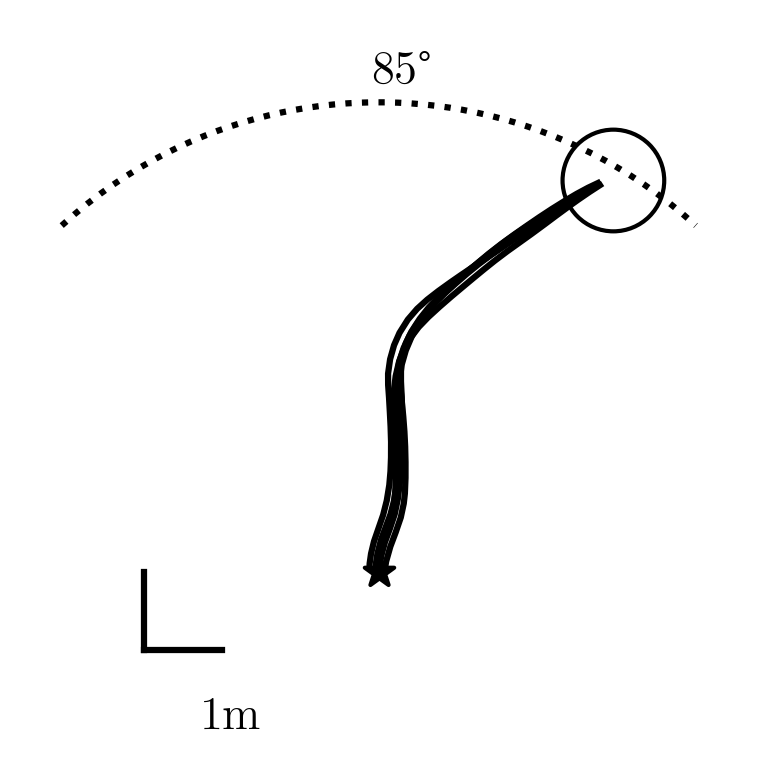

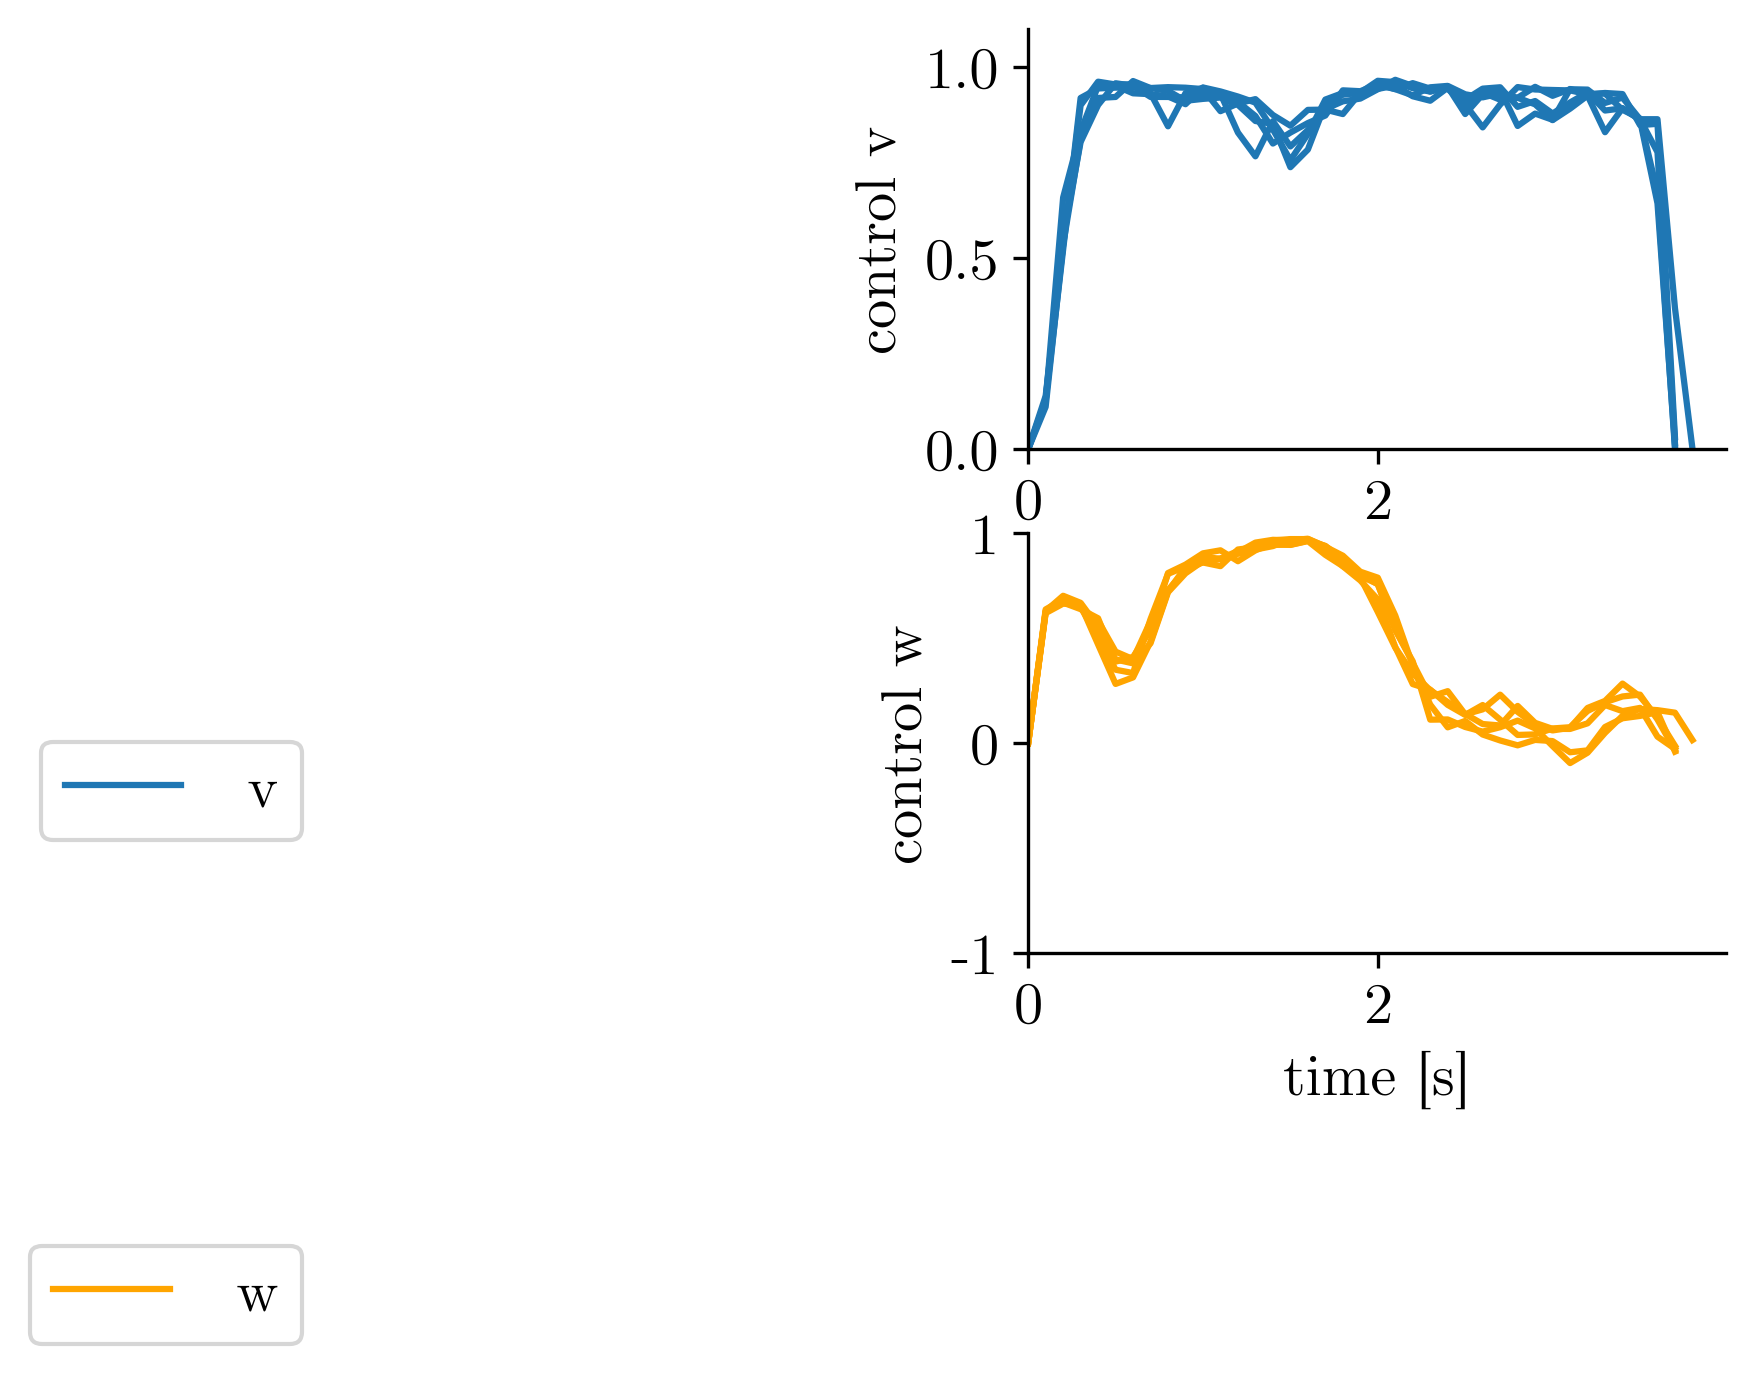

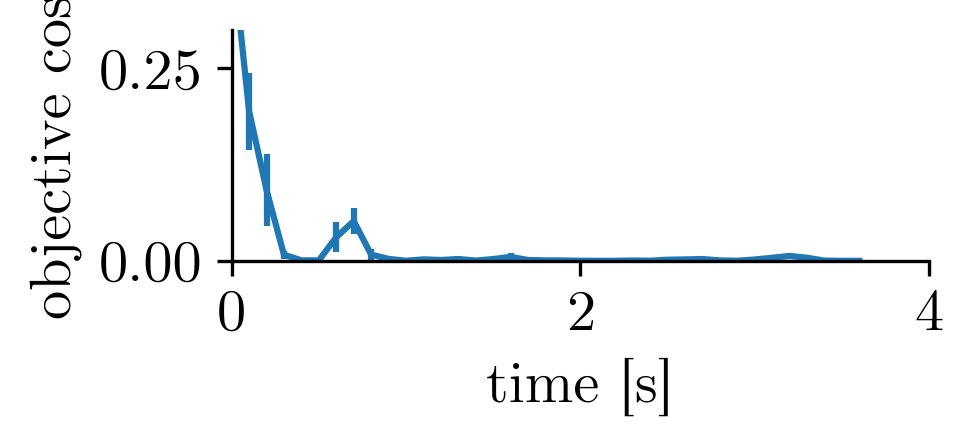

In [29]:
# high cost
theta=torch.tensor([[1],   
                        [pi/2],   
                        [0.2],   
                        [0.2],   
                        [0.0],   
                        [0.0],   
                        [0.13],   
                        [0.9],   
                        [0.9],   
                        [0.5],   
                        [0.5]])
states,actions, beliefs, covs=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs,return_belief=True)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
# quickoverhead_state(states, np.array([thetask]*2), color='b')
# ax=quickoverhead_state(beliefs, np.array([thetask]*2), color='r')
with initiate_plot(3,3, 300) as fig:
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    for s in beliefs:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    # quickleg(ax)
    quickallspine(ax)
    # quicksave('model high cost overhead')
# quicksave('high cost adjustment overhead', fig=ax.get_figure())
ax,_=plotctrlasd(actions)
ax.set_xlim(0,4)
quicksave('high cost adjustment control',fig=ax.get_figure())
# ax,_=plotctrlasd([given_obs[:29]])
# quicksave('biased observation',fig=ax.get_figure())
costs=[np.sum( (np.power(relu(np.diff(np.array(a), axis=0)),2)), axis=1) for a in actions]
minlen=min([len(a) for a in costs])
costsmu=[np.mean([a[t] for a in costs]) for t in range(minlen)]
costserr=[np.std([a[t] for a in costs]) for t in range(minlen)]
with initiate_plot(3,1,300) as fig:
    ax=fig.add_subplot(111)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr)
    quickspine(ax)
    ax.set_ylabel('objective cost')
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,None)
    ax.set_ylim(0,0.3)
    ax.set_xlim(0,4)
    # quicksave('high cost adjustment cost')


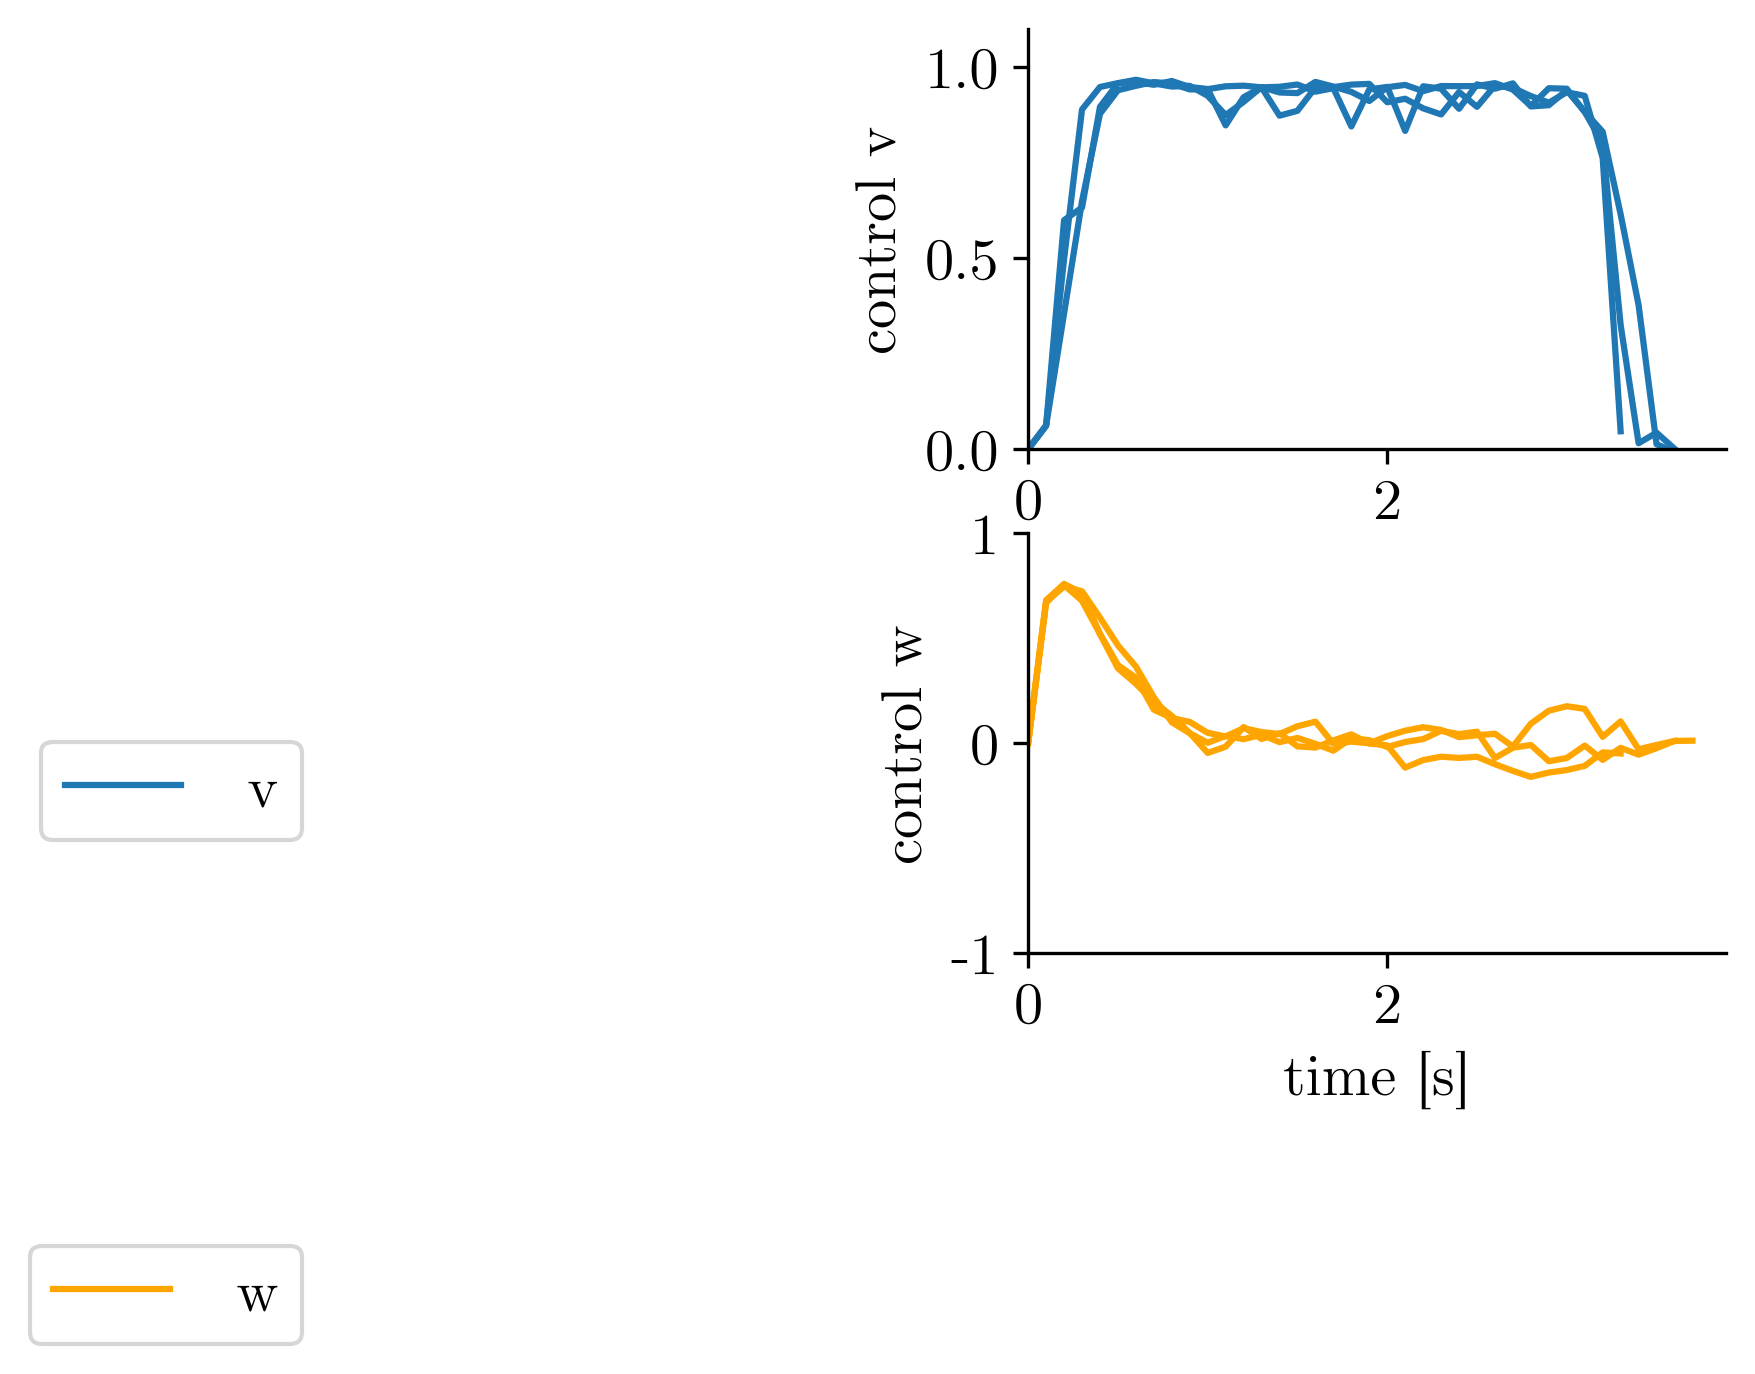

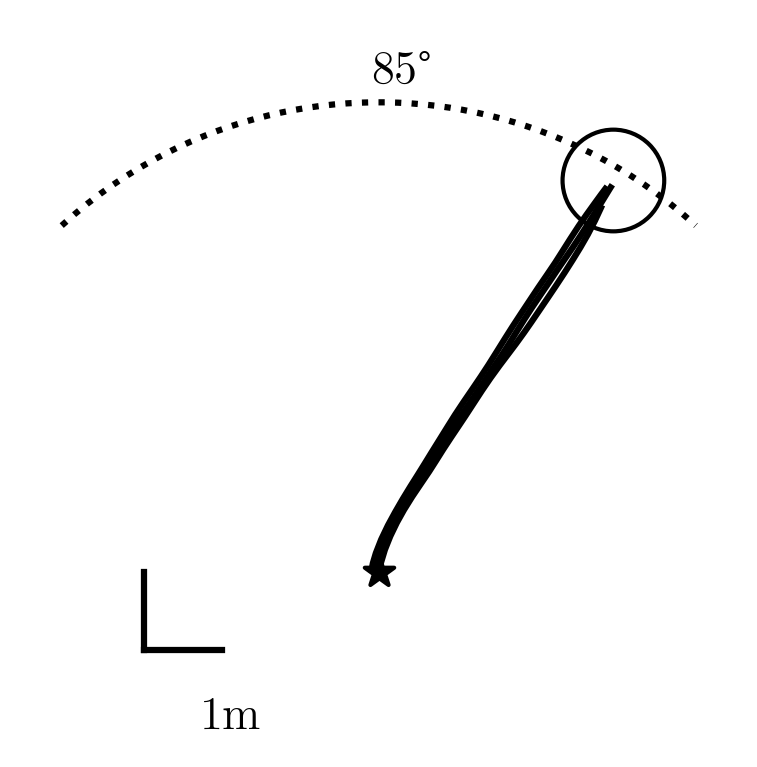

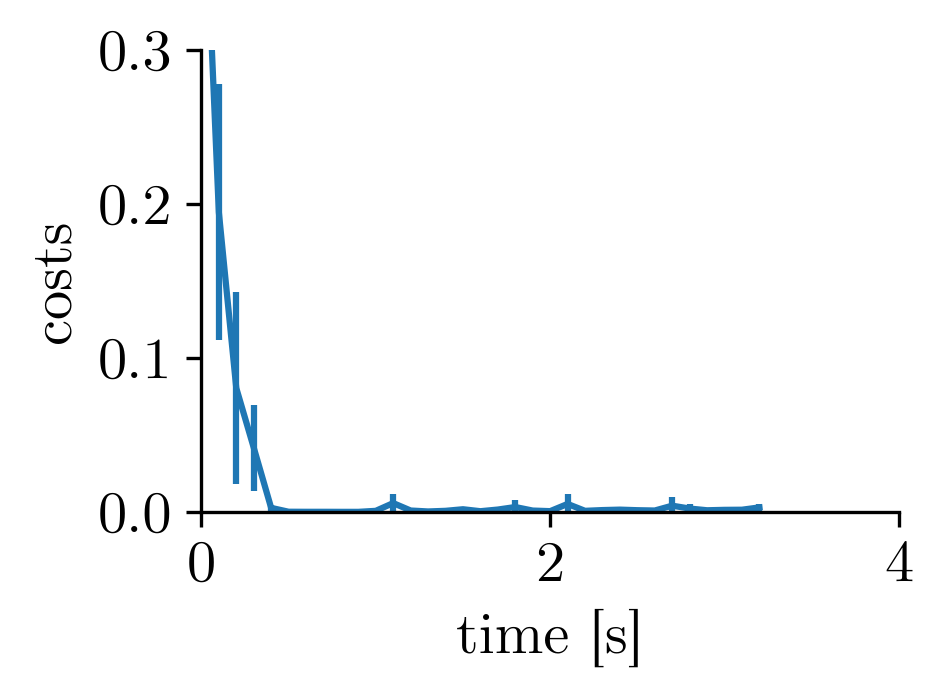

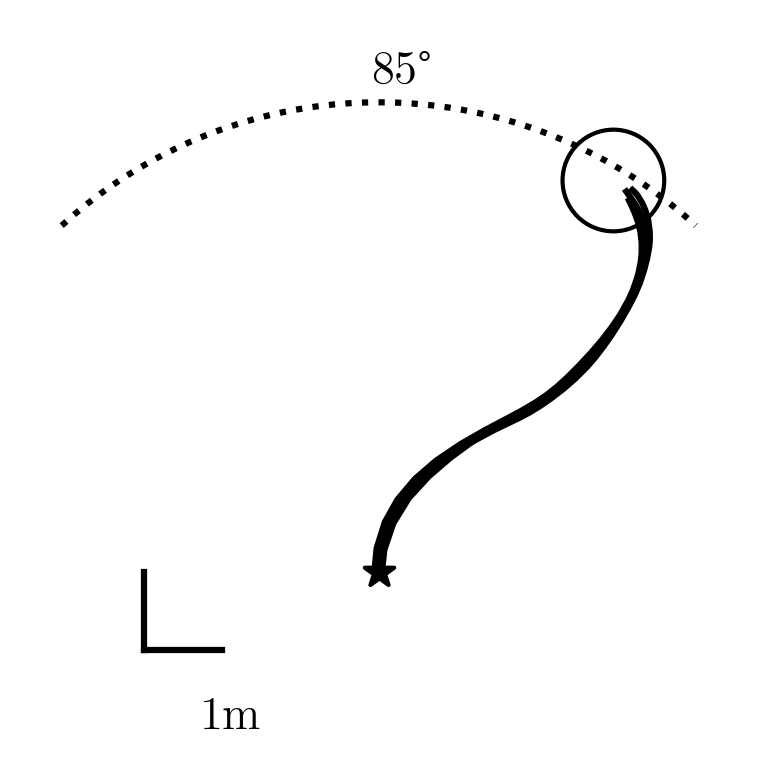

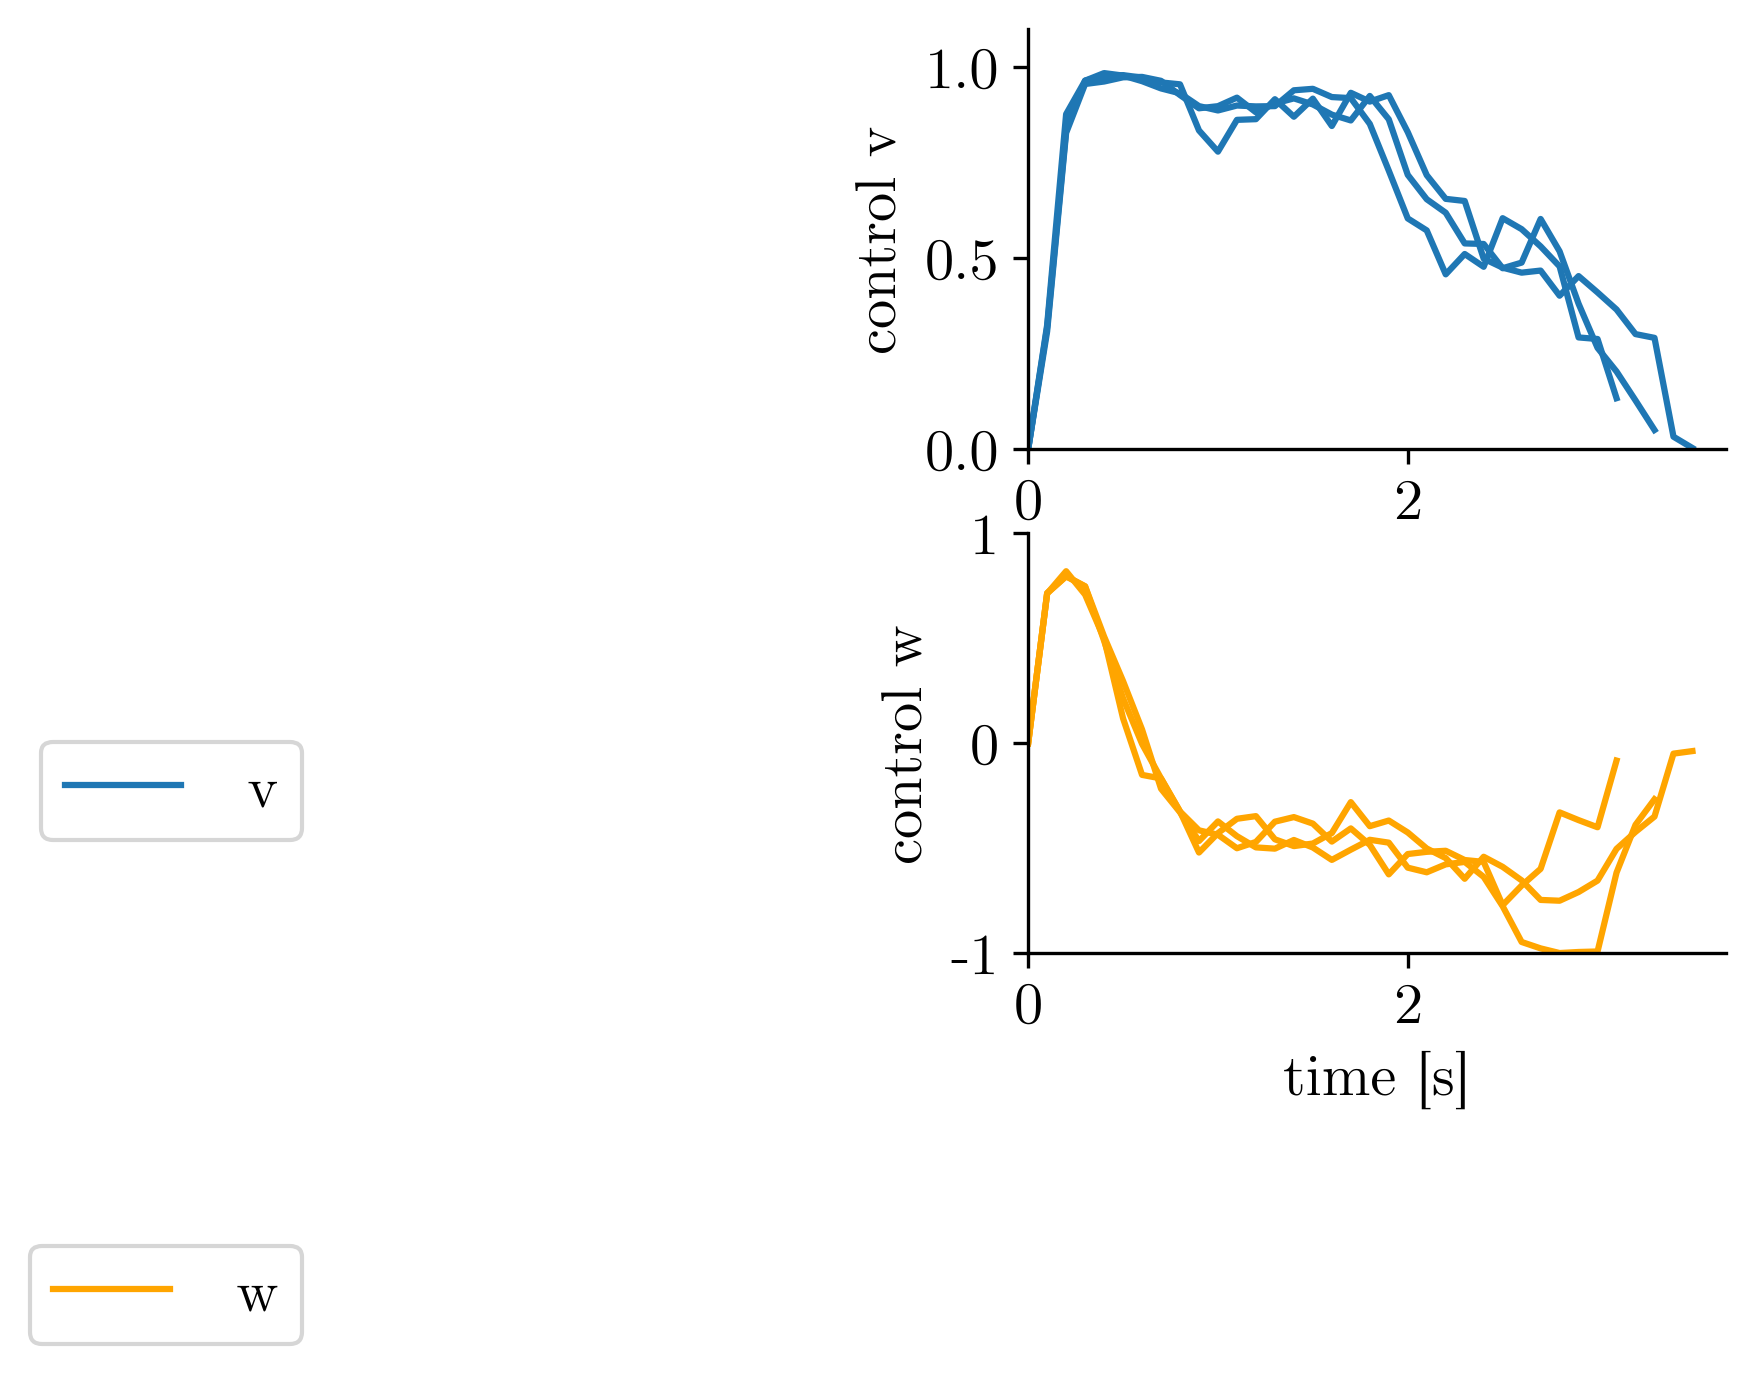

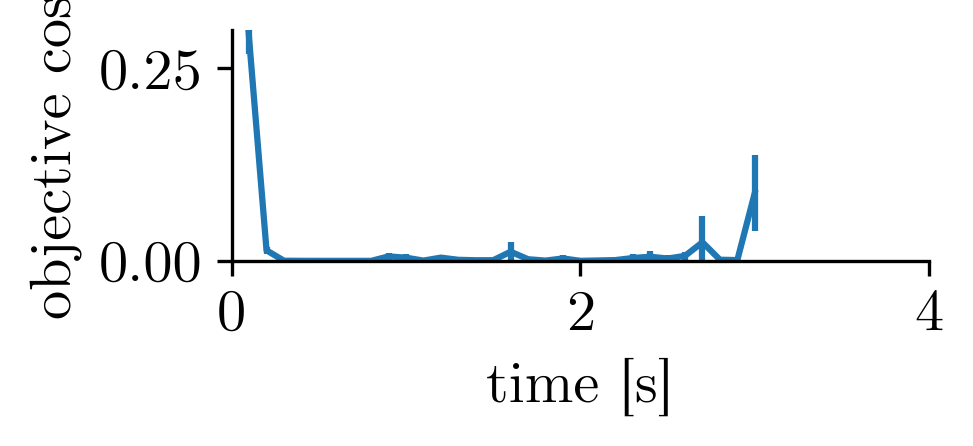

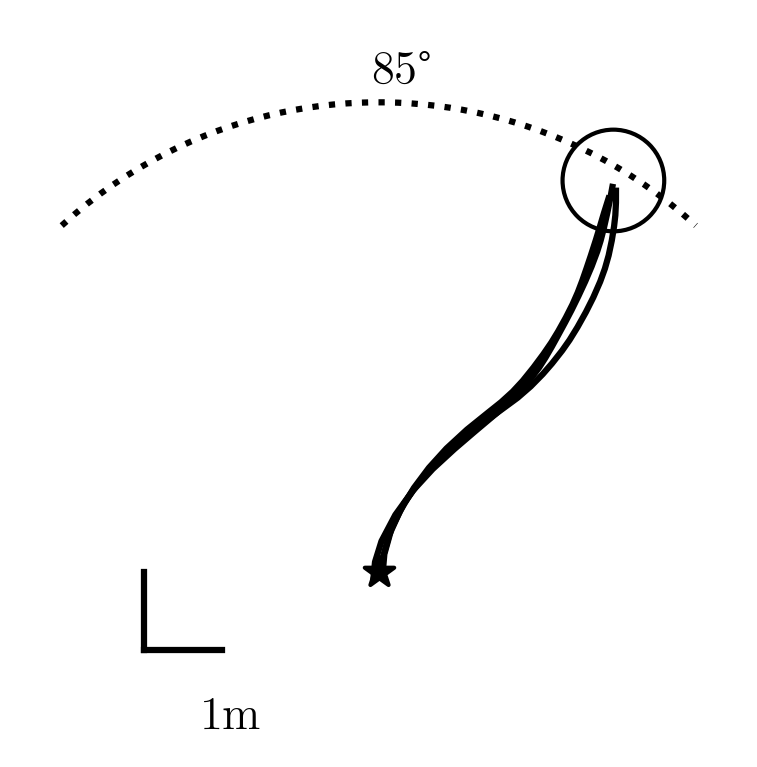

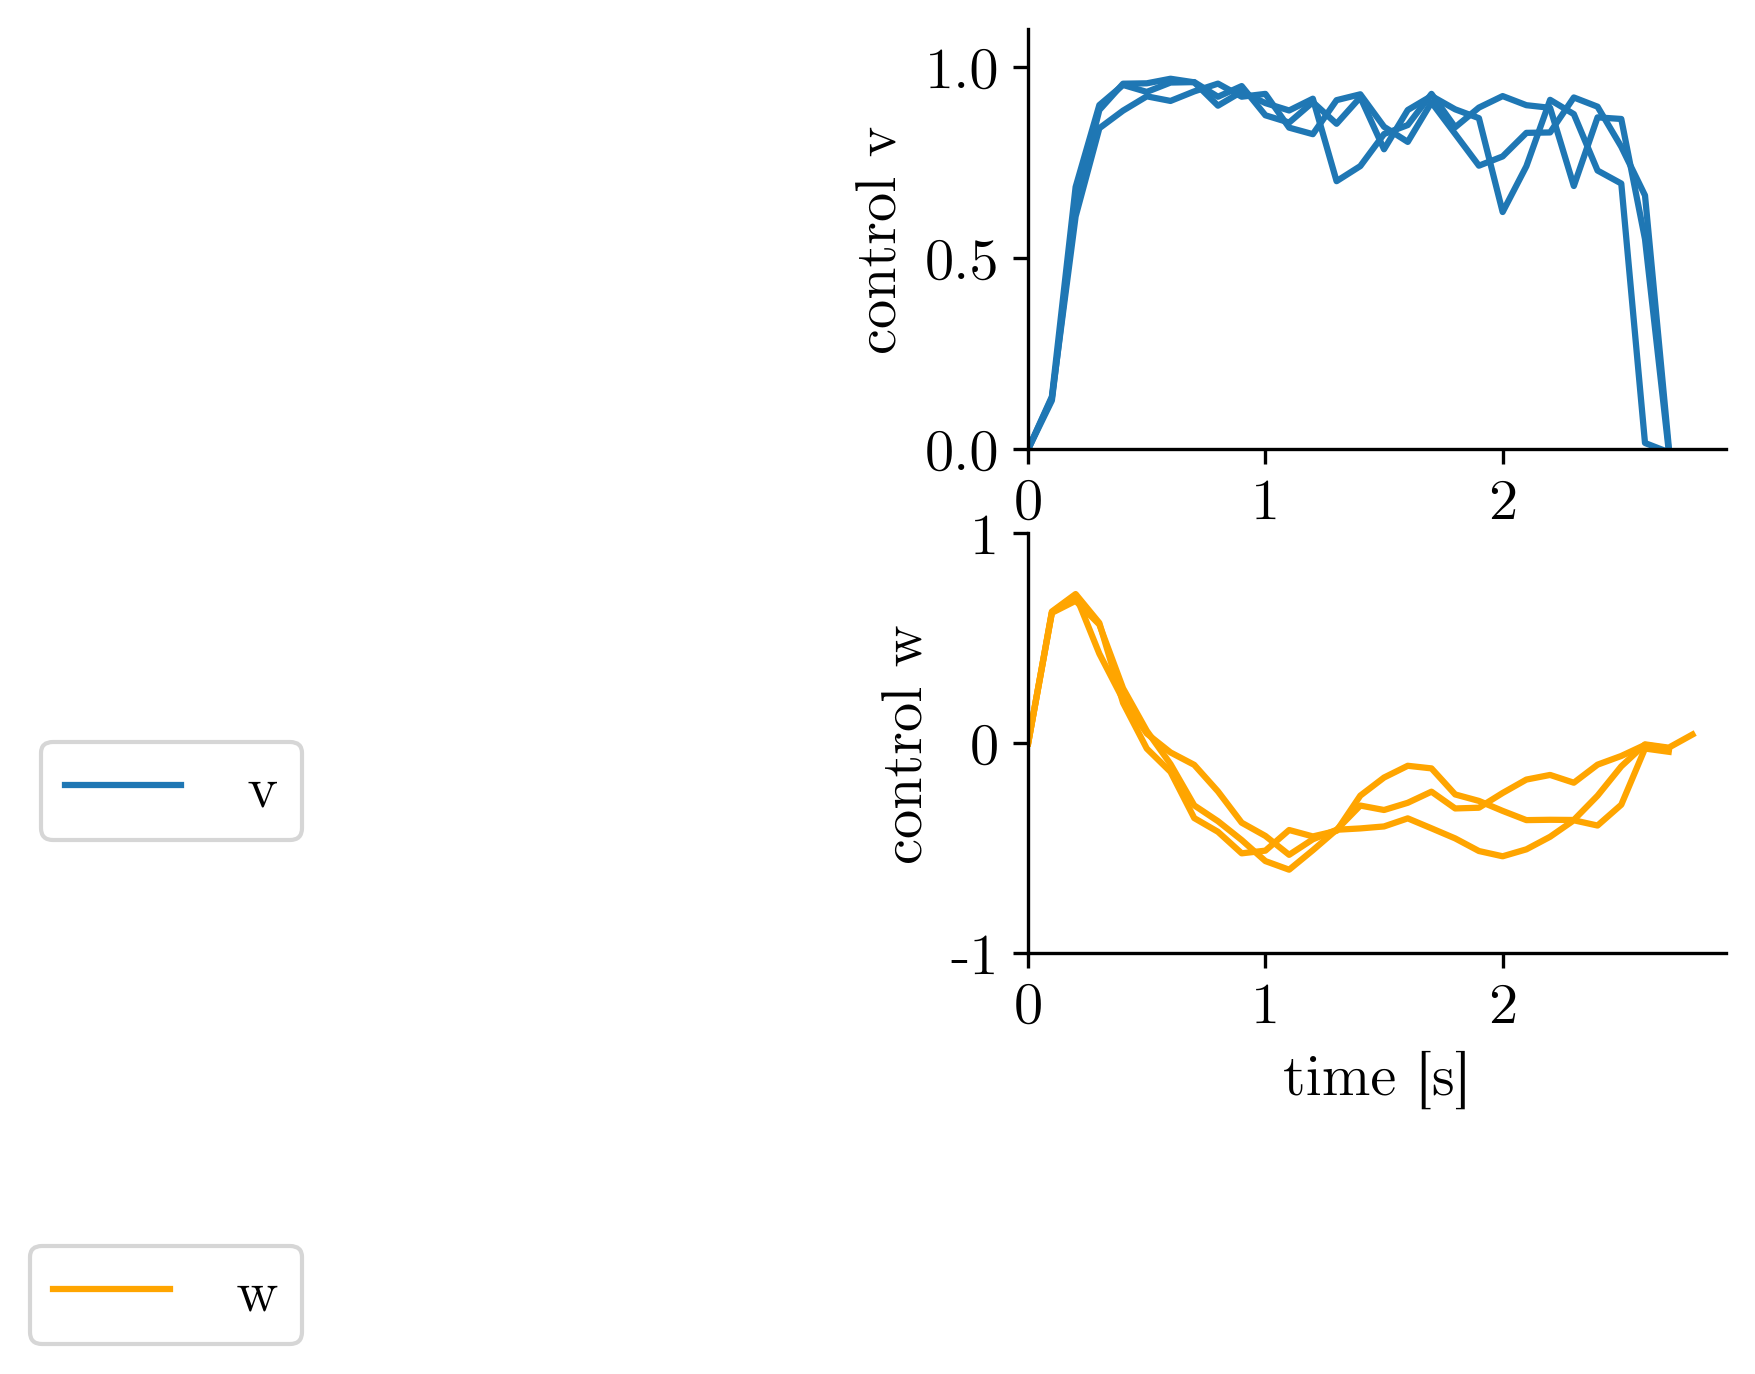

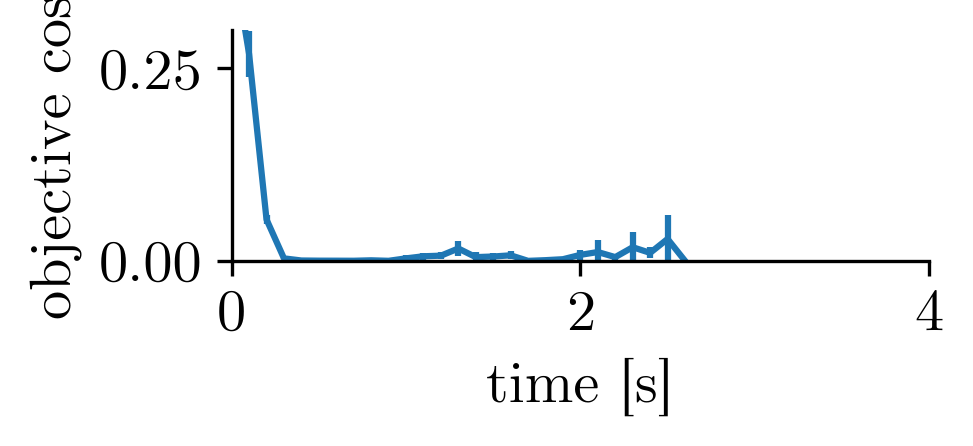

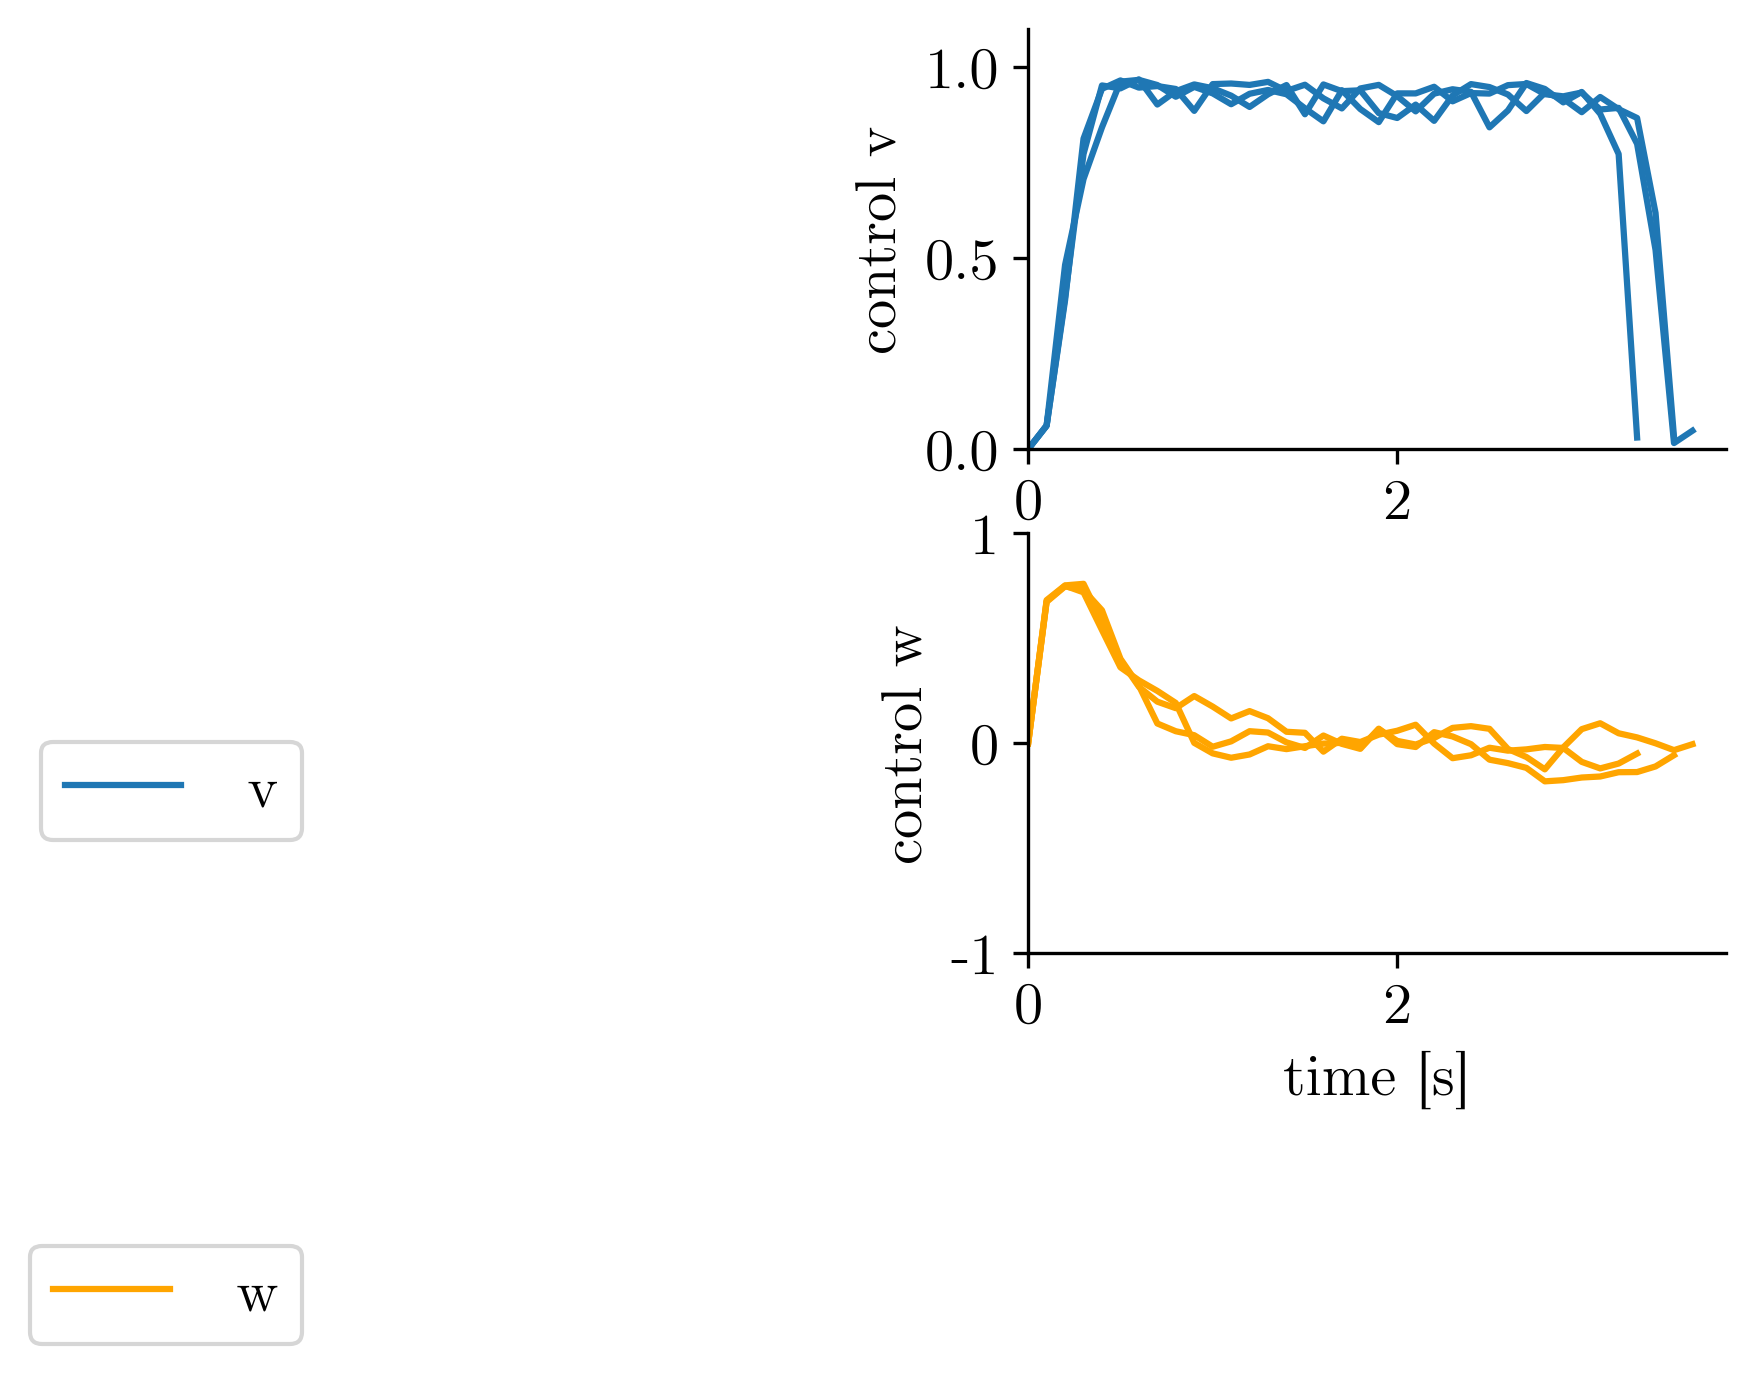

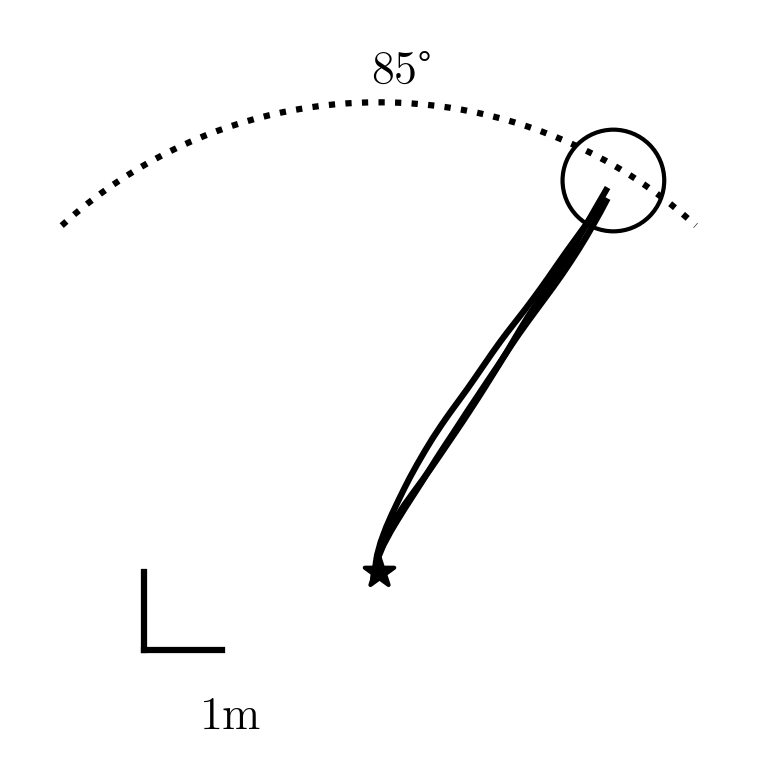

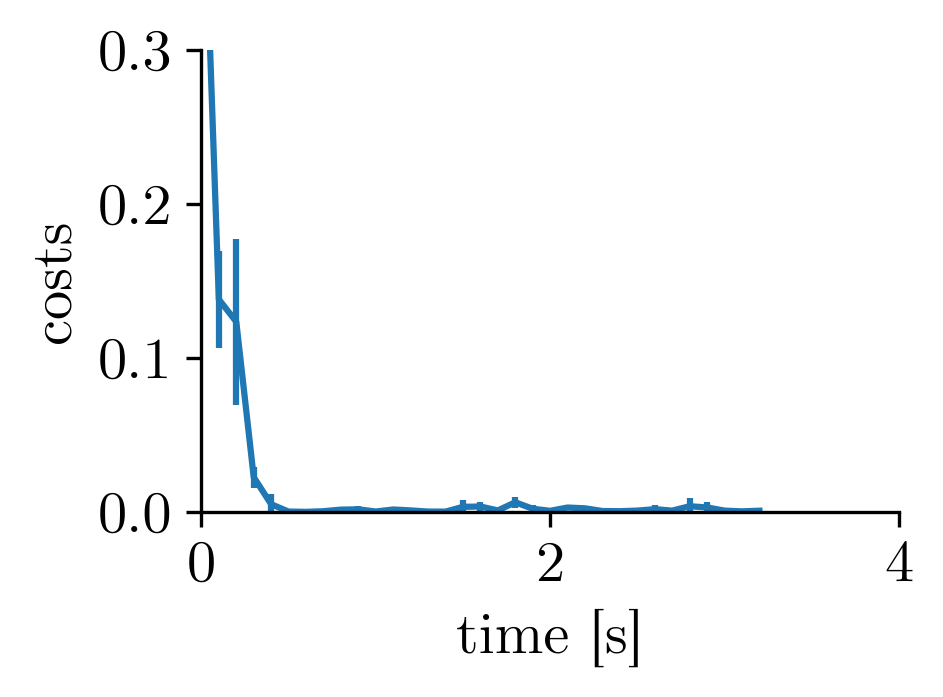

<Figure size 1200x600 with 0 Axes>

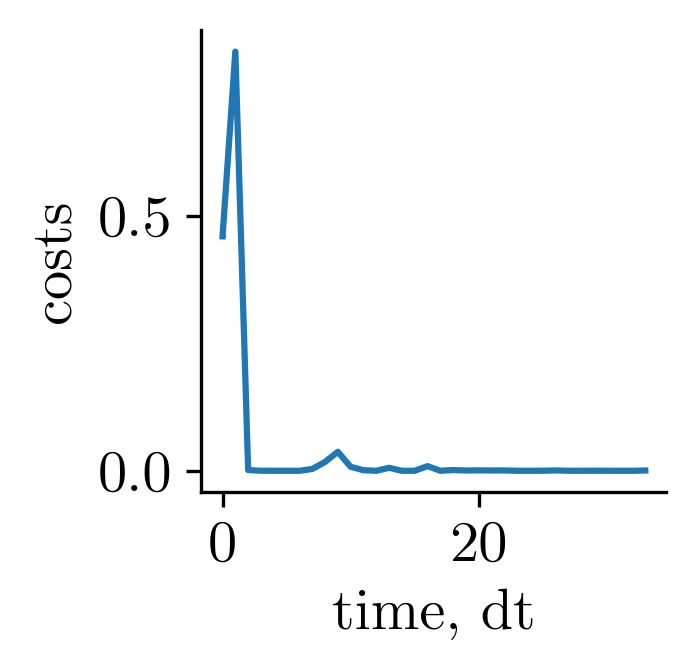

AxisError: axis 1 is out of bounds for array of dimension 1

In [30]:

# no adjustment
ntrial=3
theta=torch.tensor([[1],   
                        [pi/2],   
                        [0.001],   
                        [0.001],   
                        [0.9],   
                        [0.9],   
                        [0.13],   
                        [0.9],   
                        [0.9],   
                        [0.5],   
                        [0.5]])
states,actions, beliefs, covs=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,pert=None,given_obs=None,return_belief=True)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
# ax=quickoverhead_state(states, np.array([thetask]*2), color='r')
# quicksave('no adjust adjustment overhead', fig=ax.get_figure()
ax,_=plotctrlasd(actions)
ax.set_xlim(0,4)
quicksave('no adjustment control',fig=ax.get_figure())
with initiate_plot(3,3, 300) as fig:
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    for s in beliefs:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    # quickleg(ax)
    quickallspine(ax)
    # quicksave('model no adjustment overhead')
costs=[np.sum( (np.power(relu(np.diff(np.array(a), axis=0)),2)), axis=1) for a in actions]
minlen=min([len(a) for a in costs])
costsmu=[np.mean([a[t] for a in costs]) for t in range(minlen)]
costserr=[np.std([a[t] for a in costs]) for t in range(minlen)]
with initiate_plot(3,2,300) as fig:
    ax=fig.add_subplot(111)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr)
    quickspine(ax)
    ax.set_ylabel('costs')
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,None)
    ax.set_ylim(0,0.3)
    ax.set_xlim(0,4)
    quicksave('no adjustment cost')




# --------------------------------
# low cost
theta=torch.tensor([[1],   
                        [pi/2],   
                        [0.2],   
                        [0.2],   
                        [0.0],   
                        [0.0],   
                        [0.13],   
                        [0.1],   
                        [0.1],   
                        [0.5],   
                        [0.5]])

given_obs=torch.vstack([torch.ones(size=(9,2))*0.9,0.1*torch.ones(size=(95,2))])
# given_obs[:,1]=0
states,actions, beliefs, covs=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs,return_belief=True)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
with initiate_plot(3,3, 300) as fig:
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    for s in beliefs:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    # quickleg(ax)
    quickallspine(ax)
    # quicksave('model low cost overhead')
# quicksave('low cost adjustment overhead', fig=ax.get_figure())
ax,_=plotctrlasd(actions)
ax.set_xlim(0,4)
quicksave('low cost adjustment control',fig=ax.get_figure())
costs=[np.sum( (np.power(relu(np.diff(np.array(a), axis=0)),2)), axis=1) for a in actions]
minlen=min([len(a) for a in costs])
costsmu=[np.mean([a[t] for a in costs]) for t in range(minlen)]
costserr=[np.std([a[t] for a in costs]) for t in range(minlen)]
with initiate_plot(3,1,300) as fig:
    ax=fig.add_subplot(111)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr)
    quickspine(ax)
    ax.set_ylabel('objective cost')
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,None)
    ax.set_ylim(0,0.3)
    ax.set_xlim(0,4)
    quicksave('low cost adjustment cost')

    

# high cost
theta=torch.tensor([[1],   
                        [pi/2],   
                        [0.2],   
                        [0.2],   
                        [0.0],   
                        [0.0],   
                        [0.13],   
                        [0.9],   
                        [0.9],   
                        [0.5],   
                        [0.5]])
given_obs=torch.vstack([torch.ones(size=(9,2))*0.9,0.1*torch.ones(size=(95,2))])
# given_obs[:,1]=0
states,actions, beliefs, covs=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs,return_belief=True)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
# quickoverhead_state(states, np.array([thetask]*2), color='b')
# ax=quickoverhead_state(beliefs, np.array([thetask]*2), color='r')
with initiate_plot(3,3, 300) as fig:
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    for s in beliefs:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    # quickleg(ax)
    quickallspine(ax)
    # quicksave('model high cost overhead')
# quicksave('high cost adjustment overhead', fig=ax.get_figure())
ax,_=plotctrlasd(actions)
ax.set_xlim(0,4)
quicksave('high cost adjustment control',fig=ax.get_figure())
# ax,_=plotctrlasd([given_obs[:29]])
# quicksave('biased observation',fig=ax.get_figure())
costs=[np.sum( (np.power(relu(np.diff(np.array(a), axis=0)),2)), axis=1) for a in actions]
minlen=min([len(a) for a in costs])
costsmu=[np.mean([a[t] for a in costs]) for t in range(minlen)]
costserr=[np.std([a[t] for a in costs]) for t in range(minlen)]
with initiate_plot(3,1,300) as fig:
    ax=fig.add_subplot(111)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr)
    quickspine(ax)
    ax.set_ylabel('objective cost')
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,None)
    ax.set_ylim(0,0.3)
    ax.set_xlim(0,4)
    quicksave('high cost adjustment cost')


# no adjustment
ntrial=3
theta=torch.tensor([[1],   
                        [pi/2],   
                        [0.001],   
                        [0.001],   
                        [0.9],   
                        [0.9],   
                        [0.13],   
                        [0.9],   
                        [0.9],   
                        [0.5],   
                        [0.5]])
states,actions, beliefs, covs=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,pert=None,given_obs=None,return_belief=True)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
# ax=quickoverhead_state(states, np.array([thetask]*2), color='r')
# quicksave('no adjust adjustment overhead', fig=ax.get_figure()
ax,_=plotctrlasd(actions)
ax.set_xlim(0,4)
quicksave('no adjustment control',fig=ax.get_figure())
with initiate_plot(3,3, 300) as fig:
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.axes.xaxis.set_ticks([]); ax.axes.yaxis.set_ticks([])
    # ax.set_xlim([-235, 235]); ax.set_ylim([-2, 430])
    xrange=np.cos(pi/180*(90-42.5))*600
    x_temp = np.linspace(-xrange, xrange)
    ax.plot(x_temp, np.sqrt(600**2 - x_temp**2), c='k', ls=':')
    ax.text(-10, 625, s=r'$85\degree$', fontsize=fontsize)
    ax.plot(np.linspace(-300, -200), np.linspace(-100, -100), c='k') # 100 is cm
    ax.plot(np.linspace(-300, -300), np.linspace(-100, 0), c='k')
    ax.text(-230, -200, s=r'$1 m$', fontsize=fontsize)
    ax.scatter(0,0, marker='*', color='black', s=55) 

    for s in beliefs:
        ax.plot(s[:,1]*200, s[:,0]*200, color='black')
    plot_circle(np.eye(2)*65,[thetask[1]*200,thetask[0]*200],ax=ax,edgecolor='k')
    ax.axis('equal')
    # quickleg(ax)
    quickallspine(ax)
    # quicksave('model no adjustment overhead')
costs=[np.sum( (np.power(relu(np.diff(np.array(a), axis=0)),2)), axis=1) for a in actions]
minlen=min([len(a) for a in costs])
costsmu=[np.mean([a[t] for a in costs]) for t in range(minlen)]
costserr=[np.std([a[t] for a in costs]) for t in range(minlen)]
with initiate_plot(3,2,300) as fig:
    ax=fig.add_subplot(111)
    ax.errorbar(np.arange(0,len(costsmu)/10,0.1), costsmu, yerr=costserr)
    quickspine(ax)
    ax.set_ylabel('costs')
    ax.set_xlabel('time [s]')
    ax.set_xlim(0,None)
    ax.set_ylim(0,0.3)
    ax.set_xlim(0,4)
    quicksave('no adjustment cost')


# quicksave('no adjust adjustment overhead', fig=ax.get_figure())
pert=torch.vstack([torch.ones(size=(9,2))*0.9,0.1*torch.ones(size=(95,2))])
states,actions, beliefs, covs=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,pert=pert,given_obs=None,return_belief=True,given_action=actions[0])
ax=quickoverhead_state(beliefs, np.array([thetask]*2), color='r',ax=ax)
ax.get_figure()
# quicksave('no adjust adjustment overhead', fig=ax.get_figure())

# quicksave('no adjust control', fig=ax.get_figure())





costs=[np.sum( (np.power(relu(np.diff(np.array(a), axis=0)),2)), axis=1) for a in actions]
minlen=min([len(a) for a in costs])
costsmu=[np.mean([a[t] for a in costs]) for t in range(minlen)]
costserr=[np.std([a[t] for a in costs]) for t in range(minlen)]
with initiate_plot(2,2,300) as fig:
    ax=fig.add_subplot(111)
    ax.errorbar(np.arange(len(costsmu)), costsmu, yerr=costserr)
    quickspine(ax)
    ax.set_xlabel('time, dt')
    ax.set_ylabel('costs')
    # ax.fill_between(np.arange(len(costsmu)), np.array(costsmu)-np.array(costserr),np.array(costsmu)+np.array(costserr))






 
np.sum(np.sum( (np.power( relu(np.diff(np.array(a), axis=0)),2)), axis=1))


given_obs=torch.vstack([torch.ones(size=(0,2)),torch.zeros(size=(95,2))])
given_obs[:,1]=0
states,actions=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
quickoverhead_state(states, np.array([thetask]*2))
plotctrlasd(actions)

given_obs=torch.vstack([torch.ones(size=(10,2)),torch.zeros(size=(95,2))])
given_obs[:,1]=0
states,actions=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs)
mintime=min([len(s) for s in states])+9
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
quickoverhead_state(states, np.array([thetask]*2))
plotctrlasd(actions)


given_obs=torch.vstack([torch.ones(size=(20,2)),torch.zeros(size=(95,2))])
given_obs[:,1]=0
states,actions=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
quickoverhead_state(states, np.array([thetask]*2))
plotctrlasd(actions)

given_obs=torch.vstack([torch.ones(size=(25,2))*2,torch.zeros(size=(95,2))])
given_obs[:,1]=0
states,actions=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs)
mintime=min([len(s) for s in states])+5
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
quickoverhead_state(states, np.array([thetask]*2))
plotctrlasd(actions)




theta=torch.tensor([[1-0.2],   
                    [pi/2-0.3],   
                    [0.9],   
                    [0.9],   
                    [0.1],   
                    [0.1],   
                    [0.13],   
                    [1.5],   
                    [1.5],   
                    [0.5],   
                    [0.5]])

given_obs=torch.vstack([torch.ones(size=(10,2))*2,torch.zeros(size=(95,2))])
given_obs[:,1]=0
states,actions=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs)
mintime=min([len(s) for s in states])+9
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
quickoverhead_state(states, np.array([thetask]*2))
plotctrlasd(actions)


theta=torch.tensor([[1],   
                    [pi/2],   
                    [0.1],   
                    [0.1],   
                    [0.9],   
                    [0.9],   
                    [0.13],   
                    [0.1],   
                    [0.1],   
                    [0.5],   
                    [0.5]])

given_obs=torch.vstack([torch.ones(size=(6,2))*2,torch.zeros(size=(95,2))])
given_obs[:,1]=0
states,actions=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs,action_noise=0.)
mintime=min([len(s) for s in states])+9
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
quickoverhead_state(states, np.array([thetask]*2))
plotctrlasd(actions)



thetask=[0.7,0.5]
ntrial=20

theta=torch.tensor([[1],   
                    [pi/2],   
                    [0.9],   
                    [0.9],   
                    [0.1],   
                    [0.1],   
                    [0.13],   
                    [0.1],   
                    [0.1],   
                    [0.1],   
                    [0.1]])

given_obs=torch.vstack([torch.ones(size=(10,2))*2,torch.zeros(size=(95,2))])
given_obs[:,1]=0
pert=torch.zeros(size=(200,2))
pert[5:7,:]=0.3
states,actions=run_trials(agent=agent, env=env, phi=phi, theta=theta,task=thetask,ntrials=ntrial,given_obs=given_obs, pert=pert)
mintime=min([len(s) for s in states])+9
states=[s[:mintime] for s in states]
actions=[s[:mintime] for s in actions]
quickoverhead_state(states, np.array([thetask]*2))
plotctrlasd(actions)

env.reset(phi=phi, theta=theta, goal_position=thetask, pro_traj=given_obs,vctrl=0.,wctrl=0., obs_traj=given_obs)
epactions,_,_,epstates=run_trial(agent,env,given_action=None, given_state=None, action_noise=0,stimdur=None, pert=pert)
quickoverhead_state([torch.stack(epstates)[:,:,0]], np.array([thetask]))
env.pro_noisev
env.state_step(torch.ones(size=(1,2)),env.s)



